The ROC-AUC score can be a good metric for imbalanced datasets because it is insensitive to class imbalance. This means that even if the positive and negative classes are not balanced in the dataset, the ROC-AUC score will still provide a reliable measure of the model's ability to discriminate between the two classes.<br>
F1 Score<br>
However, it's important to note that the ROC-AUC score does not provide information about the specific performance of the model for each class. For example, if one class is significantly smaller than the other, the model may perform well in the larger class but poorly in the smaller class, and this may not be reflected in the ROC-AUC score. Therefore, it's important to consider other metrics such as precision, recall, F1-score, or confusion matrix when evaluating the performance of a model on imbalanced datasets.

# Import the following libraries to get started

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import KFold, GridSearchCV, StratifiedGroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import linear_model

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from scipy import interp

import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
print("\n", df.head())


       Time        V1        V2       V3        V4        V5        V6  \
0 0.000000 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388   
1 0.000000  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361   
2 1.000000 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499   
3 1.000000 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203   
4 2.000000 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  

In [3]:
column_list = (list(df.columns))
print("\n", column_list)


 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


observe the different feature type present in the data

In [4]:
print("\n", "========================================")
print("\n", "Data types of the columns in the data frame: ", df.dtypes)
print("\n", "========================================")
print("\n", "Shape of the data frame: ", df.shape)
print("\n", "========================================")
print("\n", "Information about the data frame: ", df.info())
print("\n", df.head())



 Data types of the columns in the data frame:  Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


 Shape of the data frame:  (284807, 31)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Handling Missing Values

Checking for the missing value present in each columns

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("\n", missing_values)


         Total  Percent
Time        0 0.000000
V16         0 0.000000
Amount      0 0.000000
V28         0 0.000000
V27         0 0.000000
V26         0 0.000000
V25         0 0.000000
V24         0 0.000000
V23         0 0.000000
V22         0 0.000000
V21         0 0.000000
V20         0 0.000000
V19         0 0.000000
V18         0 0.000000
V17         0 0.000000
V15         0 0.000000
V1          0 0.000000
V14         0 0.000000
V13         0 0.000000
V12         0 0.000000
V11         0 0.000000
V10         0 0.000000
V9          0 0.000000
V8          0 0.000000
V7          0 0.000000
V6          0 0.000000
V5          0 0.000000
V4          0 0.000000
V3          0 0.000000
V2          0 0.000000
Class       0 0.000000


Observation<br>
We can see that there is no missing value present in the dataframe.

Outliers treatment<br>
As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe, though we still see outliers available.


<br>
This code calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent" in a given Dataframe "df".<br>
It then computes the percentage of each class and stores it in "normal_share" and "fraud_share" variables, respectively.<br>
Finally, it prints out the percentage of Non-Fraudulent and Fraudulent transactions in the DataFrame using a formatted string.<br>


Observing the distribution of our classes

In [6]:
classes = df['Class'].value_counts()
normal_share = round(classes[0]/df['Class'].count()*100, 2)
fraud_share = round(classes[1]/df['Class'].count()*100, 2)
print("\n", "Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))


 Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


In [7]:
print("\n", "========================================")


<br>
This code computes the percentage of normal and fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.<br>
The input is a Pandas dataframe "df" containing transaction data, with a column "Class" indicating whether the transaction is normal (0) or fraudulent (1).<br>
The output includes the percentage of normal transactions and fraudulent transactions, as well as the imbalance percentage between the two.<br>
The imbalance percentage is calculated by dividing the percentage of fraudulent transactions by the percentage of normal transactions, and multiplying the result by 100.<br>


In [8]:
classes = df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100

In [9]:
print("\n", "Normal_share=", normal_share, "\n", "Fraud_share=", fraud_share)
print("\n", "========================================")


 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034



In [10]:
imbalance = (fraud_share/normal_share)*100
print("\n", 'Imbalance Percentage = ' + str(imbalance))


 Imbalance Percentage = 0.173047500131896



<br>
The code creates a figure that displays two subplots side by side, with the left subplot showing the number of transactions in each class (0 or 1) and the right subplot showing the percentage of transactions in each class.<br>
The code then creates bar charts for the two subplots using the 'plot' method of the pandas DataFrame 'classes'.<br>
The y-axis label of the left subplot is set to 'Number of Transactions', and the x-axis label is set to 'Class', with a title of 'Number of Class Distributions'.<br>
Similarly, the y-axis label of the right subplot is set to 'Percentage of Transactions', and the x-axis label is set to 'Class', with a title of 'Percentage of Distributions'.<br>
The code then adds labels to the bars of both subplots using the 'bar_label' method. Finally, the figure is displayed using the 'show' method of pyplot.<br>


<Figure size 2000x600 with 0 Axes>

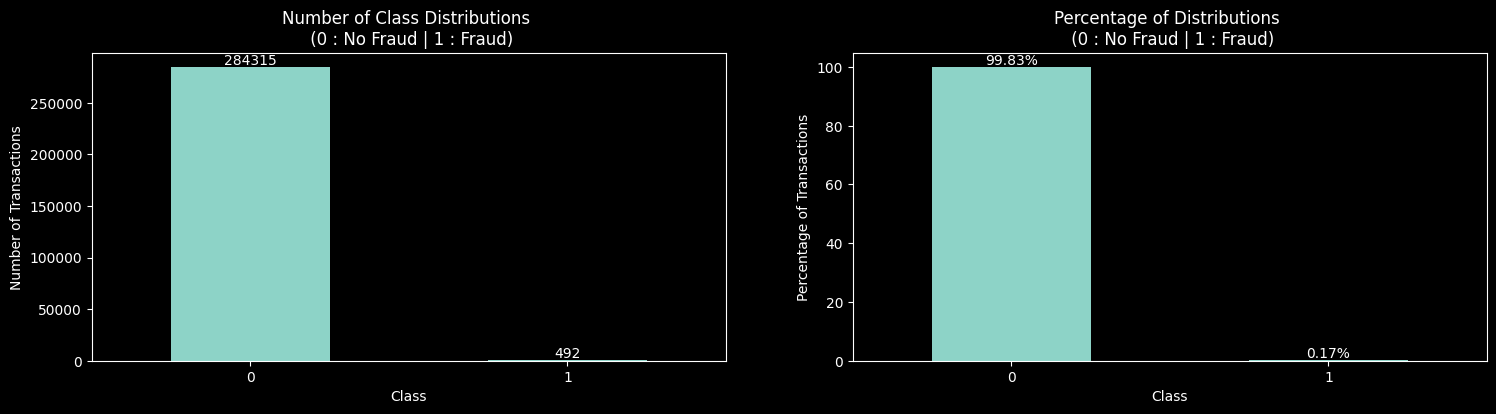

In [11]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 6), facecolor='m')
    fig, ax = plt.subplots(1, 2, figsize = (18, 4))
    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0 : No Fraud | 1 : Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type = 'edge', labels = i.datavalues.astype(int))
    (classes/df['Class'].count()*100).plot(kind='bar', rot = 0, ax = ax[1])
    ax[1].set_title('Percentage of Distributions \n (0 : No Fraud | 1 : Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type = 'edge', labels = [f'{val:.2f}%' for val in i.datavalues])
    plt.show()

Observation

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.<br>
The percentage of distribution for majority class is 99.83% and minority class is 0.17%


<br>
Creates a scatter plot of Time vs Class with color-coded points and a legend.<br>
Parameters:<br>
------------<br>
df : pandas DataFrame<br>
     The DataFrame containing the data to be plotted.<br>
Returns:<br>
--------<br>
None<br>
Notes:<br>
-------<br>
This code creates a scatter plot of the Time variable on the x-axis and the Class variable on the y-axis.<br>
The face color of the figure is set to magenta using the 'facecolor' parameter.<br>
The points in the plot are color-coded using the cmap parameter based on whether a transaction is fraudulent or not.<br>
A colorbar is added to show the correspondence between color and classes.<br>
A legend is also added to clarify the colors used for each class.<br>
The plot is displayed with a dark background and a magenta face color.<br>


In [12]:
cmap = colors.ListedColormap(['white', 'red'])

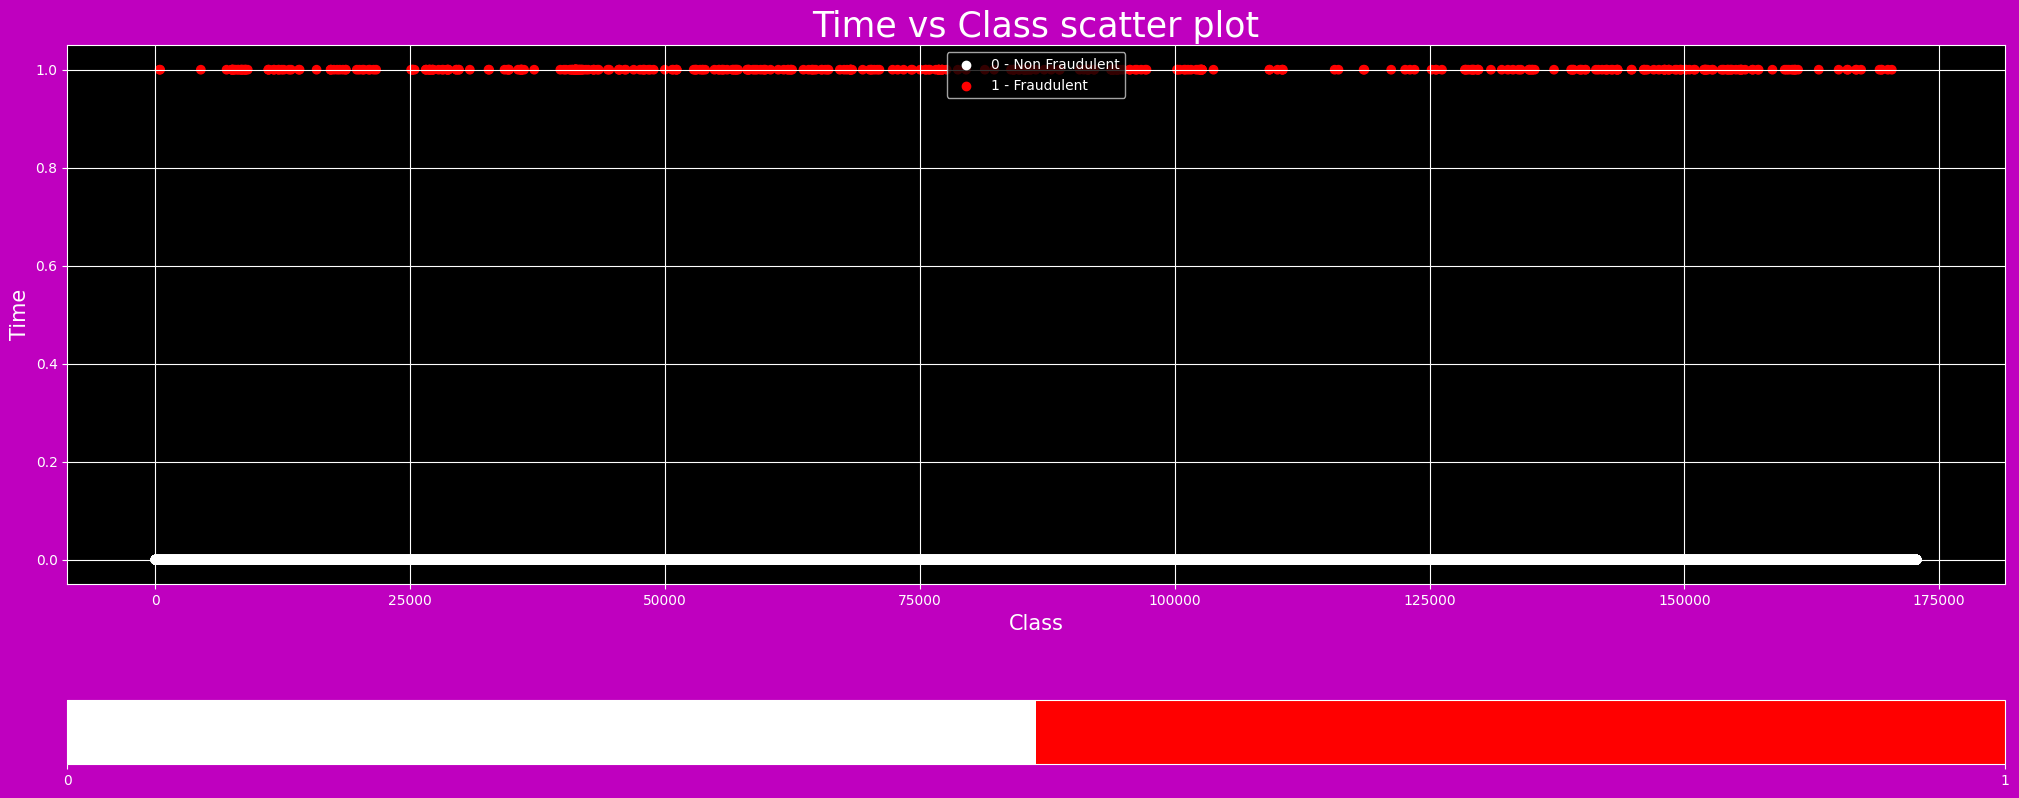

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(25, 10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Time"], y=df["Class"], c=df["Class"], cmap=cmap)

    # c = parameter to be colored

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad=0.15)
    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([], [], marker='o', color='white', label='0 - Non Fraudulent'), plt.scatter([], [], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')
    plt.show()

Observation

There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.


<br>
Creates a scatter plot of Amount vs Class with color-coded points and a legend.<br>
Parameters:<br>
-----------<br>
df : pandas DataFrame<br>
    The DataFrame containing the data to be plotted.<br>
Returns:<br>
--------<br>
None<br>
Notes:<br>
------<br>
This function uses the matplotlib library to create a scatter plot of Amount vs Class with color-coded points based on the Class label (0 - Non Fraudulent or 1 - Fraudulent).<br>
The colormap used for the points is created using colors.ListedColormap from the matplotlib library.<br>
The colorbar for the colormap is created using plt.colorbar with ticks at values 0 and 1 and an orientation of 'horizontal'.<br>
The aspect and pad parameters are set to 30 and 0.15, respectively, to adjust the position and size of the colorbar.<br>
The scatter plot title, x-axis label, and y-axis label are set using plt.title, plt.xlabel, and plt.ylabel, respectively.<br>
The font sizes for the title and axis labels can be adjusted using the fontsize parameter.<br>
A legend is created using plt.legend and the handles parameter to create scatter plots with empty points and the corresponding colors and labels for each Class value.<br>
Finally, plt.grid is used to display a grid on the scatter plot, and plot.show is called to display the plot.<br>


In [14]:
cmap = colors.ListedColormap(['white', 'red'])

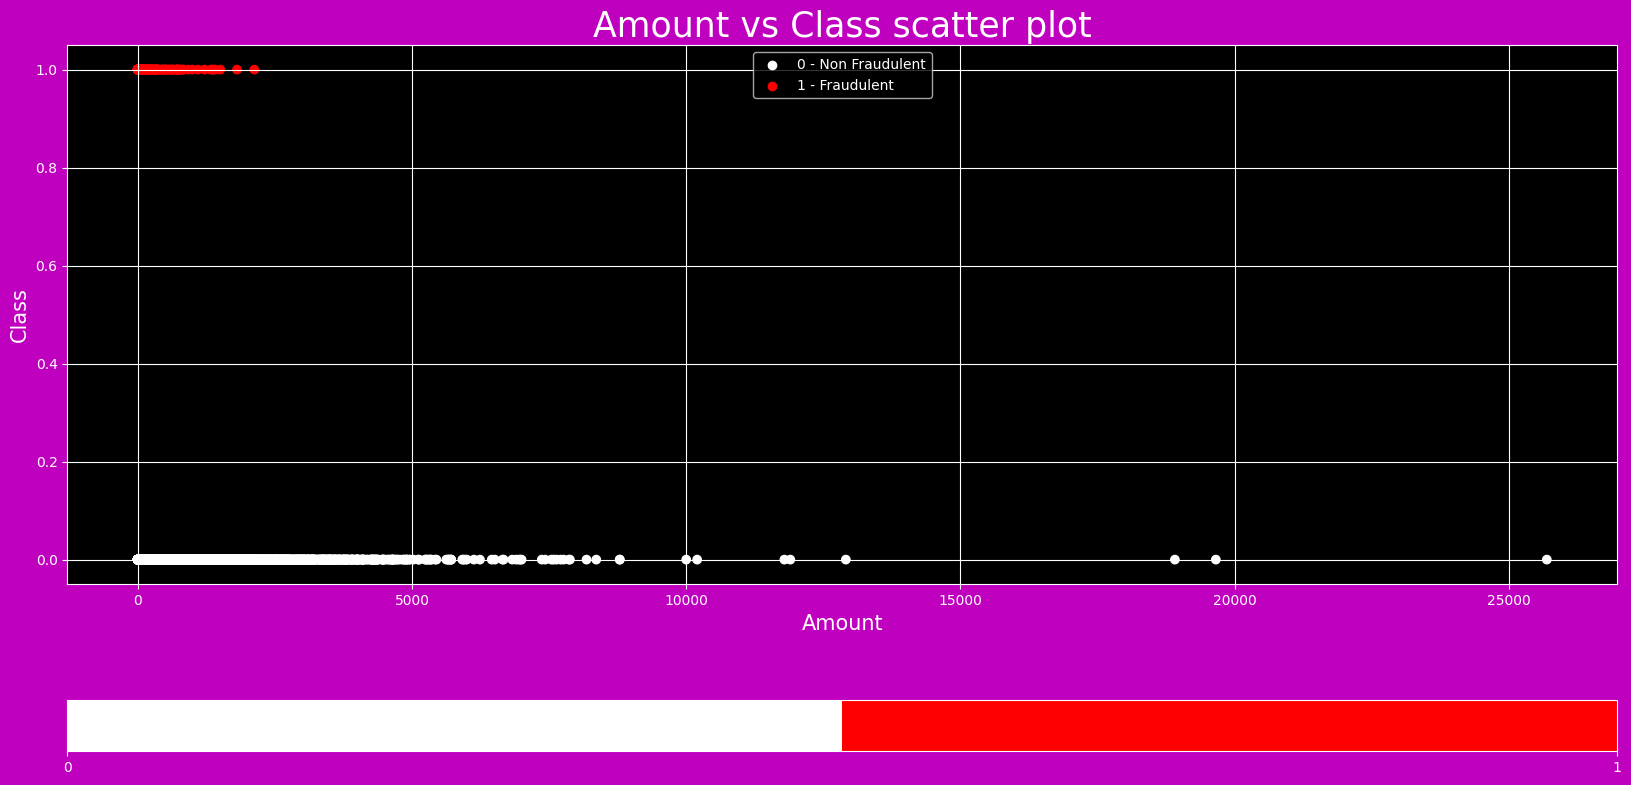

In [15]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=df["Amount"], y=df["Class"], c=df["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation = 'horizontal', aspect = 30, pad = 0.15)
    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize = 15)
    plt.xlabel("Amount", fontsize = 15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([], [], marker = 'o', color = 'white', label = '0 - Non Fraudulent'), plt.scatter([], [], marker = 'o', color = 'red', label = '1 - Fraudulent')]
    plt.legend(handles = legend_elements, loc = 'upper center')
    plt.show()

Observation

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

defining a function to create correlation matrix plot

In [16]:
def corrplot(data):
    """
    Create a correlation plot of the input DataFrame.
    Parameters:
    ------------
    data : pandas DataFrame
        The DataFrame containing the data to be plotted.
    Returns:
    ---------
    None
    Notes:
    ------
    This function uses the matplotlib library to create a correlation plot of the input DataFrame.
    The correlation matrix is calculated using data.corr() and then plotted using imshow() function.
    The colormap 'plasma' is used to represent the correlation values.
    The size of the figure is set using plt.subplots with a figsize parameter of (10, 10).
    The x and y tick labels are set to the columns of the DataFrame using ax.set_xticklabels and a x.set_yticklabels.
    The x tick labels are rotated by 90 degrees for better readability using the rotation parameter.
    The colorbar is created using plt.colorbar with the aspect, shrink, and pad parameters set to 20, 0.80, and 0.05, respectively, to adjust the position and size of the colorbar. The label for the colorbar can be adjusted using the label parameter.
    Finally, the plot is displayed using plt.show.
    """
    with plt.style.context('dark_background'):
        corr = data.corr()
        fig, ax = plt.subplots(figsize = (10, 10))
        im = ax.imshow(corr, cmap = 'plasma')
        ax.set_xticks(np.arange(len(data.columns)))
        ax.set_yticks(np.arange(len(data.columns)))
        ax.set_xticklabels(data.columns, rotation = 90)
        ax.set_yticklabels(data.columns)
        plt.setp(ax.get_xticklabels(), ha = "right", rotation_mode = "anchor")
        plt.colorbar(im, aspect = 20, shrink = 0.80, pad = 0.05, label = 'Correlation Strength')
        plt.show()

plotting the correlation matrix using the defined function

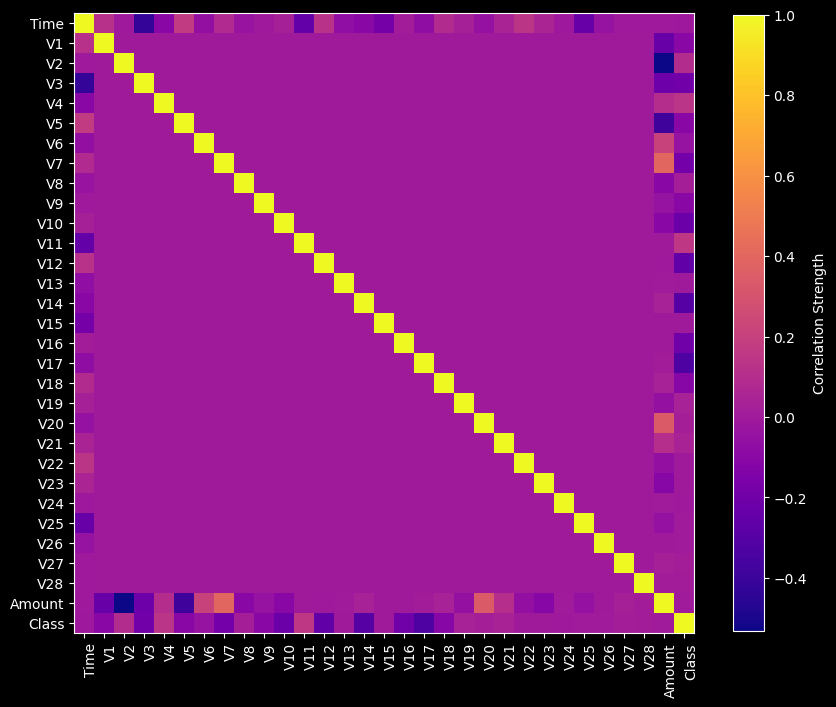

In [17]:
corrplot(df)

There are no features which there is high correlatation , corr > .75

Plotting the distributions of all the features

This code plots the distribution of all variables in a dataset using a displot (density plot). The variables are stored in a list called "var," with the "Class" column removed.<br>
The code then separates the dataset into two groups based on the "Class" column (0 and 1) and plots the distribution of each variable for both groups using seaborn's kdeplot function.<br>
The resulting plot is a 10 x 3 grid of density plots, with each row corresponding to a variable and each column corresponding to the two groups.<br>
This type of visualization is useful for understanding the distribution of each variable in the dataset and how it differs between the two groups. It can also help identify any potential outliers or skewness in the data.


<br>
Visualize the distribution of variables in a DataFrame using density plots.<br>
Parameters:<br>
-----------<br>
df : pandas DataFrame<br>
    The DataFrame containing the variables to be visualized.<br>
Returns:<br>
--------<br>
None<br>
Notes:<br>
------<br>
This function creates a grid of density plots using seaborn's kdeplot() function.<br>
The grid is structured as 10 rows and 3 columns to accomodate all the variables in the input DataFrame.<br>
The Class column is excluded from the list variable to be plotted.<br>
The data is first separated by Class into two subsets, t0 and t1, using the loc() method on the DataFrame.<br>
The subsets are then plotted using kdeplot() with a bandwidth of 0.5 to estimate the density function.<br>
The two subplots are distinguished by different colors.<br>
The x-axis labels for each plot are set to the name of the corresponding variable using plt.xlabel().<br>
The x-axis ticks are adjusted using plt.xticks() to better fit the labels.<br>
The tick labels and font size can be adjusted using plt.tick_params().<br>
The grid is displayed using plt.show().<br>


Plotting all the variable in displot to visualise the distribution

In [18]:
var = list(df.columns.values)
# Dropping Class columns from the list
var.remove("Class")

In [19]:
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

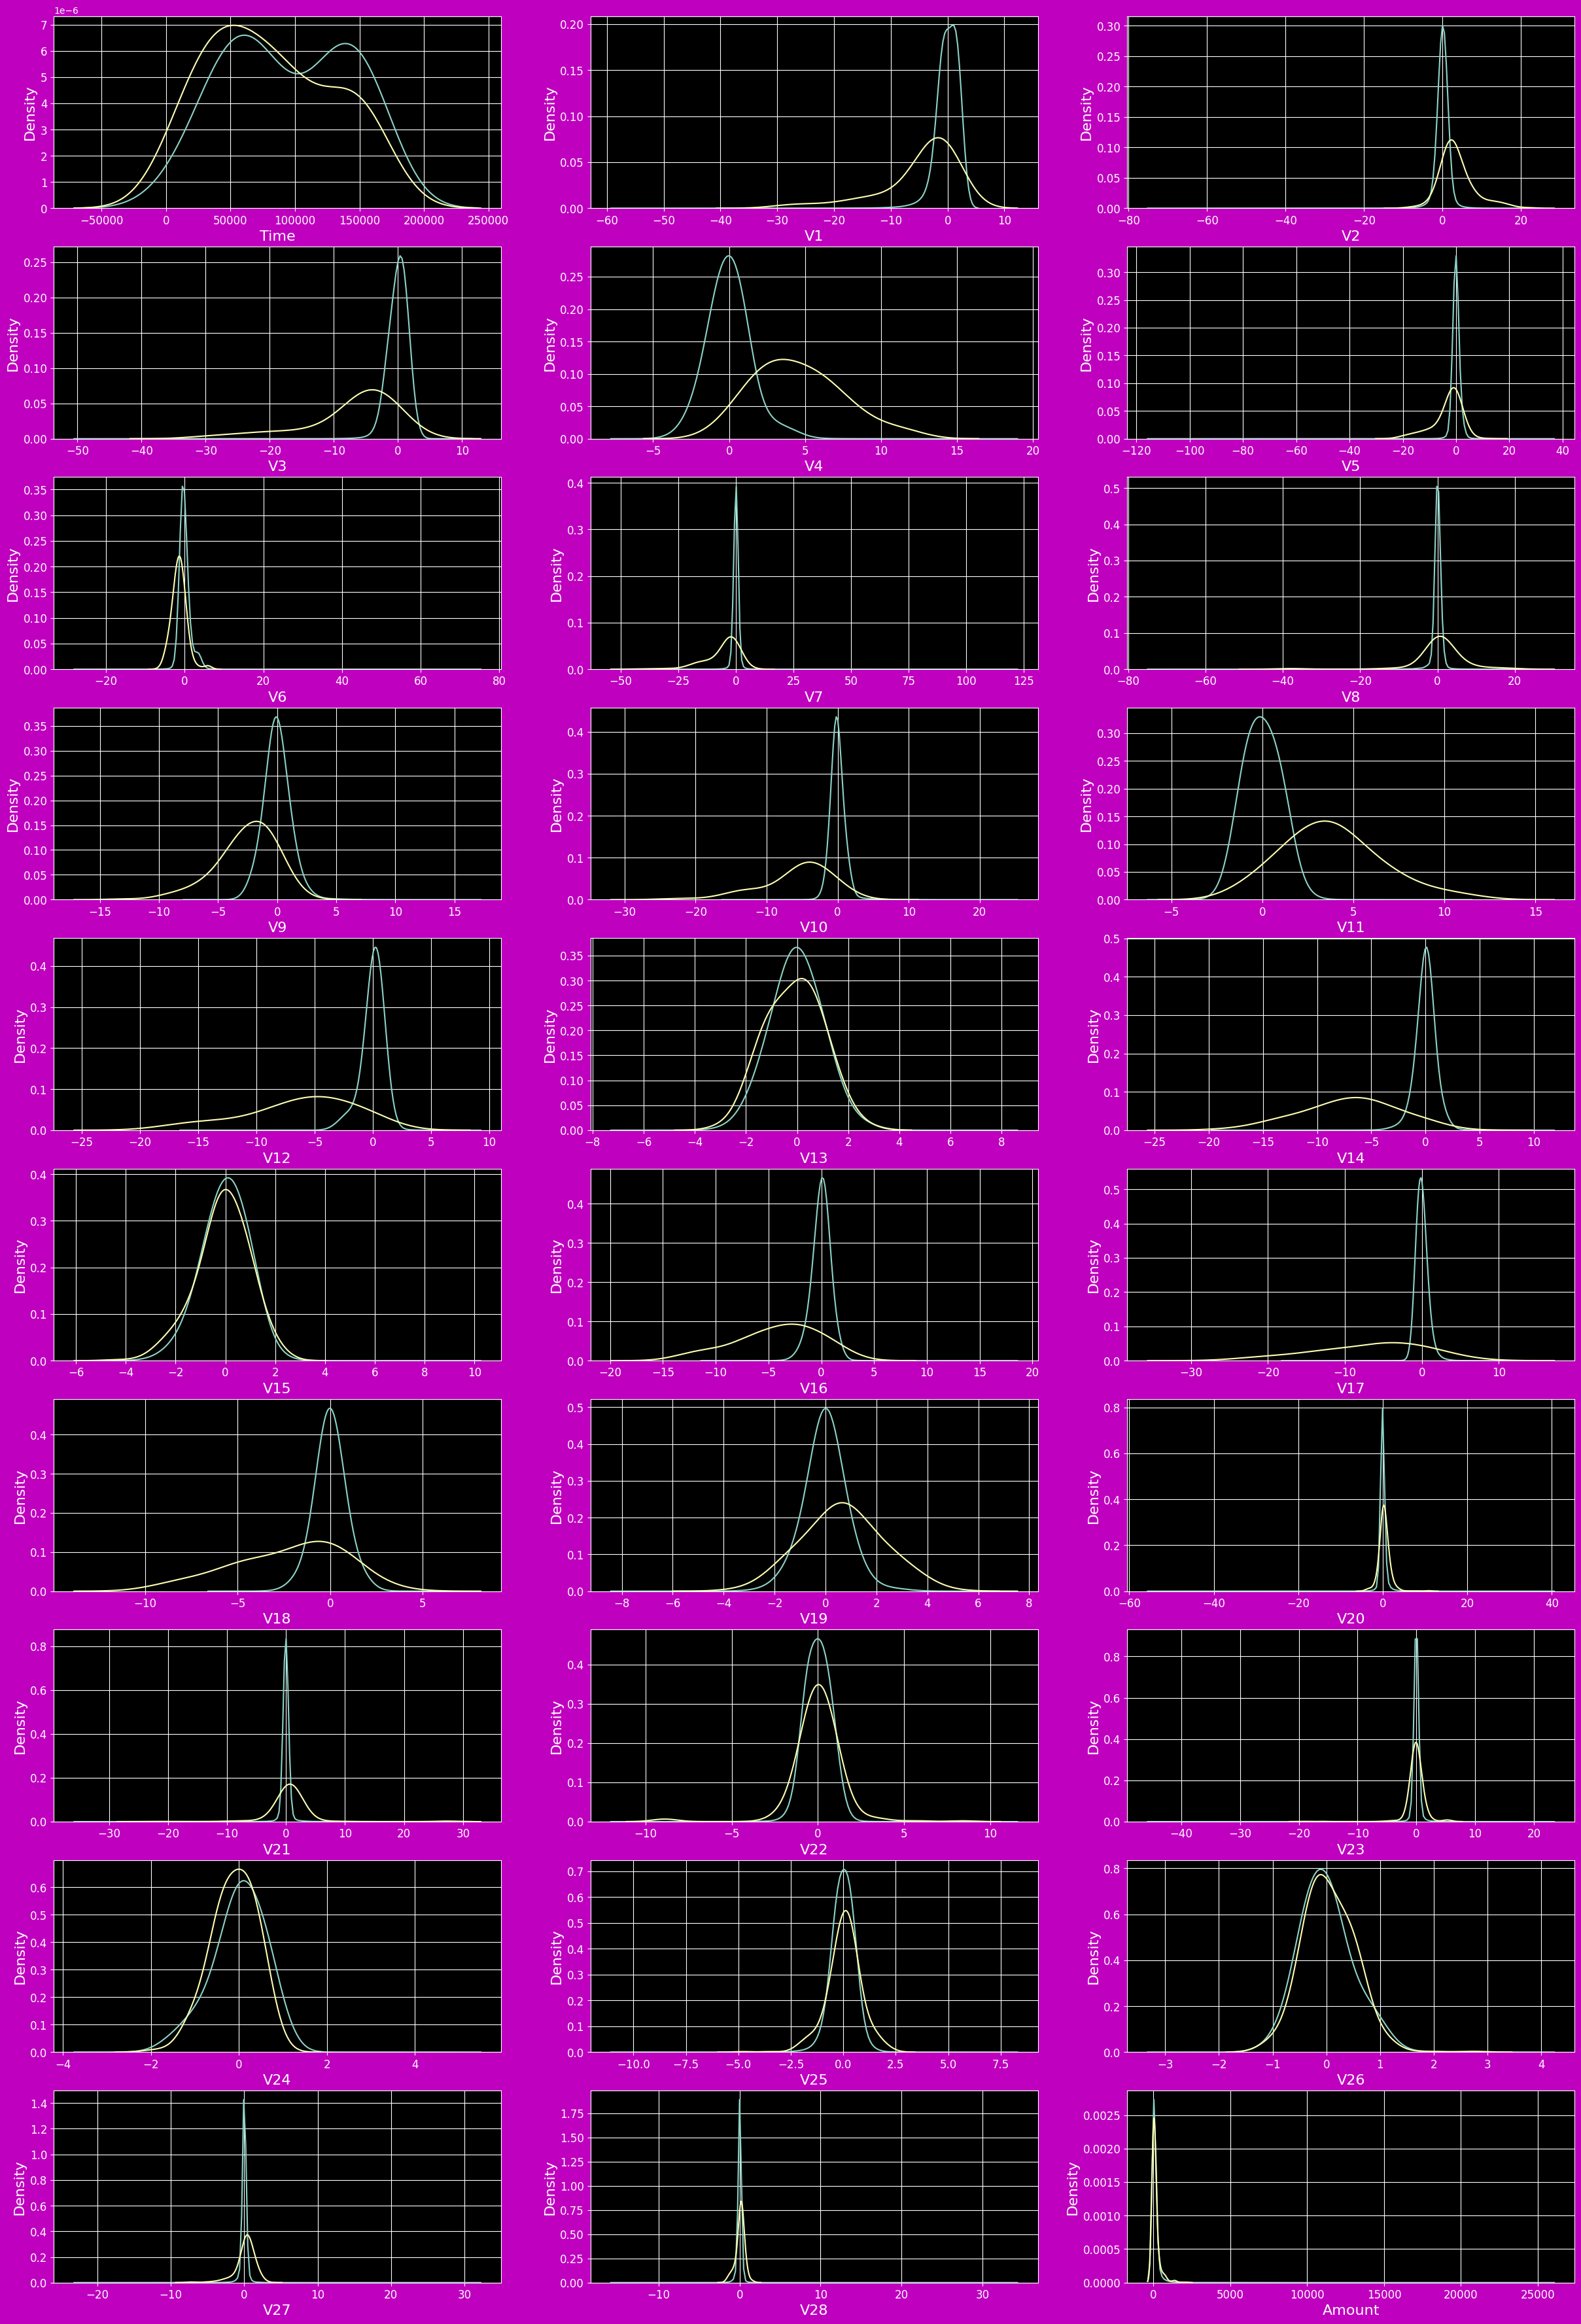

In [20]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(10, 3, figsize = (30, 45), facecolor = 'm')
    for feature in var:
        i += 1
        plt.subplot(10, 3, i)
        sns.kdeplot(t0[feature], bw=0.5, label = "0")
        sns.kdeplot(t1[feature], bw=0.5, label = "1")
        plt.xlabel(feature, fontsize = 16)
        plt.ylabel("Density", fontsize = 16)
        locs, labels = plt.xticks()
        plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
        plt.grid()
    
    plt.savefig('variables.png')
    plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

Understanding from Core Banking Business

Dropping Time column as this feature is not going to help in the model building.

Drop unnecessary columns

In [21]:
df = df.drop("Time", axis = 1) 
print("\n", df.head())


          V1        V2       V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781 2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.20

Splitting the data into train & test data

y = #class variable

In [22]:
y = df["Class"]
X = df.drop("Class", axis = 1)
print("\n", y.shape, X.shape)


 (284807,) (284807, 29)


from sklearn import model selection<br>
X_train, X_test, y_train, y_test =


<br>
This code is using the train_test_split() function from scikit-learn to split the dataset X and its corresponding labels y into training and testing sets.<br>
The split is done with a 80/20 ratio for the test set and the random state is set to 42 for reproducibility.<br>
The stratify parameter is set to y, which means that the split is done in a way that preserves the proportion of samples for each class in y in the training and testing sets.<br>
The resulting output of this code is a tuple containing the shape of the training set (X_train and y_train) and the shape of the testing set (X_test and y_test).<br>
The train_test_split() function is commonly used in machine learning to split a dataset into training and testing sets to evaluate the performance of a model on unseen data.<br>
The training set is used to fit the model while the testing set is used to evaluate the model's performance on new, unseen data.<br>


Splitting the data into 80:20 train test size

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print("\n", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


 (227845, 29) (56962, 29) (227845,) (56962,)


Checking the split of the class label

In [24]:
print("\n", "Fraudulent Count for Full data :", np.sum(y))
print("Fraudulent Count for Train data : ", np.sum(y_train))
print("Fraudulent Count for Test data : ", np.sum(y_test))


 Fraudulent Count for Full data : 492
Fraudulent Count for Train data :  394
Fraudulent Count for Test data :  98


Preserve X_test & y_test to evaluate on the test data once the model is built

Save the testing set for evaluation

In [25]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("\n", "Saved X_test & y_test")


 Saved X_test & y_test


# Feature Scaling using RobustScalar Scalar

We need to scale Amount column.

As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field

In [26]:
scalar = RobustScaler()

Scaling the train data

In [27]:
X_train[["Amount"]] = scalar.fit_transform(X_train[["Amount"]])

Transforming the test data

In [28]:
X_test[["Amount"]] = scalar.transform(X_test[["Amount"]])

In [29]:
print("\n", X_train.head())
print("\n", X_test.head())


               V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
198723  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
82325  -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

              V8        V9       V10       V11       V12       V13       V14  \
265518  1.139880  1.406819 -0.157403 -0.113729  0.510277  0.061258 -0.066555   
180305  0.674782  0.045826  0.284864 -0.254903  0.325560 -0.405327  0.721068   
42664  -5.037523  0.000772 -2.009561 -0.386845  1.820161  0.747777  0.122746   
198723  0.010010 -1.118447  1.756121  0.093136 -0.722450 -0.468757 -0.195288   
82325  -0.113817 -0.044782 -0.558955 -0.251076 -0.054708 -0.782698  0.134659   

             V15       V16       V17

Checking Skewness

Plotting the distribution of a variable

# Plotting the distribution of a variable to handle skewness.

Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal. The normal distribution has a skewness of 0. Skewness tell us about distribution of our data.

Effects of skewed data: Degrades the model's ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values.

If there is skewness present in the distribution use:

Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian.


<br>
The code defines a function to plot histograms of the variables in a given dataset to see the skewness.<br>
Parameters:<br>
-----------<br>
X_train: a pandas DataFrame with the variables to be plotted as columns.<br>
    <br>
Returns:<br>
--------<br>
A grid of histograms, with each histogram representing the distribution of a variable in the input DataFrame.<br>
Notes:<br>
------<br>
Histograms are useful for understanding the distribution of a variable and for identifying any potential skewness. <br>
If a histogram is symmetric, it indicates that the data is normally distributed, whereas a histogram that is skewed to the left or right suggests that the data is skewed in that direction.<br>
By plotting the histogram of each variable in the training set, you can get an idea of the distribution of the data and whether any transformations are needed before modeling.<br>
The histograms are plotted using the Seaborn histplot function. <br>
The grid layout is defined using the subplots function from matplotlib, and the size of the grid is set to 10 rows and 3 columns. <br>
The histograms are plotted using a loop over the variables in the input DataFrame, with each histogram plotted in a separate subplot. <br>
The title of each subplot corresponds to the name of the variable. <br>
The tight_layout function from matplotlib is used to optimize the layout of the subplots. <br>
The resulting plot is displayed using the show function from matplotlib.<br>


In [30]:
var = X_train.columns

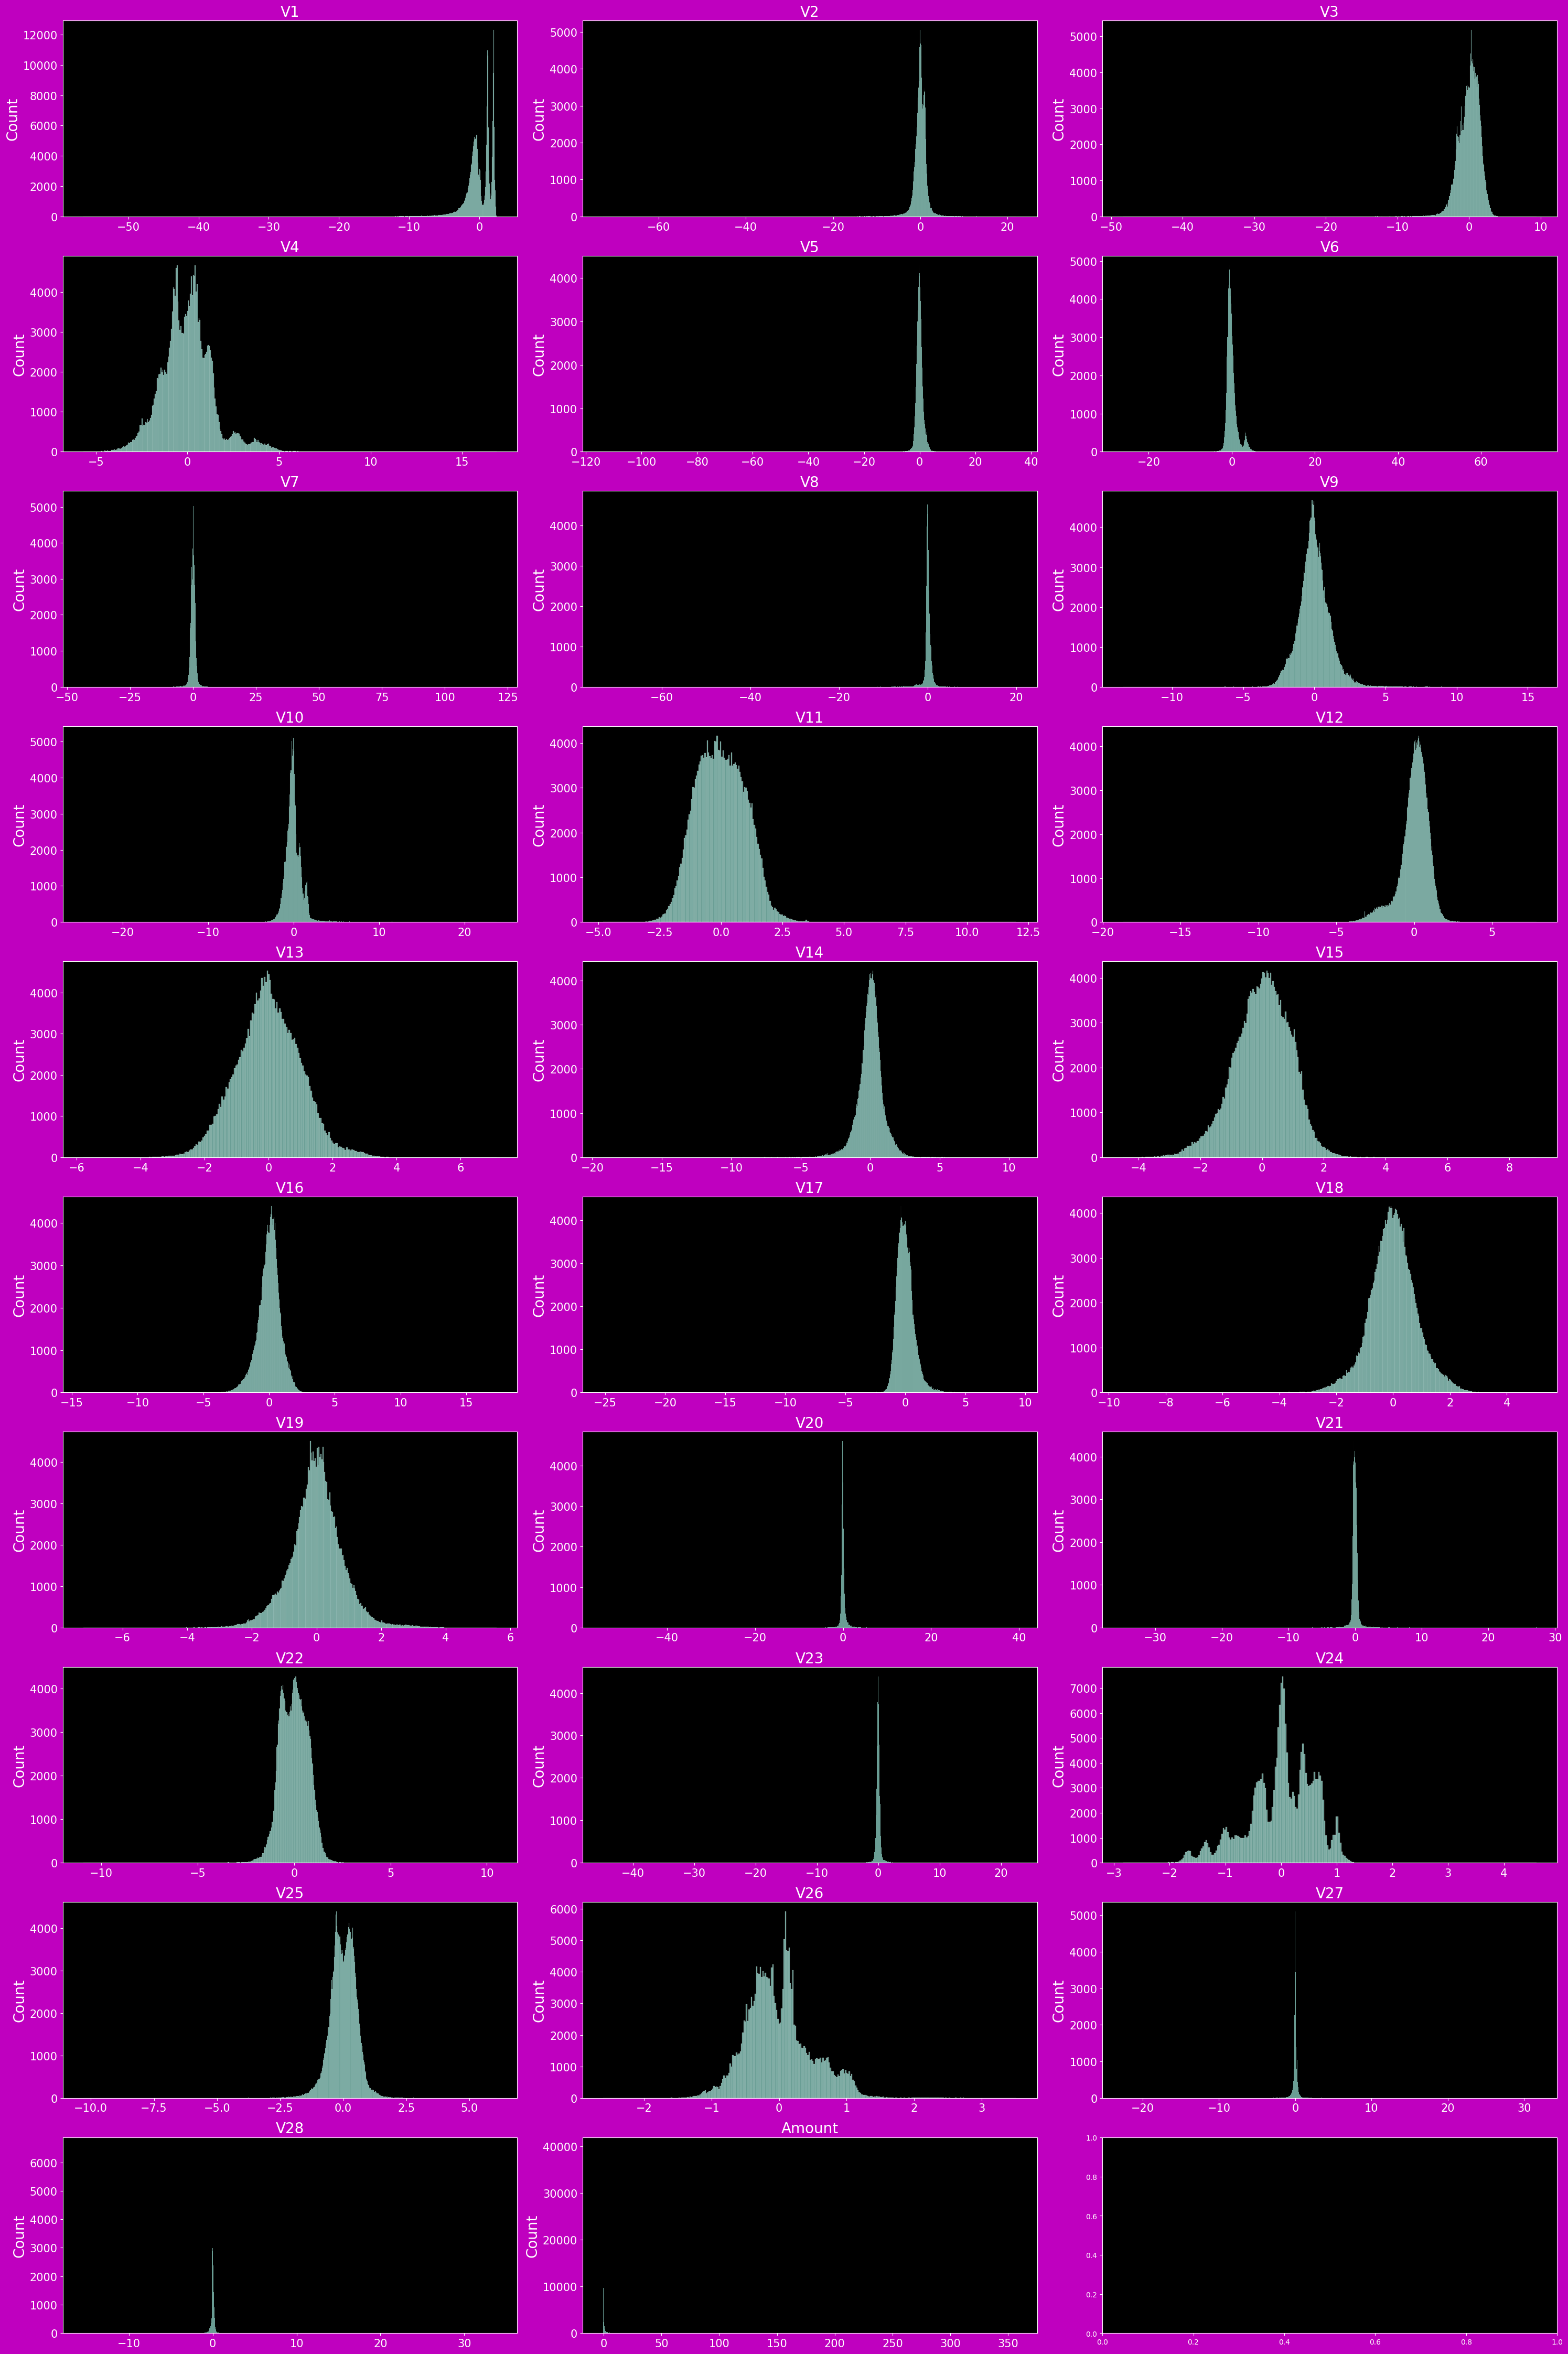

In [31]:
with plt.style.context('dark_background'):
    fig, axes = plt.subplots(10, 3, figsize = (30, 45), facecolor = 'm')
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax = ax)
            ax.set_title(var[i], fontsize = 20)
            ax.set_ylabel("Count", fontsize = 20) # set y label of the subplot
            ax.tick_params(axis = 'both', labelsize = 15)
            ax.set_xlabel('') # set empty string as x label of the subplot
    plt.tight_layout()
    plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

Lets check the skewness of the features


<br>
The code first creates a list of variable names called var, and then calculates the skewness of each variable using the skew() method of a Pandas DataFrame. <br>
The skewness values are stored in a list called skew_list.<br>


In [32]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

In [33]:
tmp = pd.concat([pd.DataFrame(var, columns = ["Features"]), pd.DataFrame(skew_list, columns = ["Skewness"])], axis = 1)
tmp.set_index("Features", inplace = True)
print("\n", tmp)


           Skewness
Features          
V1       -3.306334
V2       -4.779484
V3       -2.247962
V4        0.687574
V5       -2.786851
V6        1.937381
V7        3.152665
V8       -8.639485
V9        0.541869
V10       1.132688
V11       0.354102
V12      -2.286654
V13       0.064819
V14      -1.969112
V15      -0.308419
V16      -1.077909
V17      -3.733377
V18      -0.254948
V19       0.106133
V20      -1.960492
V21       3.490183
V22      -0.219171
V23      -6.258558
V24      -0.549854
V25      -0.436292
V26       0.574980
V27      -0.890209
V28       9.978409
Amount   18.193943


There is skewness present in the distribution of the above features:<br>
Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian.

Filtering the features which has skewness less than -1 and greater than +1


<br>
This is a good way to identify which features may need to be transformed to improve model performance.<br>


In [34]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] < -1)].index
print("\n", skewed.tolist())


 ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']


Treating Skewness<br>
If there is skewness present in the distribution use:<br>
Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian.


<br>
In scikit-learn's PowerTransformer class, the copy parameter specifies whether to make a copy of the input data before applying the transformation or not.<br>
By default, copy is set to True, which means that the input data is copied to a new object before applying the transformation. <br>
The preprocessing.PowerTransformer() function is used to transform the data to have a more Gaussian-like distribution.<br>
Here, we are applying the transformation to the features that have a skewness greater than 1 or less than -1.<br>
Both methods (yeo-johnson and box-cox) are commonly used to transform data to make it more normally distributed, which can improve the performance of some machine learning algorithms.<br>
The yeo-johnson method is an extension of the box-cox method that allows for transformation of variables with negative values, while the box-cox method only works with variables that are strictly positive.<br>
Therefore, if you have variables with negative values, yeo-johnson would be the appropriate choice.<br>
This is a safety measure to ensure that the original input data is not modified in place.<br>
If copy is set to False, the transformation is applied directly to the input data and any changes made to the transformed data will also be reflected in the original data.<br>
In general, it is recommended to keep copy=True unless you have a specific reason to modify the original data in place.<br>
fit_transform is used for both fitting the transformer to the training data and transforming the data, while transform is used only for transforming new data based on a previously fitted transformer.<br>


- Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [35]:
pt = preprocessing.PowerTransformer(method = 'yeo-johnson', copy = True) # creates an instance of the PowerTransformer class.
pt.fit(X_train)

PowerTransformer()

In [36]:
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [37]:
y_train_pt = y_train
y_test_pt = y_test

In [38]:
print("\n", X_train_pt.shape)
print(y_train_pt.shape)


 (227845, 29)
(227845,)


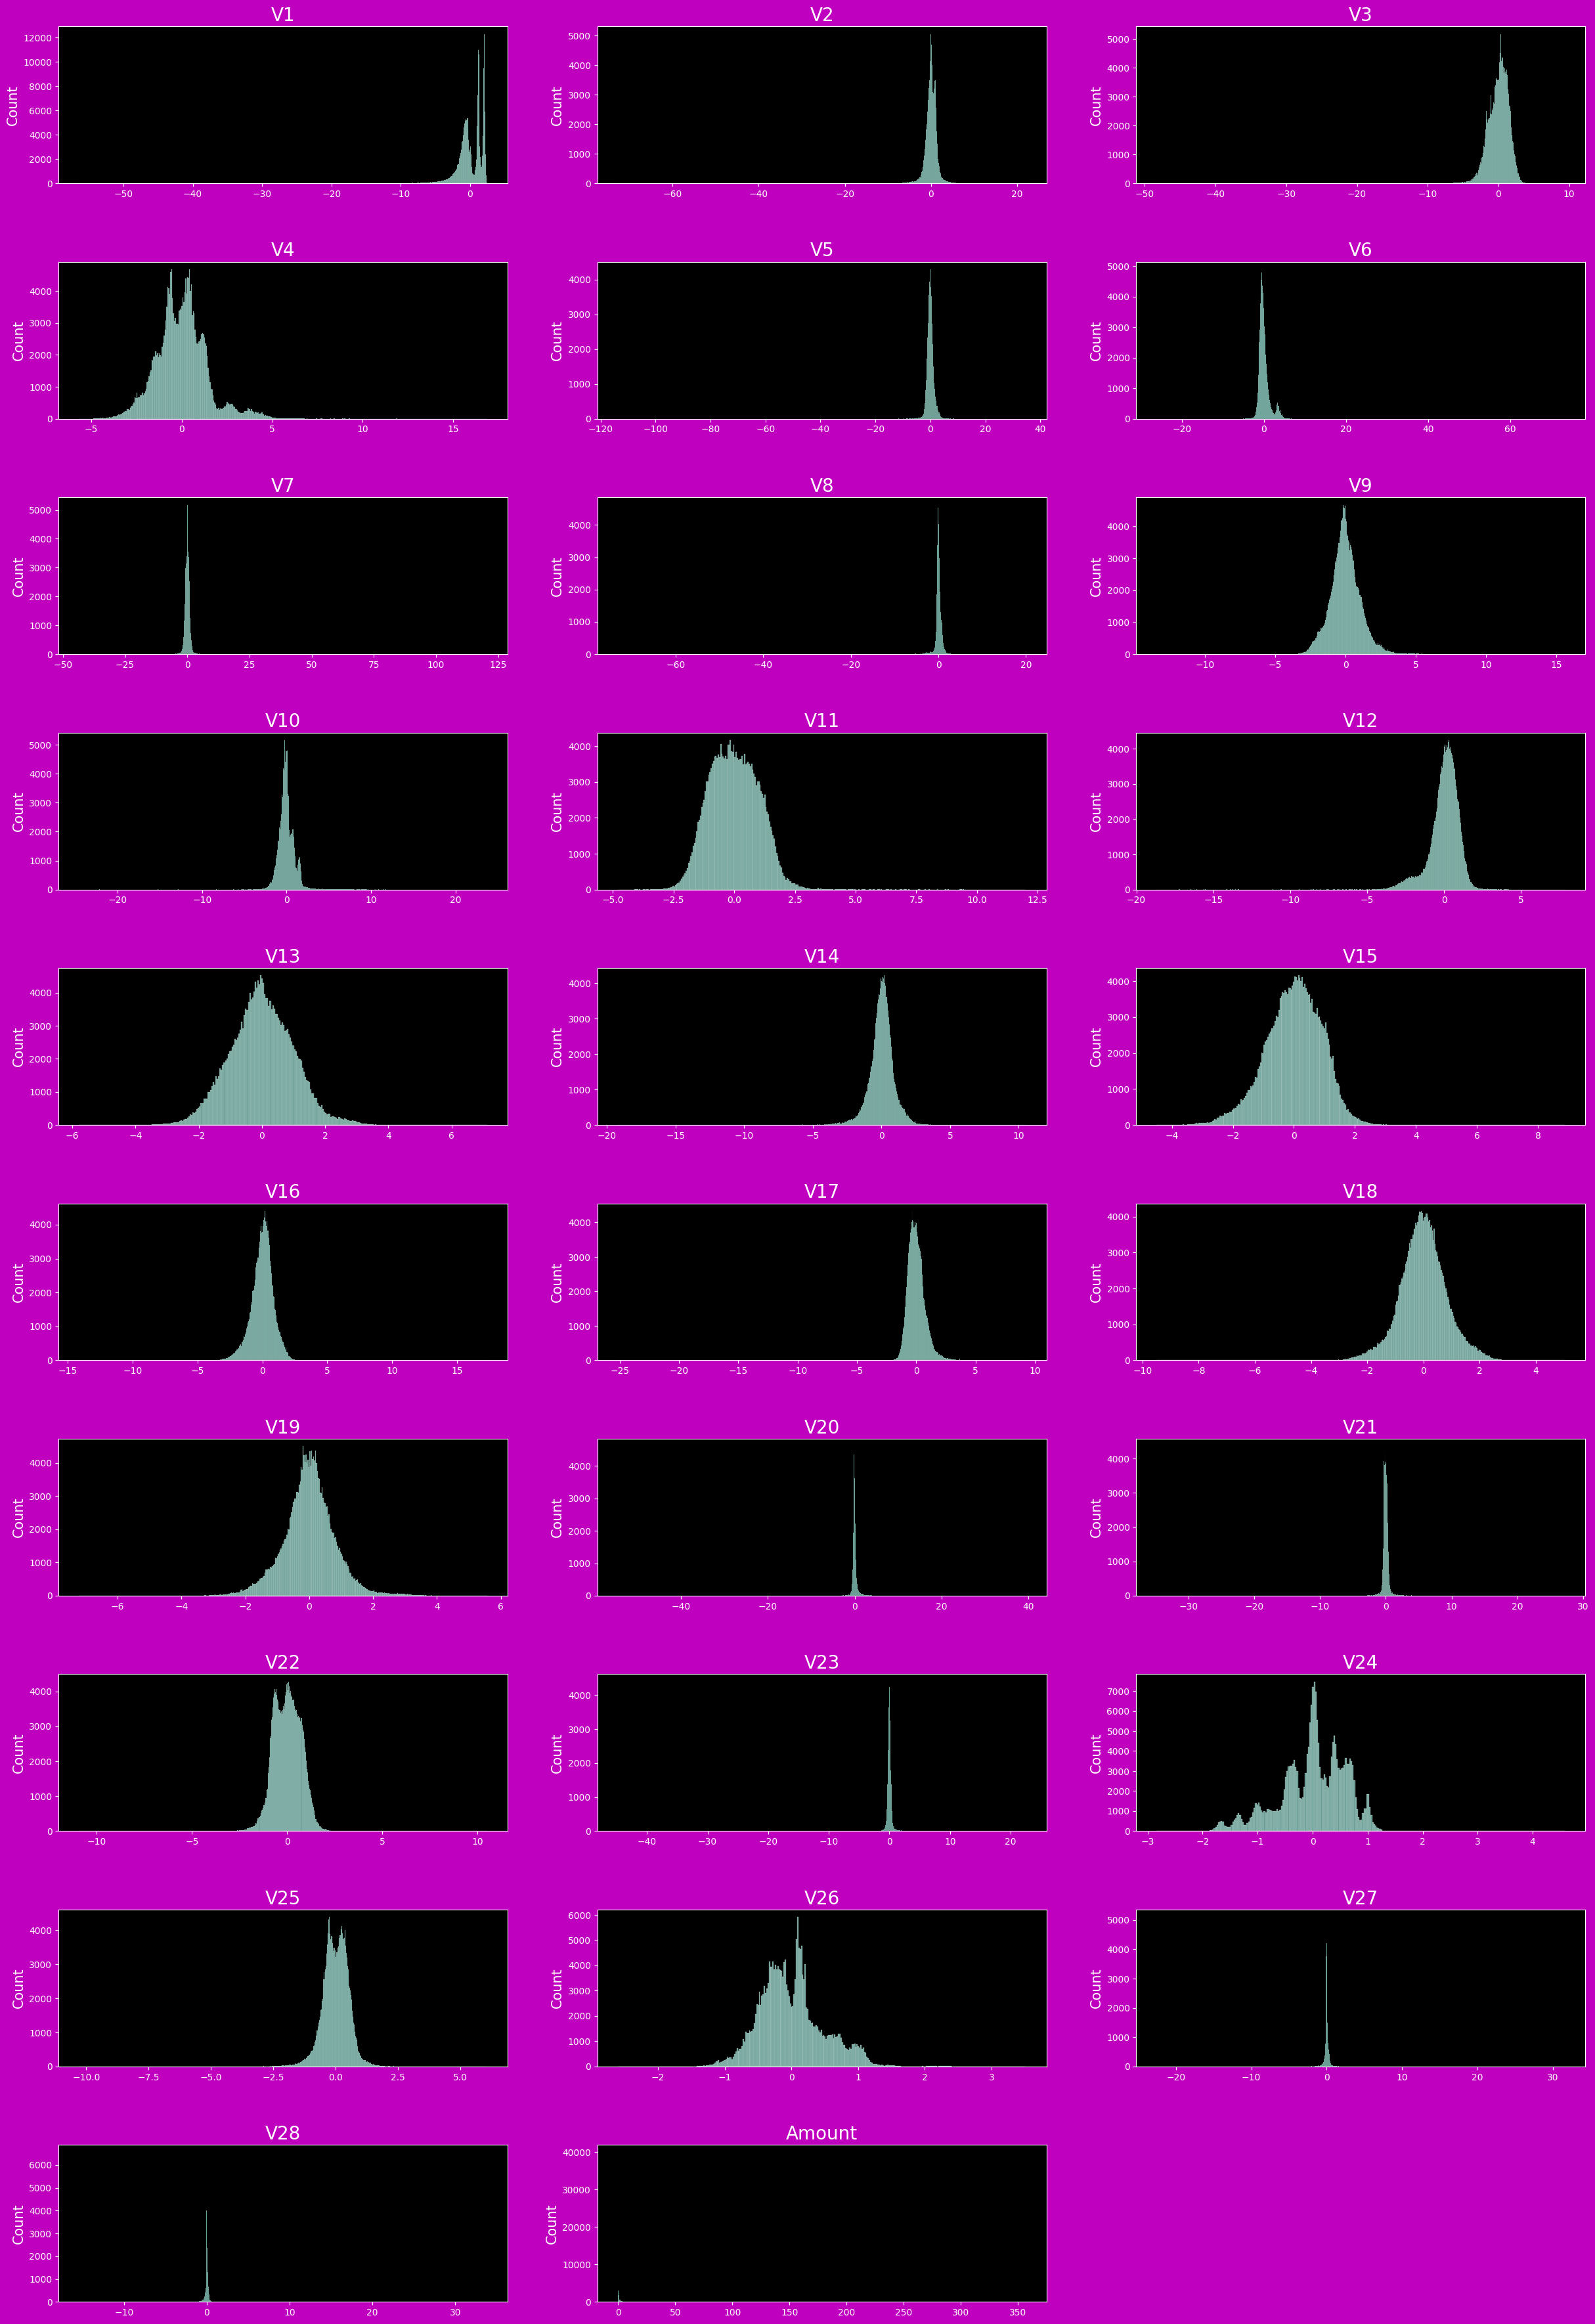

In [39]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize = (30, 45), facecolor = 'm') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize = 30)
    # set main title of the figure
    i = 0
    for col in var:
        i += 1
        ax = fig.add_subplot(10, 3, i) # create subplot
        sns.histplot(X_train[col], ax = ax) # plot histogram
        ax.set_title(col, fontsize = 20) # set title of the subplot
        ax.set_ylabel('Count', fontsize = 15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace = 0.5, wspace = 0.2) # add horizontal and vertical space between subplots
    plt.show()

# Model Building with imbalanced data

We are going to build models on below mentioned algorithms and we will compare for the best model.<br>
We are not building models on SVM, and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN.<br>
Skipped models' process is computationally very expensive when we have very large data set.<br>
We do not have these resource available so we are skipping these models.

Working with below models:

1. Logistic Regression<br>
2. KNN<br>
3. SVM<br>
4. Decision Tree<br>
5. Random Forest<br>
6. XGBoost

When the data is imbalanced or less, it is better to use K-Fold Cross Validation for evaluating the performance when the data set is randomly split into â€˜kâ€™ groups.<br>
Stratified K-Fold Cross Validation is an extension of K-Fold cross-validation, in which you rearrange the data to ensure that each fold is a good representative of all the strata of the data.

Metric selection on imbalance data

We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose.<br>
As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

Class imbalance

In [40]:
print("\n", y_train.value_counts()/y_train.shape)


 0   0.998271
1   0.001729
Name: Class, dtype: float64


Logistic Regression<br>
from sklearn import linear_model #import the package

num_C = ______  #--> list of values<br>
cv_num =   #--> list of values

Perfom cross validation on the X_train & y_train to create:

X_train_cv<br>
X_test_cv<br>
y_train_cv<br>
y_test_cv

Tasks

perform cross validation<br>
perform hyperparameter tuning<br>
print the evaluation result by choosing a evaluation metric<br>
print the optimum value of hyperparameters

Create Stratified Cross Validation Scheme & Do gridSearchCV after narrowing the range of best model

When the data is imbalanced or less, it is better to use K-Fold Cross Validation for evaluating the performance when the data set is randomly split into â€˜kâ€™ groups.<br>
Stratified K-Fold Cross Validation is an extension of K-Fold cross-validation, in which you rearrange the data to ensure that each fold is a good representative of all the strata of the data.<br>
When you have a small data set, the computation time will be manageable to test out different hyperparameter combinations. In this scenario, it is advised to use a grid search.<br>
However, with large data sets, it is advised to use a randomised search because the sampling will be random and not uniform.

perfom cross validation on the X_train & y_train 

In [41]:
from sklearn.model_selection import StratifiedKFold

Initialize StratifiedKFold cross-validator<br>
perform cross validation

In [42]:
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

In general, taking the maximum ROC-AUC score may be appropriate if your goal is to select the best model. However, taking the mean ROC-AUC score is generally a more robust and reliable way to compare models, especially if you are using cross-validation to estimate performance.

The reason why taking the maximum ROC-AUC score may not be as reliable is that it can be sensitive to small fluctuations in the data or the model, which can lead to overfitting. For example, if you have a small dataset, taking the maximum ROC-AUC score may not be as reliable because the score can vary significantly depending on the particular set of examples that are included in each fold. Similarly, if you have a highly variable model (e.g., a model with high variance), taking the maximum ROC-AUC score may not be as reliable because it may be overly optimistic about the true performance of the model.

On the other hand, taking the mean ROC-AUC score can be more robust because it smooths out the variability in the data and the model. By taking the mean of the scores across multiple folds, you are more likely to get a reliable estimate of the true performance of the model. Additionally, taking the mean ROC-AUC score can be useful for model selection, as it allows you to compare models in a more systematic and reliable way.

## 1. Logistic Regression

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization.

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2


Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 4.827872276306152 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.6338860988616943 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.5253033638000488 seconds
ROC-AUC Score for val data = 0.9797969874466093
Mean precision val score: 0.885478588591554
Mean recall val score: 0.6295975017349064
Mean f1 val score: 0.7341406860856002
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 1.3746647834777832 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time el

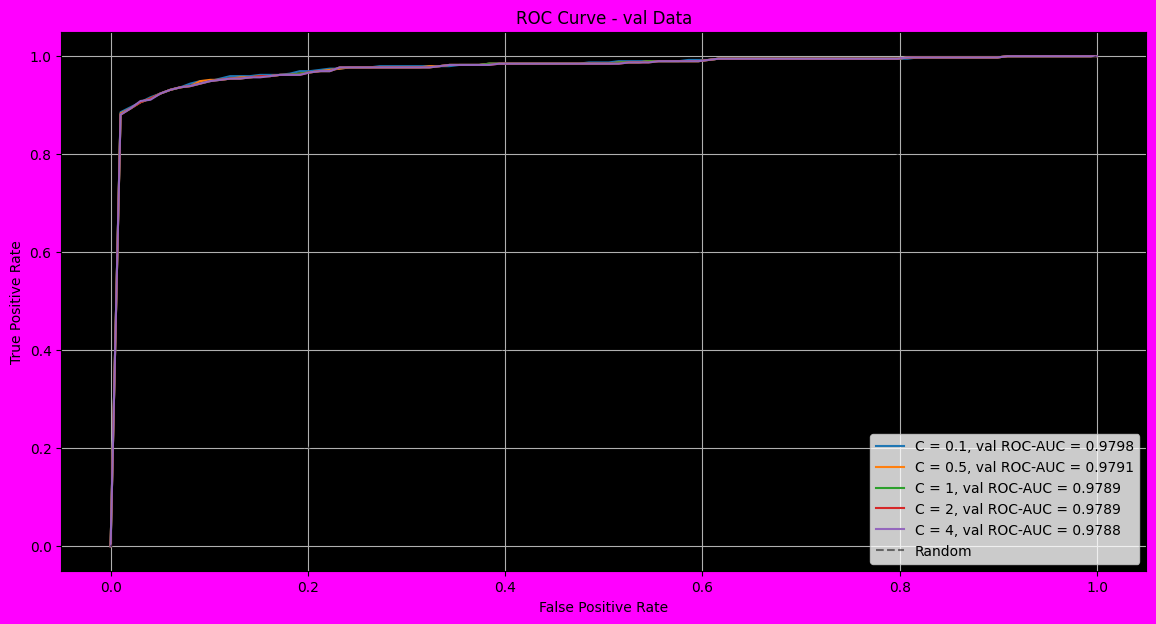

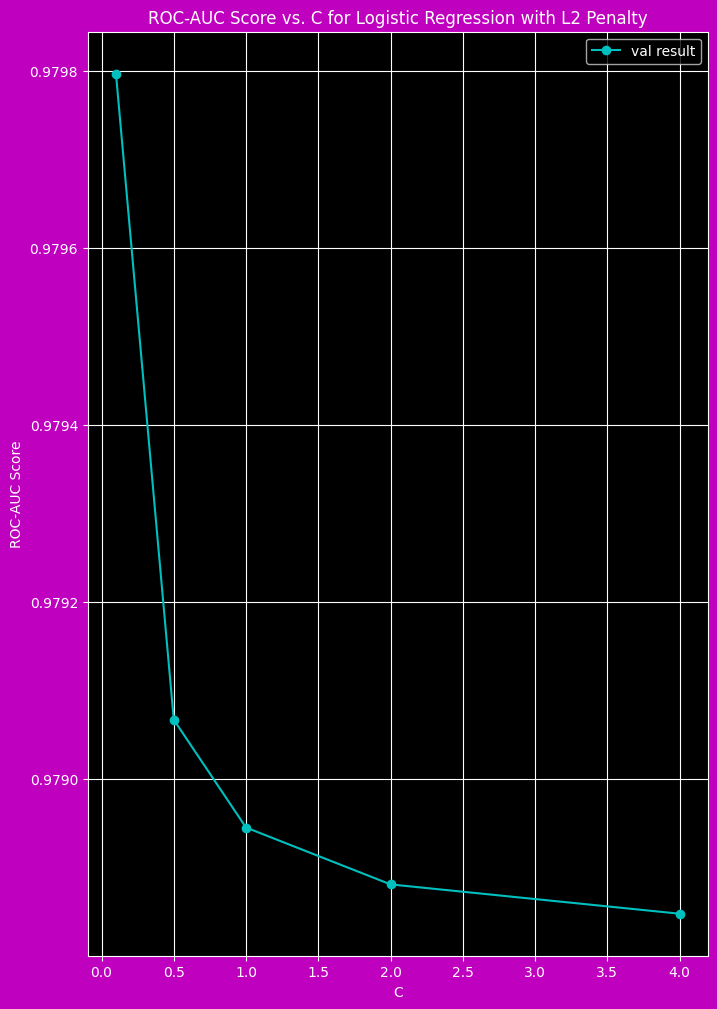





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9797969874466093, 0.9790668817700007, 0.9789450373956186, 0.9788807735548114, 0.9788476359347289]
Best C: 0.1
Best Mean ROC-AUC score for val data: 0.9797969874466093
Mean precision val score for best C 0.885478588591554
Mean recall val score for best C 0.6295975017349064
Mean f1 val score for best C 0.7341406860856002




In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation    
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)


        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))


        # precision_val.append(precision_score(y_val_cv, y_val_pred))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("===============================Logistic Regression Has Run Successfully:====================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for Logistic Regression with L2 Penalty')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])

print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC-AUC Score

In [44]:
from sklearn.model_selection import GridSearchCV

Logistic Regression parameters for Stratified K-fold cross validation


<br>
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. <br>
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. <br>
folds is an object that defines how many folds should be used in cross-validation.<br>


In [45]:
params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}

Define the logistic regression classifier

In [46]:
logreg_classifier = linear_model.LogisticRegression()

In [47]:
start_time = time.time()

Create a GridSearchCV object with stratified Cross validation

In [48]:
model_GridSearch = GridSearchCV(logreg_classifier,
param_grid = params,
scoring = 'roc_auc',
cv = skf, n_jobs = -1, # using 100% of CPU
verbose = 1,
pre_dispatch = 6, # prevents explosion of consumption of memory'
return_train_score = True)

 Fit the GridSearchCV object and perform hyperparameter tuning

In [49]:
model_GridSearch.fit(X_train_pt, y_train_pt)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']},
             pre_dispatch=6, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [50]:
end_time = time.time()
print("\n Time taken : {:.2f} seconds".format(end_time - start_time))


 Time taken : 356.47 seconds


print the evaluation result by choosing a evaluation matric

In [51]:
print('\n Best ROC AUC score: ', model_GridSearch.best_score_)


 Best ROC AUC score:  0.9812052138770543


print the optimum value of hyperparameters

In [52]:
print('\n Best hyperparameters: ', model_GridSearch.best_params_)


 Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [53]:
cv_results = model_GridSearch.cv_results_

Print the mean test scores for each hyperparameter combination

In [54]:
print("\n Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)


 Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9812052138770543
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9797969874466093
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.9790668817700007


Print the rank of each hyperparameter combination based on mean test score

In [55]:
print("\n Rank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank + 1, params)


 Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}


Print the standard deviation of test scores for each hyperparameter combination

In [56]:
print("\n Standard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)


 Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.007670919641509045
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.009179067053040193
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.009651062780020628


We're seeing a nan value for the score when using the GridSearchCV function in scikit-learn, it typically indicates that the model did not converge or encountered some numerical instability during the training process.

This can happen for a variety of reasons, such as

an insufficient number of iterations,<br>
a learning rate that's too high or too low,<br>
or a dataset that has features with a wide range of values.

## 2. KNN Classifier

A. Finding a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]


Time elapsed: 109.09425258636475 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 84.35184907913208 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 83.42285561561584 seconds
Mean ROC-AUC for train data: 0.9999479085933528
Mean ROC-AUC for val data: 0.9110686212594891
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 93.94784426689148 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 101.91786789894104 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 101.645742893219 seconds
Mean ROC-AUC for

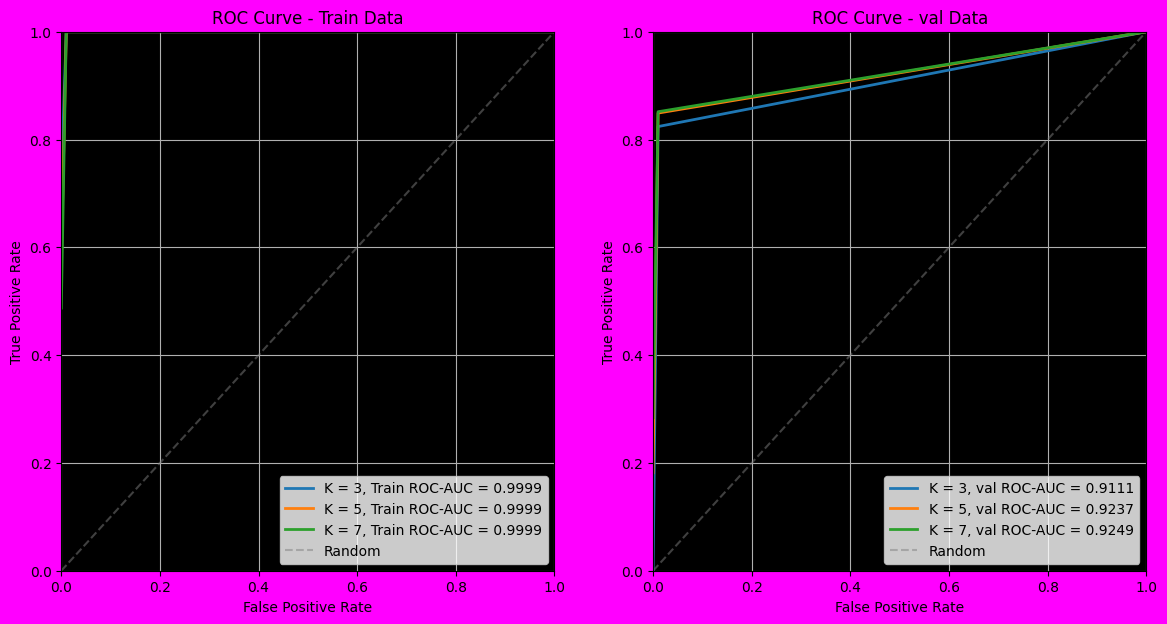

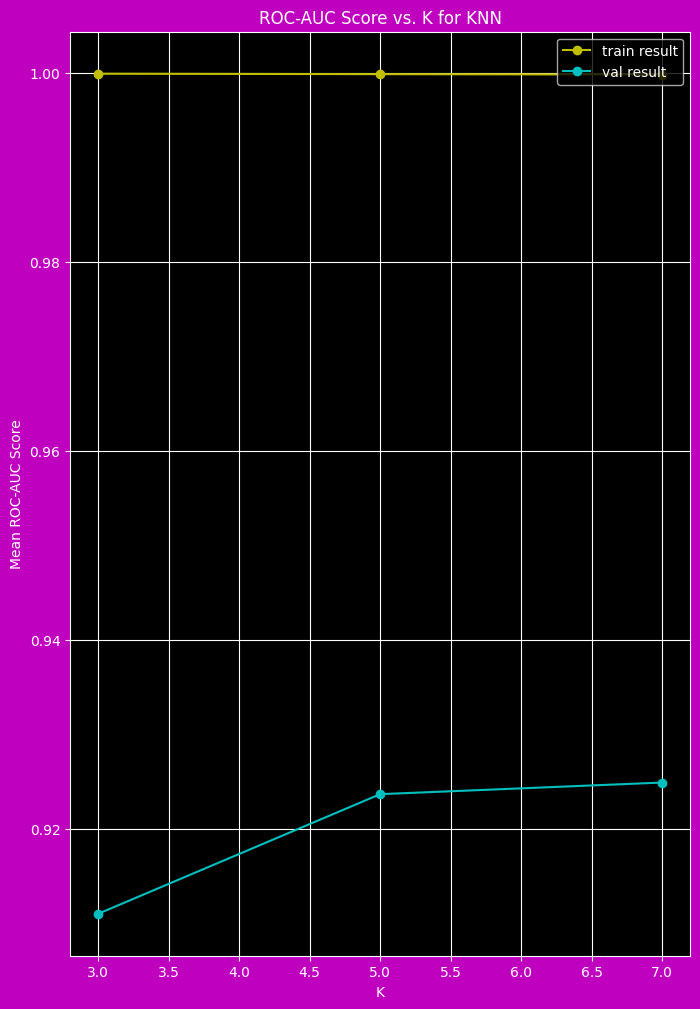





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of K: 
 [0.9999479085933528, 0.9999030150193778, 0.9998607640754523]
Mean ROC-AUC scores for val data for all values of K: 
 [0.9110686212594891, 0.9237188714312442, 0.9249482980359366]
Best K: 7
Best Mean ROC-AUC score for val data: 0.9249482980359366




In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Define your values of K (number of neighbors)
K_values = [3, 5, 7]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# Create subplots for ROC curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Define the KFold object
# skf = KFold(n_splits=3, shuffle=False, random_state=42)

# Loop through each value of K
for k in K_values:
    print("K =", k)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = knn_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0]

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0]

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores and mean false positive rates for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)
    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_fpr_train = mean_fpr
    ax1.plot(mean_fpr_train, mean_tpr_train, linestyle='-', lw=2, label='K = ' + str(k) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)).format(k))

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)
    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)).format(k))

    print("Mean ROC-AUC for train data:", mean_roc_auc_train)
    print("Mean ROC-AUC for val data:", mean_roc_auc_val)


    print("------------------------------------------------------------------------------------------------------------")

print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plot ROC curves for train and val data
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc='lower right')
ax1.grid(True)  # Add grid to the plot

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Add grid to the plot

plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score vs. K for KNN')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of K
print("Mean ROC-AUC scores for train data for all values of K: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_k = K_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k) 
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

Euclidean distance is a good choice for problems where the variables have similar importance and are measured in the same scale. On the other hand, Manhattan distance is a good choice when variables have different scales or when you want to penalize differences in some variables more heavily than others.

In [58]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameters for Stratified K-fold cross vaidation
"""
This code performs hyperparameter tuning using K-fold cross-validation for logistic regression. 
The parameter grid being searched is defined in params, with C being the regularization parameter for logistic regression. 
folds is an object that defines how many folds should be used in cross-validation.
"""

# Define the parameter grid for KNN
params = {'n_neighbors': [5, 7, 9], 'metric': ['euclidean', 'manhattan']}
# params = {'n_neighbors': [5, 7, 9], 'metric': ['manhattan']}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
param_grid = params, 
scoring= 'roc_auc', 
cv = skf, 
n_jobs=-1, # using 100% of CPU
verbose = 1,
pre_dispatch = 6, # prevents explosion of consumption of memory
return_train_score=True) 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)


end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Time taken: 3426.56 seconds
Best ROC AUC score:  0.9274613536399045
Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 9}


In [59]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.9237188714312442
{'metric': 'euclidean', 'n_neighbors': 7} 0.9249482980359366
{'metric': 'euclidean', 'n_neighbors': 9} 0.9261800797907048
{'metric': 'manhattan', 'n_neighbors': 5} 0.9199133911827756
{'metric': 'manhattan', 'n_neighbors': 7} 0.9249464674108103
{'metric': 'manhattan', 'n_neighbors': 9} 0.9274613536399045

Rank of each hyperparameter combination:
1 {'metric': 'euclidean', 'n_neighbors': 5}
2 {'metric': 'euclidean', 'n_neighbors': 7}
3 {'metric': 'euclidean', 'n_neighbors': 9}
4 {'metric': 'manhattan', 'n_neighbors': 5}
5 {'metric': 'manhattan', 'n_neighbors': 7}
6 {'metric': 'manhattan', 'n_neighbors': 9}

Standard deviation of test scores:
{'metric': 'euclidean', 'n_neighbors': 5} 0.008173267654223946
{'metric': 'euclidean', 'n_neighbors': 7} 0.009939580795531786
{'metric': 'euclidean', 'n_neighbors': 9} 0.009497669930691913
{'metric': 'manhattan', 'n_neighbors': 5} 0.006252931353180843
{'metric': 'manhattan'

## 3. SVM Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

=============================================SVM Classifier:================================================
C = 0.1 Kernel = rbf
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 3480.498384952545 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 8724.59965133667 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 3621.356724500656 seconds
ROC-AUC Score for train data = 0.9991620599736812
ROC-AUC Score for val data = 0.9557424981544221
------------------------------------------------------------------------------------------------------------
C = 1 Kernel = rbf
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 755.1647365093231 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 759

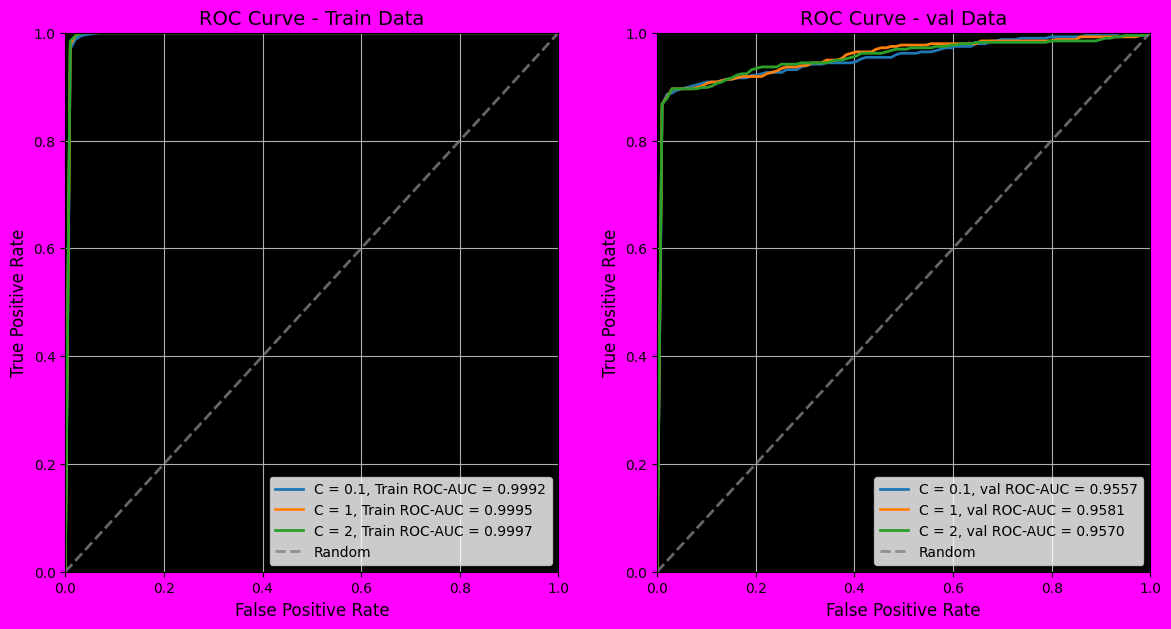

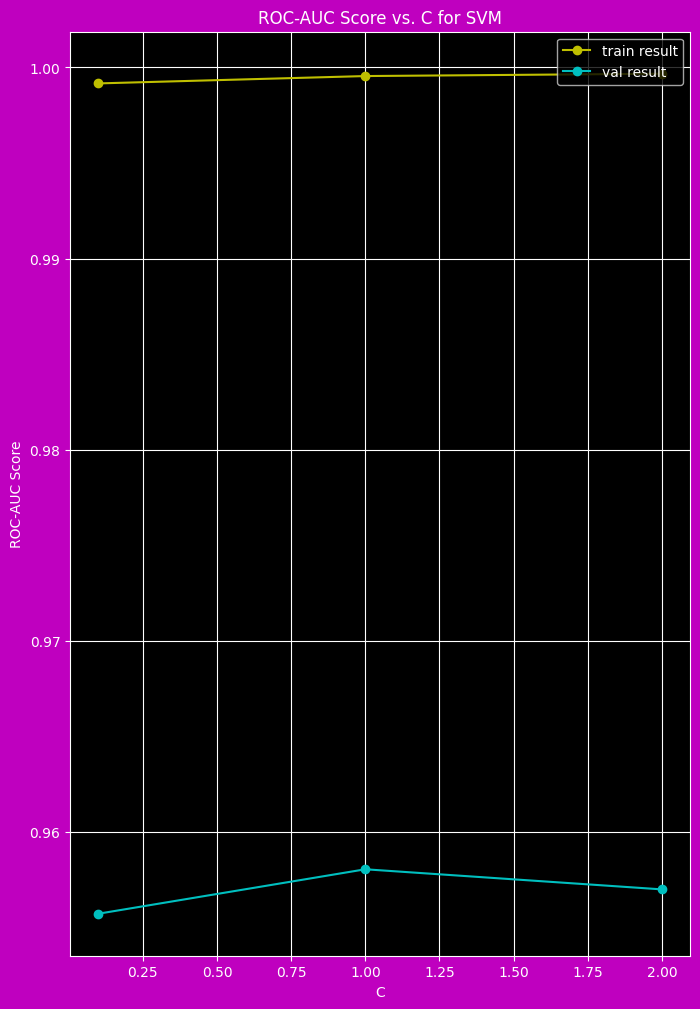





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of C: 
 [0.9991620599736812, 0.9995467697650952, 0.9996688377423705]
Mean ROC-AUC scores for val data for all values of C: 
 [0.9557424981544221, 0.95806649696548, 0.9570148341035694]
Best C: 1
Best Mean ROC-AUC score for val data: 0.95806649696548




In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # svm_classifier = svm.SVC(kernel='linear', C=c, probability=True)
        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = svm_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
    # Calculate mean ROC-AUC scores for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for train data
    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='C = {}, Train ROC-AUC = {:.4f}'.format(c, mean_roc_auc_train))

    # Plot ROC curves for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=========================================SVM Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for train data
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curve - Train Data', fontsize=14)
ax1.legend(loc="lower right")
ax1.grid(True)  # Add grid to the plot

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for train data for all values of C: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [61]:
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
param_grid = params, 
scoring= 'roc_auc', 
cv = skf, 
n_jobs=-1, # using 100% of CPU
verbose = 1,
pre_dispatch = 6, # prevents explosion of consumption of memory
return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


IOStream.flush timed out


Time taken: 3739.01 seconds
Best ROC AUC score:  0.9565173998635063
Best hyperparameters:  {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [62]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9565173998635063
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.9555807607718613

Rank of each hyperparameter combination:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Standard deviation of test scores:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.012505854322583103
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.009905889149890136


## 4. Decision Tree

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

==============================================Decision Tree:================================================
Max Depth = 1
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 39.5452721118927 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.9717750549316406 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 1.1637969017028809 seconds
ROC-AUC Score for val data = 0.8260369152950421
Mean precision val score: 0.7687499999999999
Mean recall val score: 0.6524211581463489
Mean f1 val score: 0.7037697164558141
------------------------------------------------------------------------------------------------------------
Max Depth = 2
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 2.6164357662200928 seconds

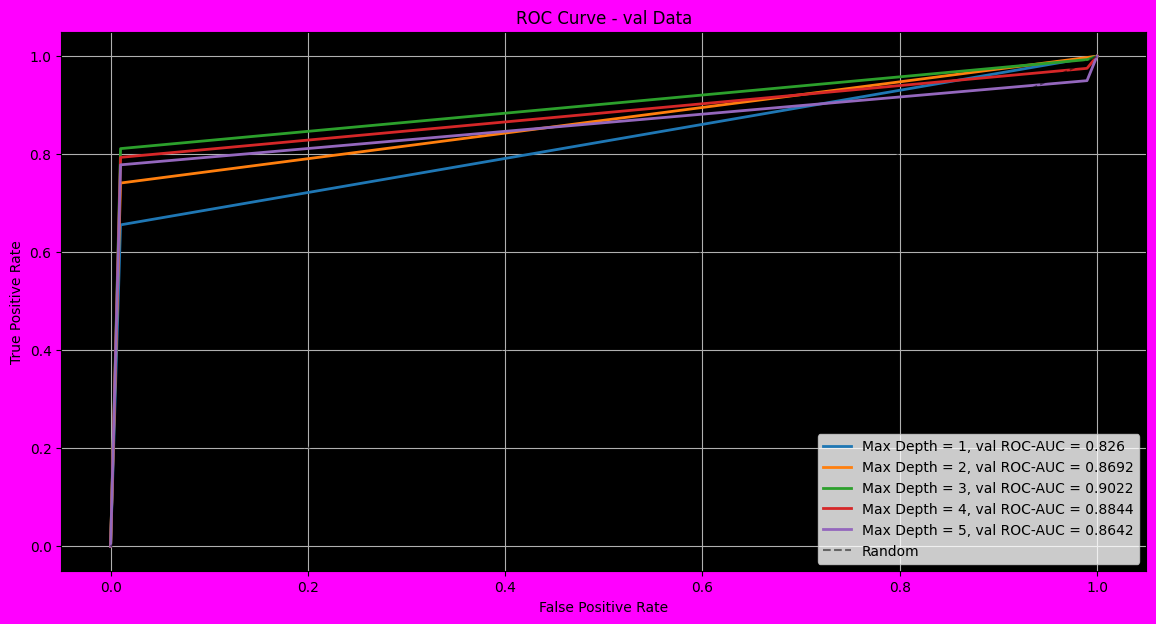

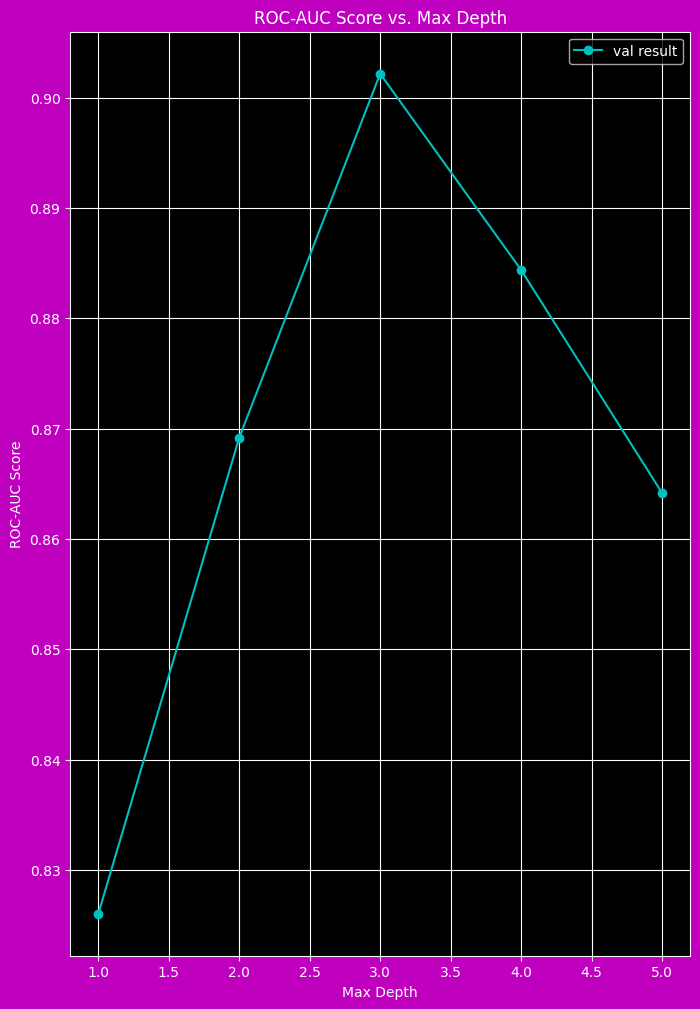





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Max Depth: 
 [0.8260369152950421, 0.869181657800751, 0.9021555580860897, 0.88437830218394, 0.8641761384558247]
Best Max Depth: 3
Best Mean ROC-AUC score for val data: 0.9021555580860897
Mean precision val score for best C 0.8427378598110306
Mean recall val score for best C 0.7107332870691648
Mean f1 val score for best C 0.769672510656886




In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

narrowing max depth to 2,3,4

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

setting a maximum depth for the tree is a form of regularization that can help prevent overfitting. However, setting the maximum depth too low may result in underfitting and reduced model performance. Therefore, the optimal value of max_depth depends on the complexity of the problem and the available data.

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to be tuned
params = {'max_depth': [2, 3, 4],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()

# Print the time taken to fit the model
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Time taken: 513.74 seconds
Best ROC AUC score:  0.9337472016466822
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [65]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5} 0.869181657800751
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10} 0.869181657800751
{'criterion': 'gini', 'max_depth': 3, 'min_samples_l

## 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

================================================Random Forest:==============================================
n_estimators = 10
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 39.4591851234436 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 42.516132831573486 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 16.98302412033081 seconds
ROC-AUC Score for train data = 0.9999988372166181
ROC-AUC Score for val data = 0.9273714127391656
------------------------------------------------------------------------------------------------------------
n_estimators = 50
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 85.51731657981873 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936 

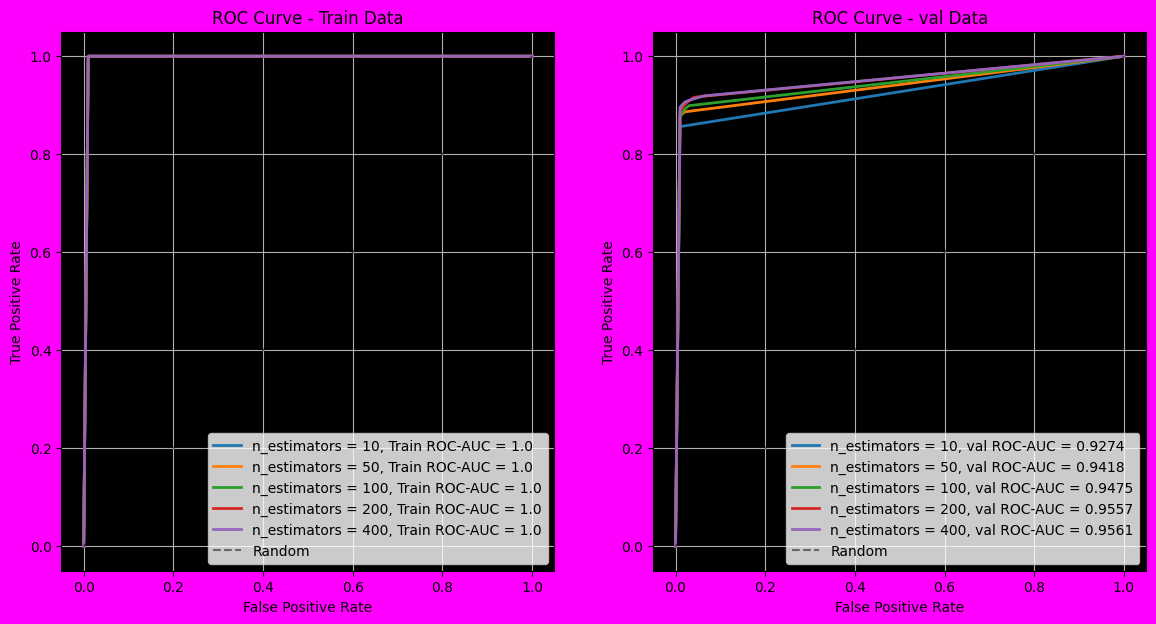

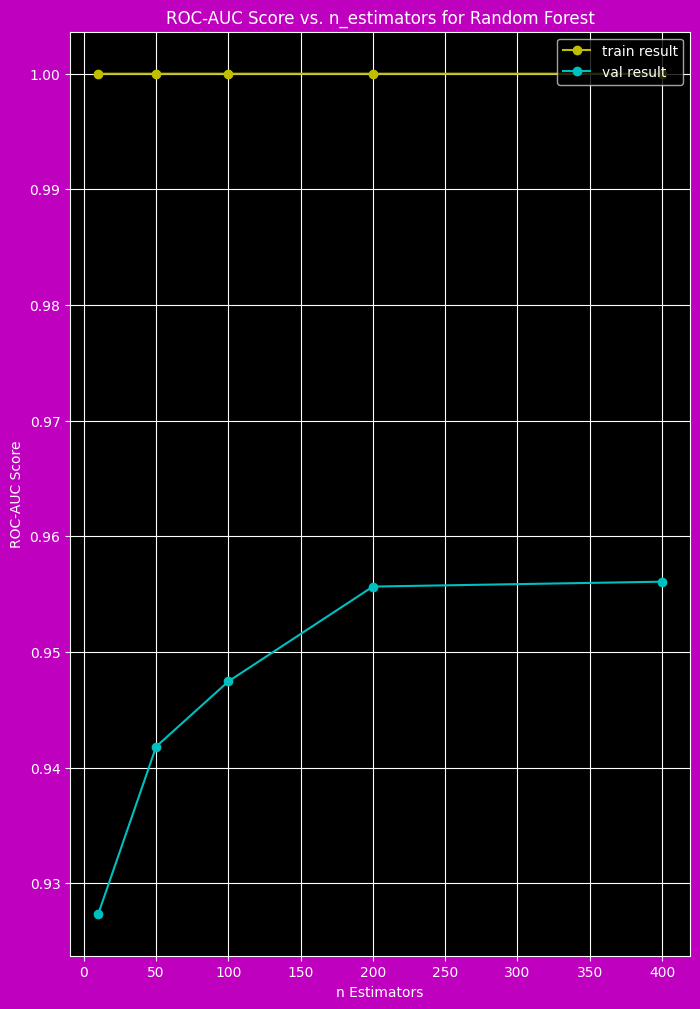





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for train data for all values of n Estimators: 
 [0.9999988372166181, 1.0, 1.0, 1.0, 1.0]
Mean ROC-AUC scores for val data for all values of n Estimators: 
 [0.9273714127391656, 0.9418199253818283, 0.9474606460931231, 0.9556584658505317, 0.9560807722524233]
Best n Estimators: 400
Best Mean ROC-AUC score for val data: 0.9560807722524233




In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier




print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_train = []
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')


# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_train = []
    cv_scores_val = []
    fprs_train = []
    tprs_train = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_train_pred = rf_classifier.predict_proba(X_train_cv)
        train_score = roc_auc_score(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        cv_scores_train.append(train_score)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_train, tpr_train, _ = roc_curve(y_true=y_train_cv, y_score=y_train_pred[:, 1])
        tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0
        fprs_train.append(fpr_train)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for train and val data
    mean_roc_auc_train = np.mean(cv_scores_train)
    mean_roc_auc_scores_train.append(mean_roc_auc_train)

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for train data =", mean_roc_auc_train)
    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax1.plot(mean_fpr, np.mean(tprs_train, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', Train ROC-AUC = ' + str(round(mean_roc_auc_train, 4)))
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax1.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Train Data')
ax1.legend(loc="lower right")
ax1.grid(True)  # Add grid to the plot

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(n_values, mean_roc_auc_scores_train, 'yo-')
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of n Estimators
print("Mean ROC-AUC scores for train data for all values of n Estimators: \n", mean_roc_auc_scores_train)
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_n_estimators = n_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)



print("============================================================================================================")
print("\n")
print("============================================================================================================")

Narrowing to Best n Estimators: 400 It is taking Time elapsed: ~ 1517.3193807601929 seconds for each set of 3 folds

Increasing the number of trees in the forest can improve the performance of the model by reducing the variance and increasing the accuracy of the predictions.

This is because more trees mean a larger number of votes for the final prediction, leading to more stable and reliable predictions.

Moreover, increasing the number of trees can help to capture the complex relationships between the features in the dataset, leading to better generalization.

So taking the range of n Estimators as [500], which will take nearly 2000 seconds (35 min) to run a set of 3 folds.

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

min_samples_leaf: It depends on the dataset and the specific problem being addressed. Generally, a smaller min_samples_leaf will lead to a more complex decision tree that overfits the training data, while a larger min_samples_leaf will lead to a simpler decision tree that underfits the training data.
Extra Notes

min_samples_split: The optimal value for min_samples_split may depend on the specific dataset and problem at hand, so it is difficult to say which value is definitively better without more information. In general, setting min_samples_split to a higher value can reduce the risk of overfitting, but it may also lead to underfitting if the value is set too high. A lower value for min_samples_split may result in a more complex decision tree model that better fits the training data, but this may come at the cost of overfitting. It is common to try several different values of min_samples_split during hyperparameter tuning to find the best value for the specific problem.

max_features: Both "sqrt" and "log2" are good options for the max_features hyperparameter in Random Forests. They correspond to using the square root and the base-2 logarithm of the number of features, respectively. The idea behind using a smaller number of features is to reduce the variance of the model, which can lead to better generalization performance. However, selecting too few features may result in an underfitting model. In practice, it is recommended to try both options and see which one works better for a given dataset. Additionally, one can try other values for max_features as well, such as using a fixed number of features or a percentage of the total number of features.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7],
    }

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1,
                        verbose=1,
                        # pre_dispatch=6, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Time taken: 2882.32 seconds
Best ROC AUC score:  0.9576653869142703
Best hyperparameters:  {'min_samples_split': 5, 'n_estimators': 500}


In [68]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.9576653869142703
{'min_samples_split': 7, 'n_estimators': 500} 0.956935709146285

Rank of each hyperparameter combination:
1 {'min_samples_split': 5, 'n_estimators': 500}
2 {'min_samples_split': 7, 'n_estimators': 500}

Standard deviation of test scores:
{'min_samples_split': 5, 'n_estimators': 500} 0.005868574170011708
{'min_samples_split': 7, 'n_estimators': 500} 0.005895398413952664


## 6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

============================================XGBoost Classifier:=============================================
Learning Rate = 0.001
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 51.97150802612305 seconds
Train: [     0      1      2 ... 227842 227843 227844] val: [ 75936  75937  75938 ... 153006 153116 153683]
Time elapsed: 1.1403875350952148 seconds
Train: [     0      1      2 ... 153006 153116 153683] val: [151894 151895 151896 ... 227842 227843 227844]
Time elapsed: 26.366637706756592 seconds
ROC-AUC Score for val data = 0.9291700281139169
Mean precision val score: 0.0
Mean recall val score: 0.0
Mean f1 val score: 0.0
------------------------------------------------------------------------------------------------------------
Learning Rate = 0.01
Train: [ 75936  75937  75938 ... 227842 227843 227844] val: [    0     1     2 ... 83545 84117 84974]
Time elapsed: 7.824983596801758 seconds
Train: [     0      1      2 

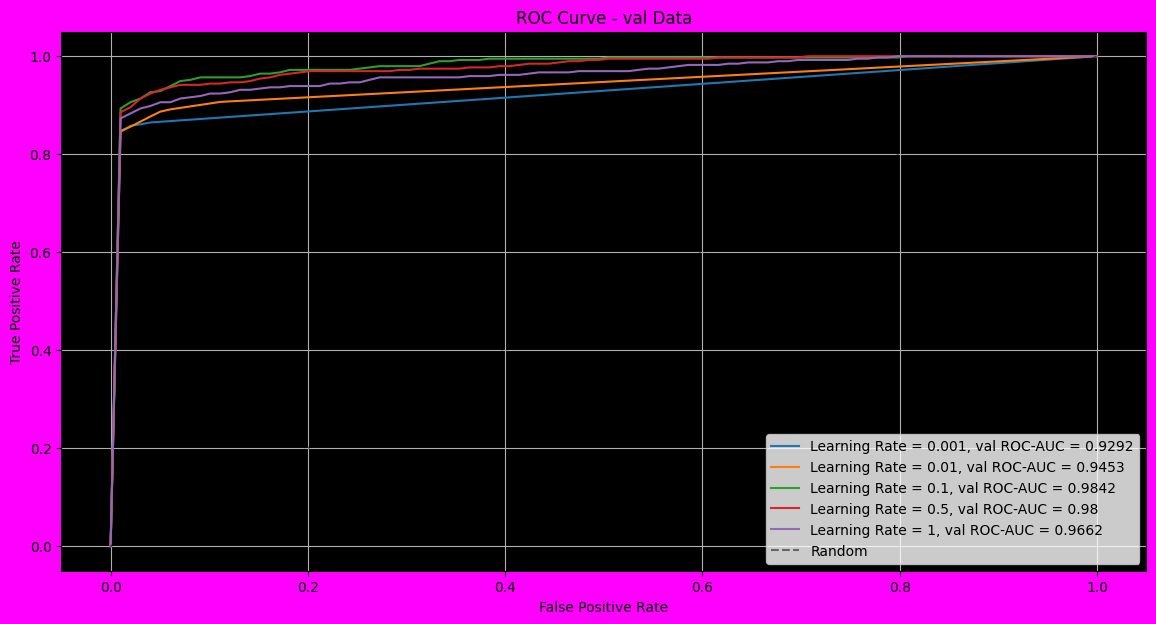

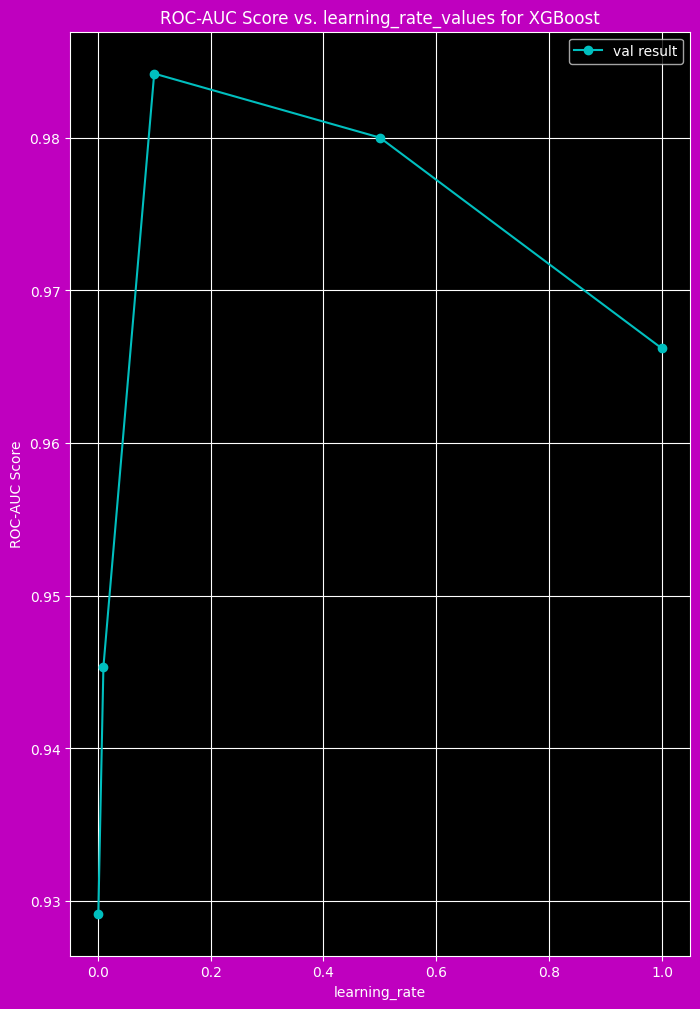





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of Learning Rate: 
 [0.9291700281139169, 0.945335595298488, 0.9841956933358063, 0.9800009951074783, 0.9661872321498599]
Best Learning Rate : 0.1
Best Mean ROC-AUC score for val data: 0.9841956933358063
Mean precision val score for best C 0.9231163950991537
Mean recall val score for best C 0.7767175572519084
Mean f1 val score for best C 0.843119362083911




In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_train_pt[train_index], X_train_pt[val_index]
        y_train_cv, y_val_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

Best Learning Rate : 0.1

In [70]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning
model_GridSearch.fit(X_train_pt, y_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time taken: 192.09 seconds
Best ROC AUC score:  0.9835201260497678
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}


In [71]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} 0.982702128119914
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7} 0.9835201260497678
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9} 0.9822449799639249
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} 0.9824771506482223
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7} 0.9795080825114776
{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9} 0.9786927396236905
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.5} 0.9818957435995855
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7} 0.9820154584738643
{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.9} 0.9784259310965945

Rank of each hyperparameter combination:
1 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
2 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
3 {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
4 {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5}
5 {'learning_rate': 0

# Final Observation on Imbalanced Dataset

A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data

*LogisticRegression {'C': 0.01, 'penalty': 'l2'} =

Best Mean ROC-AUC score for val data: 0.9797969874466093
Mean precision val score for best C: 0.885478588591554
Mean recall val score for best C: 0.6295975017349064
Mean f1 val score for best C: 0.7341406860856002

*KNeighborsClassifier {'metric': 'manhattan', 'n_neighbors': 9} =

0.9274613536399045

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

0.9565173998635063

*DecisionTreeClassifier {'criterion': 'entropy', '': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =

Best Mean ROC-AUC score for val data: 0.9337472016466822
Mean precision val score for best max_depth: 0.8480952241800844
Mean recall val score for best max_depth: 0.71578379211967
Mean f1 val score for best max_depth: 0.7752315571186218

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

0.9646808744238831

*XGBClassifier {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.5} =

Best Mean ROC-AUC score for val data: 0.9859738836378374
Mean precision val score for best Learning Rate: 0.9233400094242072
Mean recall val score for best Learning Rate: 0.779204256303493
Mean f1 val score for best Learning Rate: 0.8448234879500908

# Evaluation over Test Set

Proceed with the model which shows the best result

Apply the best hyperparameter on the model
Predict on the test dataset

In [72]:
X_test_saved.head()
y_test_saved.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

In [73]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [74]:
X_test_saved.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.014079
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.142897
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.761228
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.295791
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.288610


In [75]:
"""
The code appears to be initializing and training several classification models with best hyperparameters and 
then evaluating their performance using ROC-AUC score.

Each model is trained on the same training data (X_train_pt and y_train_pt) and 
then used to predict the probability of the target class (y) for the test data (X_test_pt). 
The predicted probabilities are then used to calculate the ROC-AUC score, which is a measure of the 
model's ability to distinguish between positive and negative samples.

The ROC-AUC score for each model is printed to the console.
"""

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_train_pt, y_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")



LogisticRegression ROC-AUC Score on Test Set = 0.9752271441778737
LogisticRegression F1-Score on Test Set = 0.5977011494252873
LogisticRegression Precision on Test Set = 0.4785276073619632
LogisticRegression Recall on Test Set = 0.7959183673469388
Time taken: 21.69 seconds


In [76]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385655570613163
KNeighbors Classifier F1-Score on Test Set = 0.824858757062147
KNeighbors Classifier Precision on Test Set = 0.9240506329113924
KNeighbors Classifier Recall on Test Set = 0.7448979591836735
Time taken: 257.05 seconds


In [77]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987
Decision Tree Classifier F1-Score on Test Set = 0.8200000000000001
Decision Tree Classifier Precision on Test Set = 0.803921568627451
Decision Tree Classifier Recall on Test Set = 0.8367346938775511
Time taken: 8.98 seconds


In [78]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9698374496112456
XGBOOST Classifier F1-Score on Test Set = 0.8241206030150754
XGBOOST Classifier Precision on Test Set = 0.8118811881188119
XGBOOST Classifier Recall on Test Set = 0.8367346938775511
Time taken: 5.78 seconds


In [79]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

start_time = time.time()
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')
clf.fit(X_train_pt, y_train_pt)
y_pred_proba = clf.predict_proba(X_test_saved)
y_pred = clf.predict(X_test_saved)
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("F1 Score on Test Set =", f1)
print("Precision on Test Set =", preci_sion)
print("Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

SVM Classifier ROC-AUC Score on Test Set = 0.9545873146670034
F1 Score on Test Set = 0.0
Precision on Test Set = 0.0
Recall on Test Set = 0.0
Time taken: 3291.88 seconds


In [80]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_train_pt, y_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

Random Forest Classifier ROC-AUC Score on Test Set = 0.9606794550262424
Random Forest Classifier F1-Score on Test Set = 0.8241206030150754
Random Forest Classifier Precision on Test Set = 0.8118811881188119
Random Forest Classifier Recall on Test Set = 0.8367346938775511
Time taken: 1446.53 seconds


B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set

*LogisticRegression {'C': 0.01, 'penalty': 'l2'} =

LogisticRegression ROC-AUC Score on Test Set = 0.9752271441778737
LogisticRegression F1-Score on Test Set = 0.5977011494252873
LogisticRegression Precision on Test Set = 0.4785276073619632
LogisticRegression Recall on Test Set = 0.7959183673469388

*KNeighborsClassifier {'metric': 'manhattan', 'n_neighbors': 9} =

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9385655570613163
KNeighbors Classifier F1-Score on Test Set = 0.824858757062147
KNeighbors Classifier Precision on Test Set = 0.9240506329113924
KNeighbors Classifier Recall on Test Set = 0.7448979591836735

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

SVM Classifier ROC-AUC Score on Test Set = 0.9701114653796241
SVM Classifier F1 Score on Test Set = 0.8121827411167513
SVM Classifier Precision on Test Set = 0.8080808080808081
SVM Classifier Recall on Test Set = 0.8163265306122449

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9314465304973987
Decision Tree Classifier F1-Score on Test Set = 0.8200000000000001
Decision Tree Classifier Precision on Test Set = 0.803921568627451
Decision Tree Classifier Recall on Test Set = 0.8367346938775511

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

Random Forest Classifier ROC-AUC Score on Test Set = 0.9623530686894904
Random Forest Classifier F1-Score on Test Set = 0.8282828282828283
Random Forest Classifier Precision on Test Set = 0.82
Random Forest Classifier Recall on Test Set = 0.8367346938775511

*XGBClassifier {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} =

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9713649035866456
XGBOOST Classifier F1-Score on Test Set = 0.7962085308056872
XGBOOST Classifier Precision on Test Set = 0.7433628318584071
XGBOOST Classifier Recall on Test Set = 0.8571428571428571

Best model is LogisticRegression

# Table of Scores

| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- |
| LogisticRegression | {'C': 0.01, 'penalty': 'l2'}	| 0.975227144 | 0.59770115 | 0.47852761 | 0.79591836 |
| KNeighborsClassifier	| {'metric': 'manhattan', 'n_neighbors': 9}	| 0.938565557 | 0.82485875 | 0.92405063 | 0.74489795 |
| svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| 0.970111465 | 0.81218274 | 0.80808081 | 0.81632653 |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	| 0.931446530 | 0.82000000 | 0.80392156 | 0.83673469 |
| RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.962353068 | 0.82828283 | 0.82000000 | 0.83673469 |
| XGBClassifier | {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} | 0.971364903 | 0.79620853 | 0.74336283 | 0.85714286 |

1. Best model is LogisticRegression based on ROC-AUC Score
2. Best model is RandomForestClassifier based on F1 Score

##Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


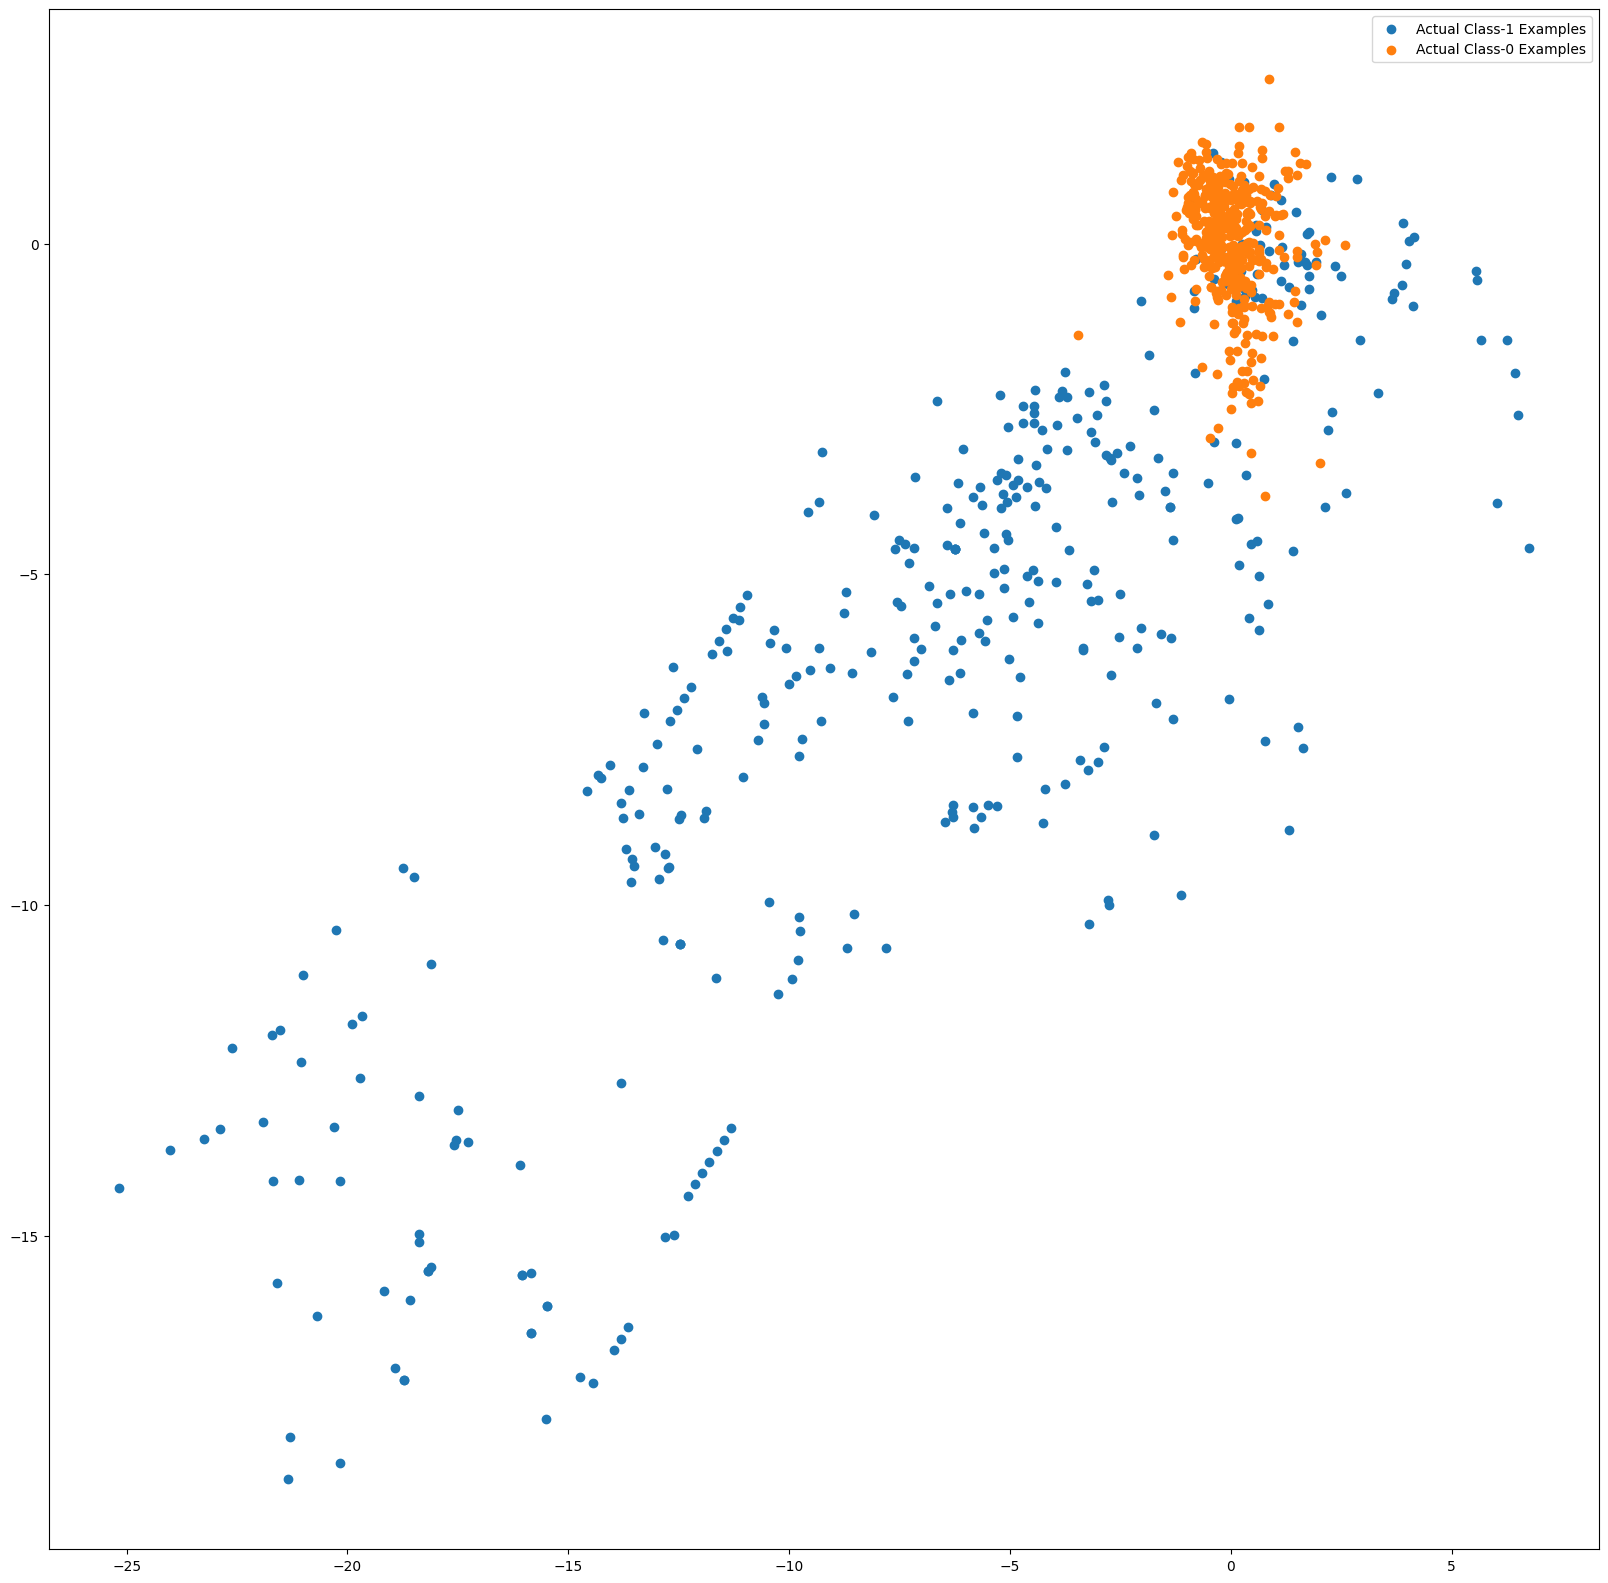

In [81]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Model Building with balancing Classes

*Why can't we use accuracy for imbalanced dataset?

Accuracy is not a good metric for imbalanced datasets.

This model would receive a very good accuracy score as it predicted correctly for the majority of observations, but this hides the true performance of the model which is objectively not good as it only predicts for one class

Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

In *undersampling*, you select fewer data points from the majority class for your model building process to balance both classes.

In *oversampling*, you assign weights to randomly chosen data points from the minority class. This is done so that the algorithm can focus on this class while optimising the loss function.

*SMOTE* is a process using which you can generate new data points that lie vectorially between two data points that belong to the minority class.

*ADASYN* is similar to SMOTE, with a minor change in the sense that the number of synthetic samples that it will add will have a density distribution. The aim here is to create synthetic data for minority examples that are harder to learn rather than the easier ones.

## Perform class balancing with :
I. Random Oversampling

II. SMOTE

III. ADASYN

After evaluation on the raw data set, the class imbalance has been handled using at least two of the techniques to balance both train and test data sets.

In [82]:
# # Logistic Regression
# from sklearn import linear_model #import the package

# num_C = ______  #--> list of values
# cv_num =   #--> list of values
# from imblearn import over_sampling #- import the packages

# #perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

# #perform hyperparameter tuning

# #print the evaluation result by choosing a evaluation metric

# #print the optimum value of hyperparameters

### I. Random Oversampling

Build different models on the balanced dataset and see the result

In [83]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [84]:
# # perfom cross validation on the X_train & y_train 
# ALREADY DONE ABOVE
# from sklearn.model_selection import StratifiedKFold

# #perform cross validation
# skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [85]:
from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data using RandomOverSampler
X_ros_train_pt, y_ros_train_pt = ros.fit_resample(X_train_pt, y_train_pt)

Print the class distribution after applying Random Oversampling

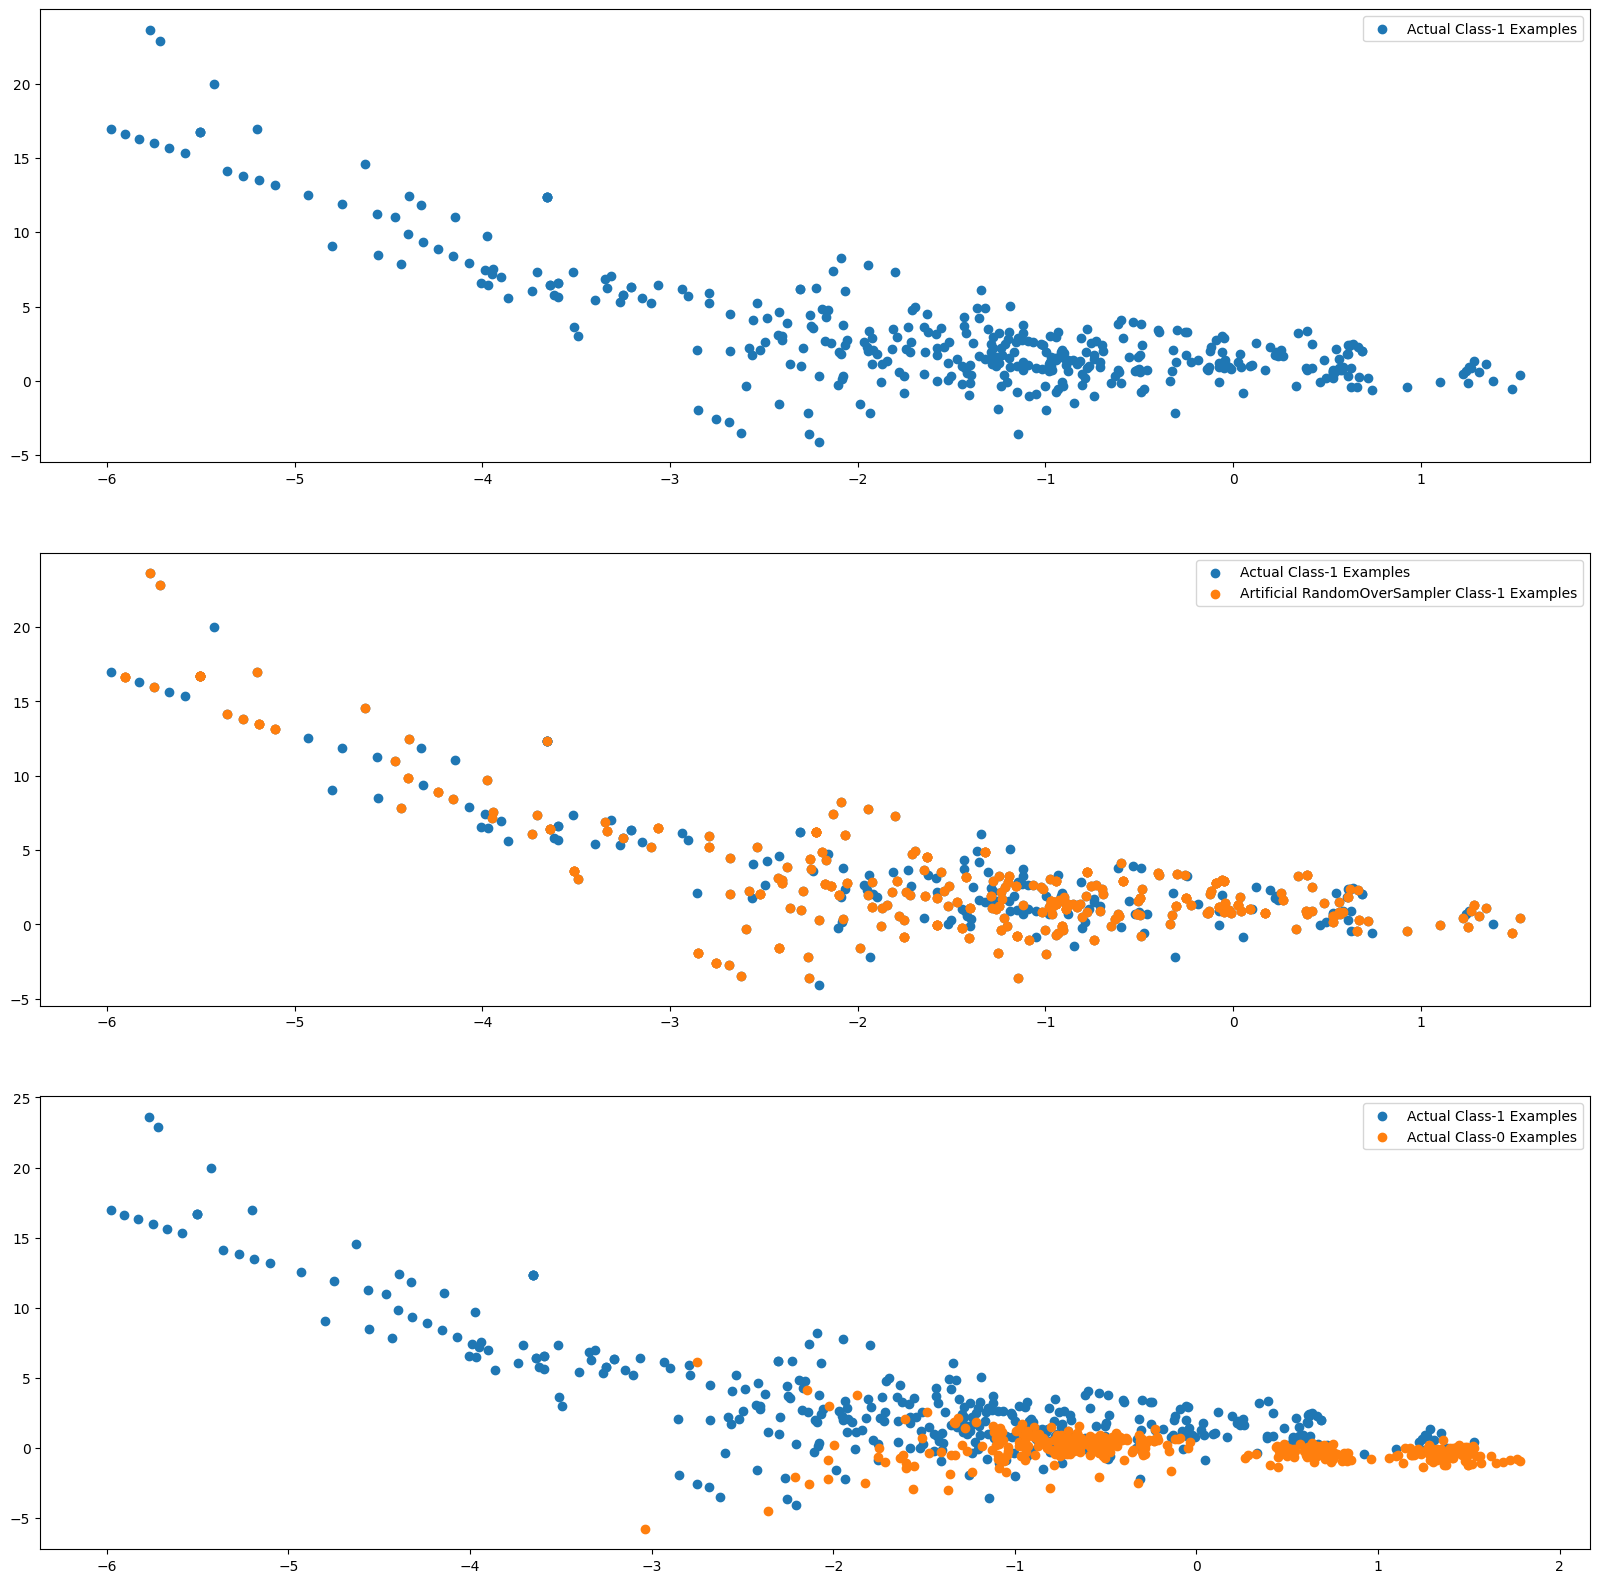

In [86]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from RandomOverSampler are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from RandomOverSampler, we do
X_ros_train_pt_1 = X_ros_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_ros_train_pt_1[:X_train_pt_1.shape[0], 0], X_ros_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

SOME MORE VISUALIZATION

Check the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.

y_ros_train_pt is your target variable, we can use the following code to check the distribution of its values:

In [87]:
print(y_ros_train_pt.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

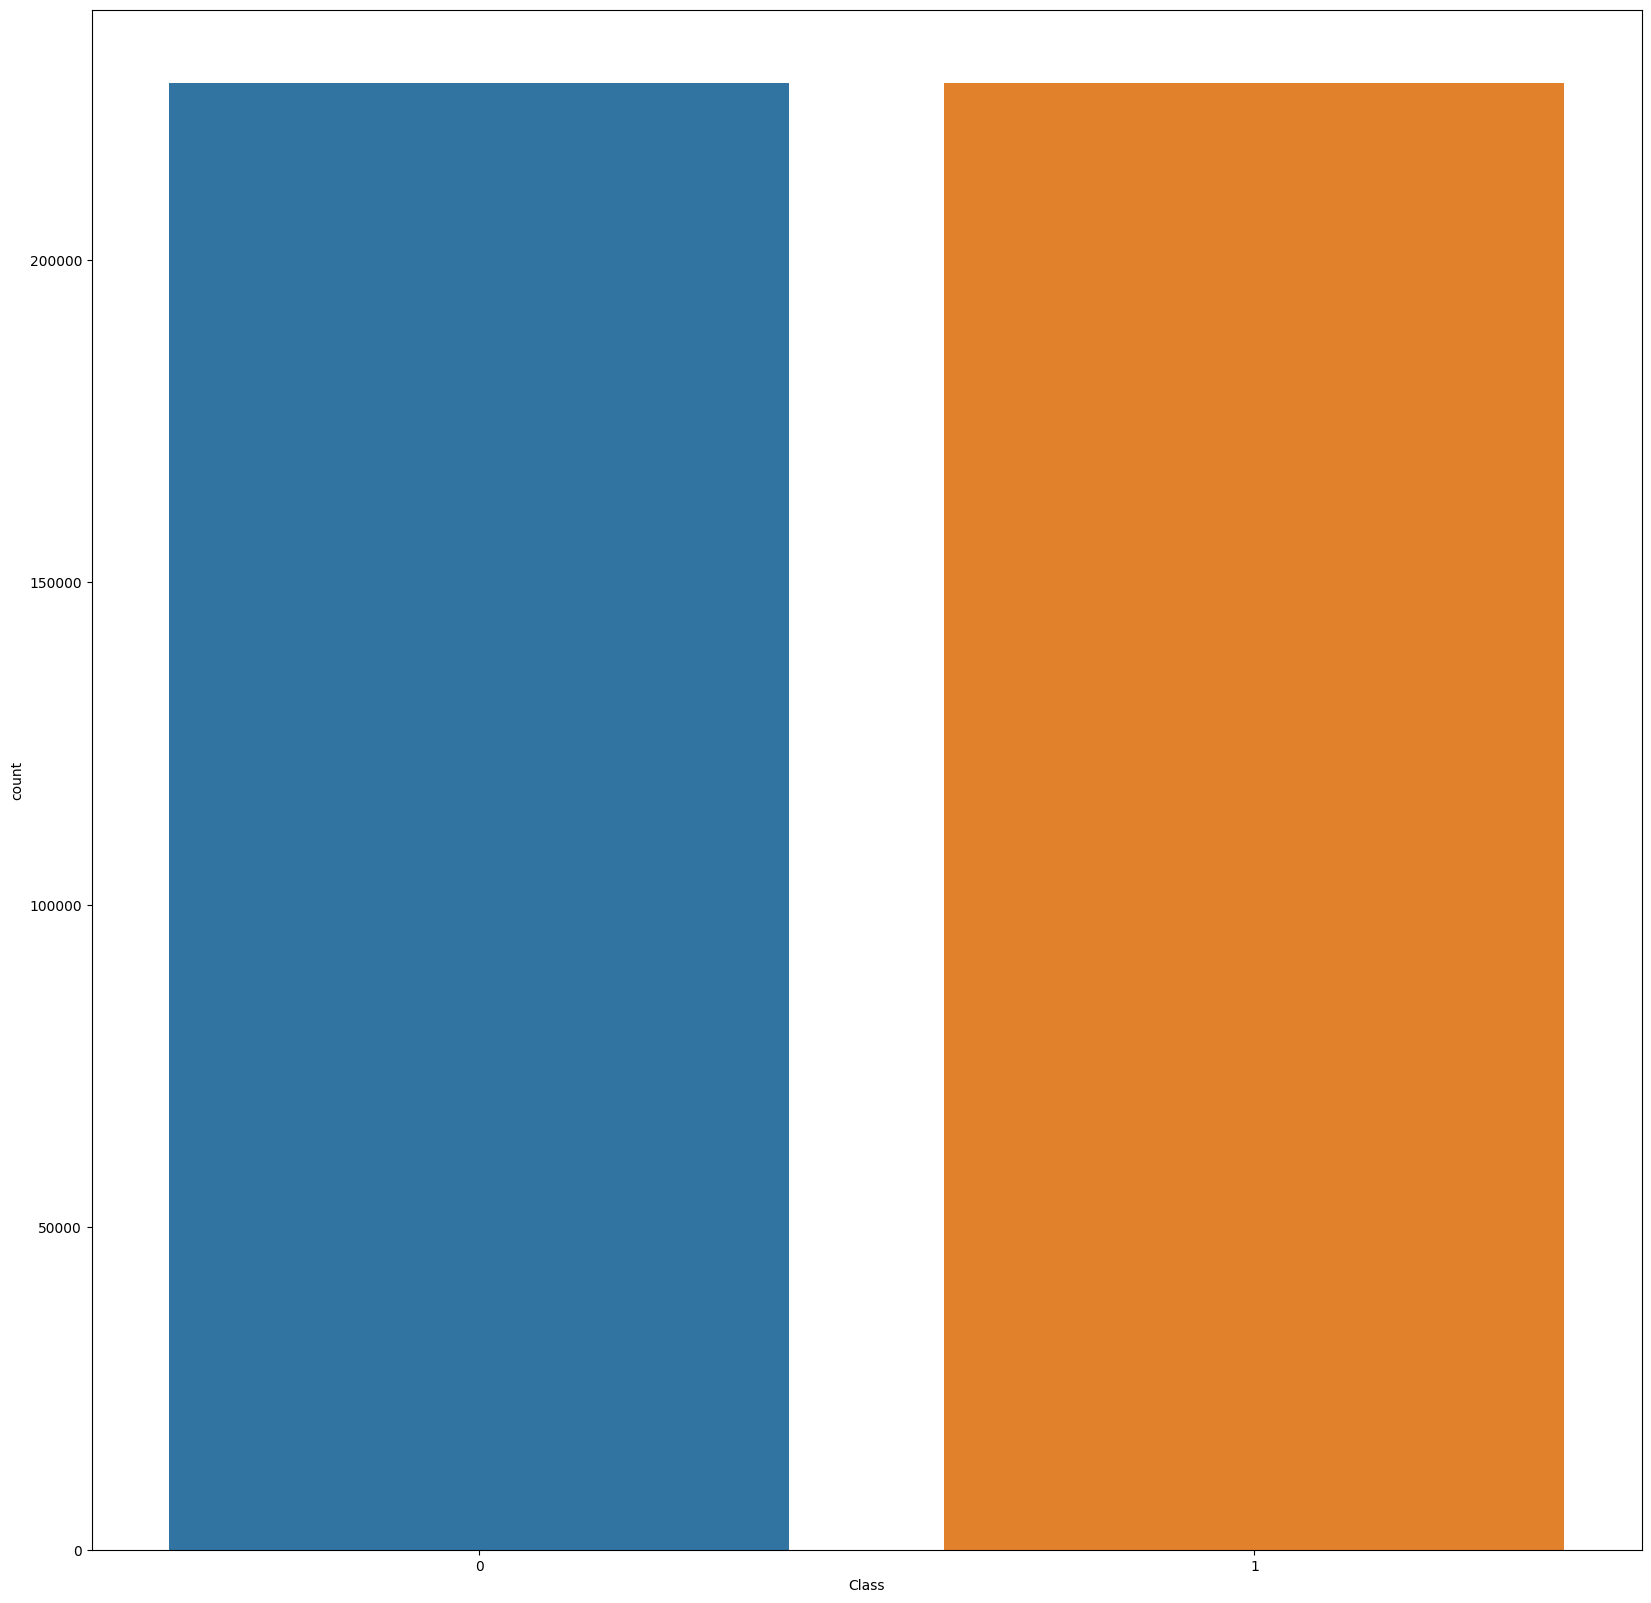

In [88]:
import seaborn as sns

sns.countplot(x=y_ros_train_pt)

(array([2.00000e+00, 1.20000e+01, 6.89000e+03, 8.64000e+03, 1.93390e+04,
        2.41990e+04, 7.23550e+04, 1.64576e+05, 9.98080e+04, 5.90810e+04]),
 array([-8.47181275, -7.43814201, -6.40447126, -5.37080052, -4.33712977,
        -3.30345903, -2.26978828, -1.23611754, -0.20244679,  0.83122396,
         1.8648947 ]),
 <BarContainer object of 10 artists>)

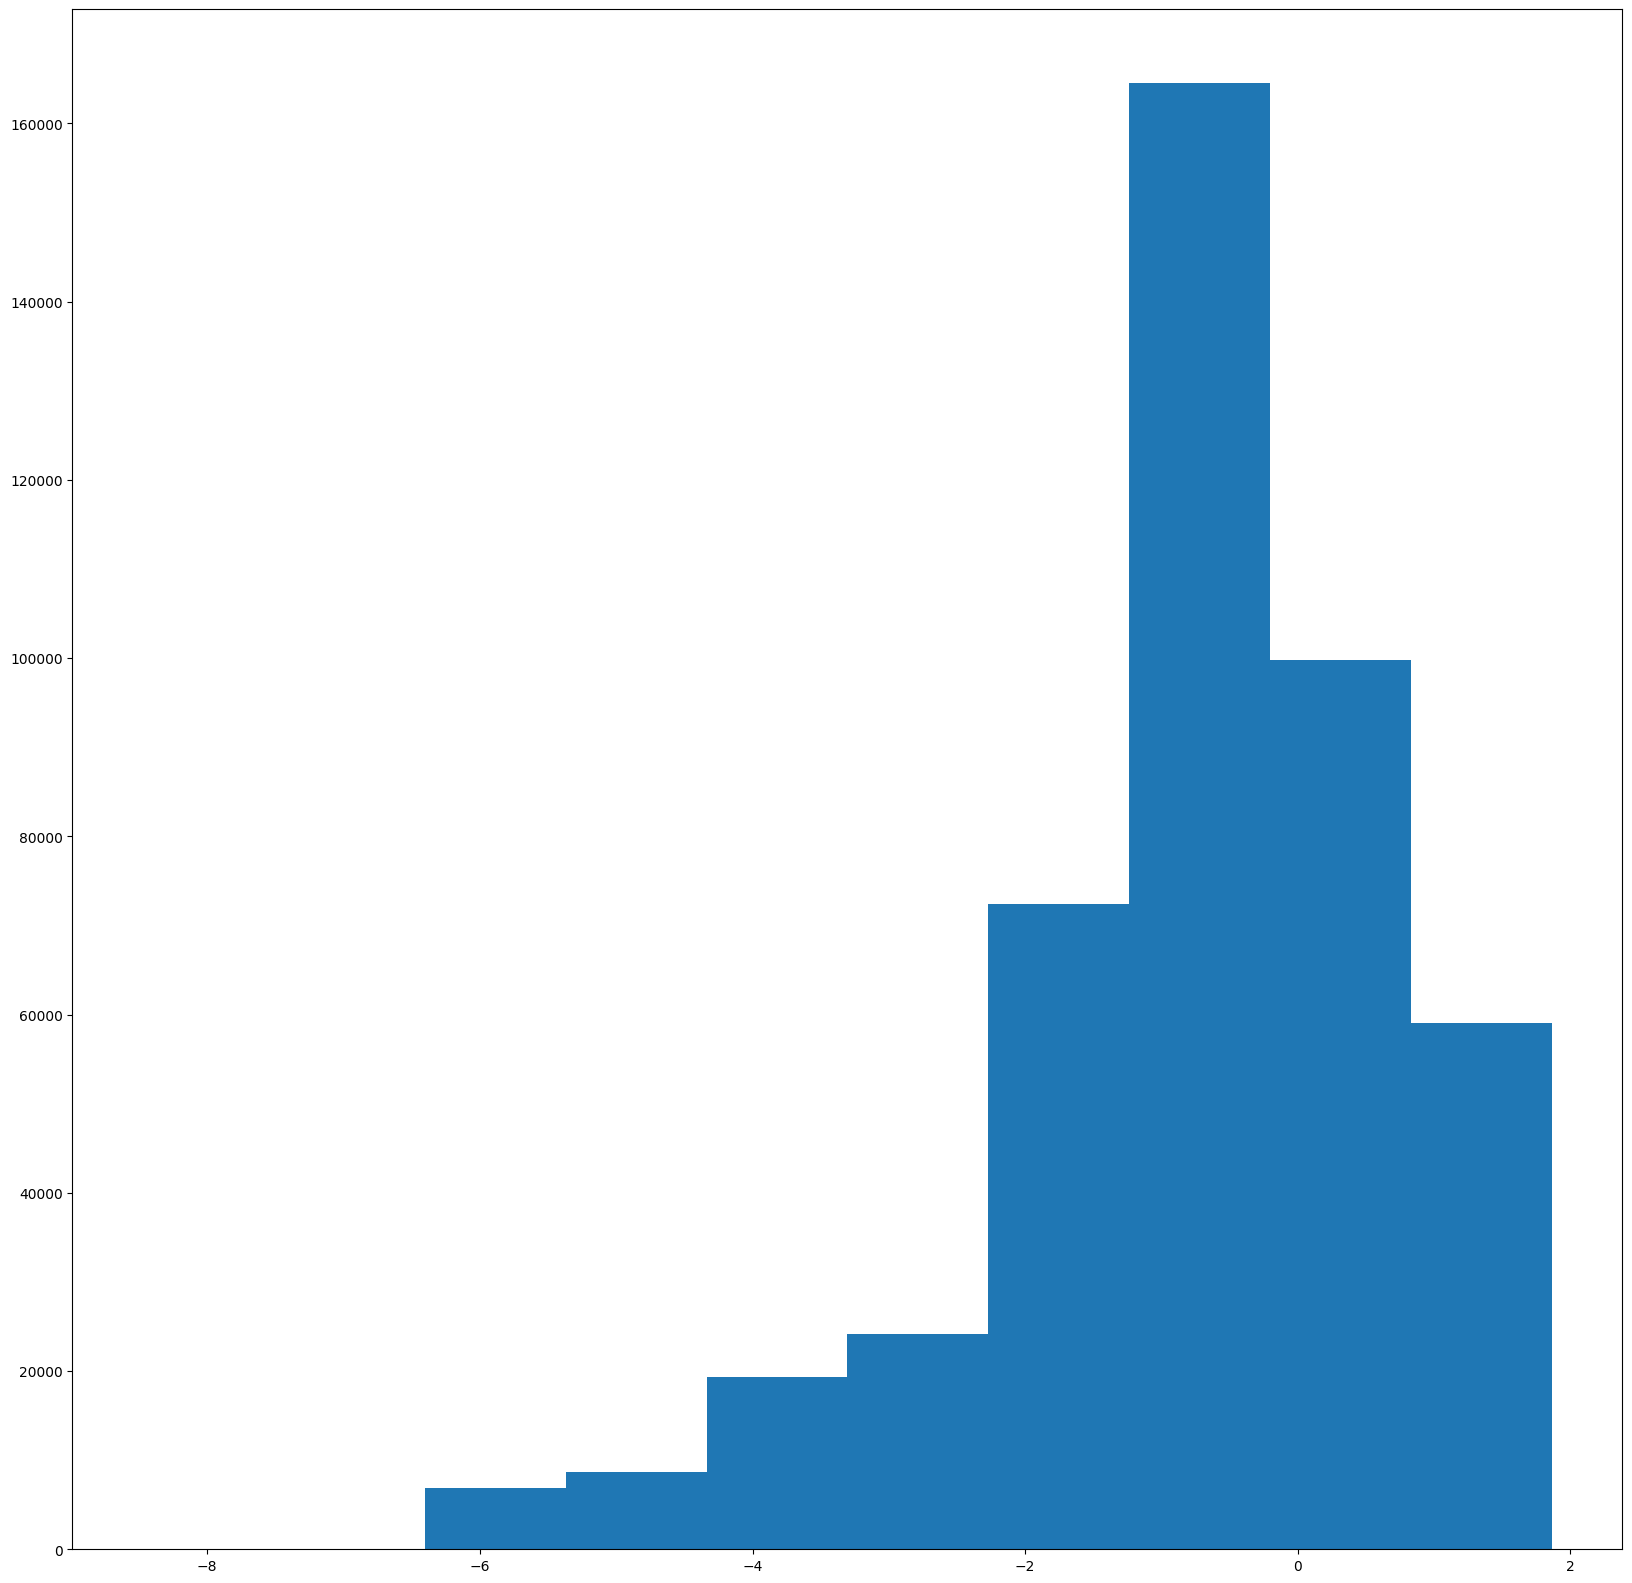

In [89]:
import matplotlib.pyplot as plt

plt.hist(X_ros_train_pt[:,0])

#### 1. Logistic Regression

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

======================================Logistic Regression Classifier:=======================================
C = 0.1 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 12.60581111907959 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 2.9870851039886475 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 3.248913526535034 seconds
ROC-AUC Score for val data = 0.9884596673443649
Mean precision val score: 0.971995125195427
Mean recall val score: 0.9294177647053652
Mean f1 val score: 0.9502289914447828
------------------------------------------------------------------------------------------------------------
C = 0.5 Penalty = L2
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 4

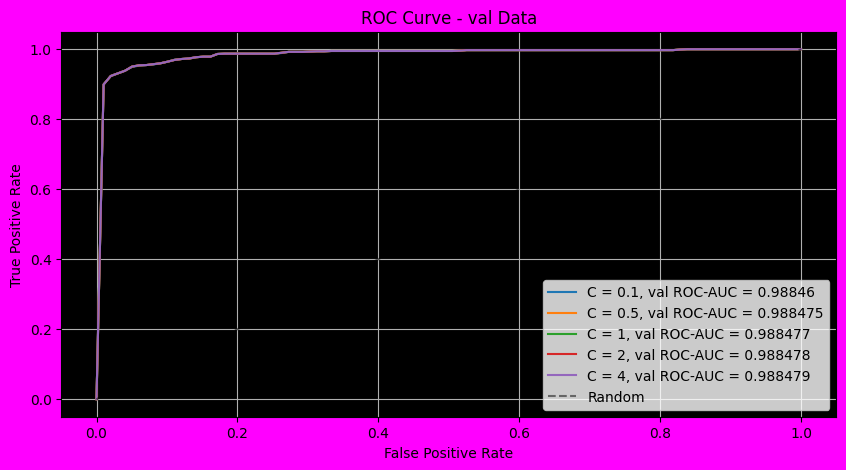

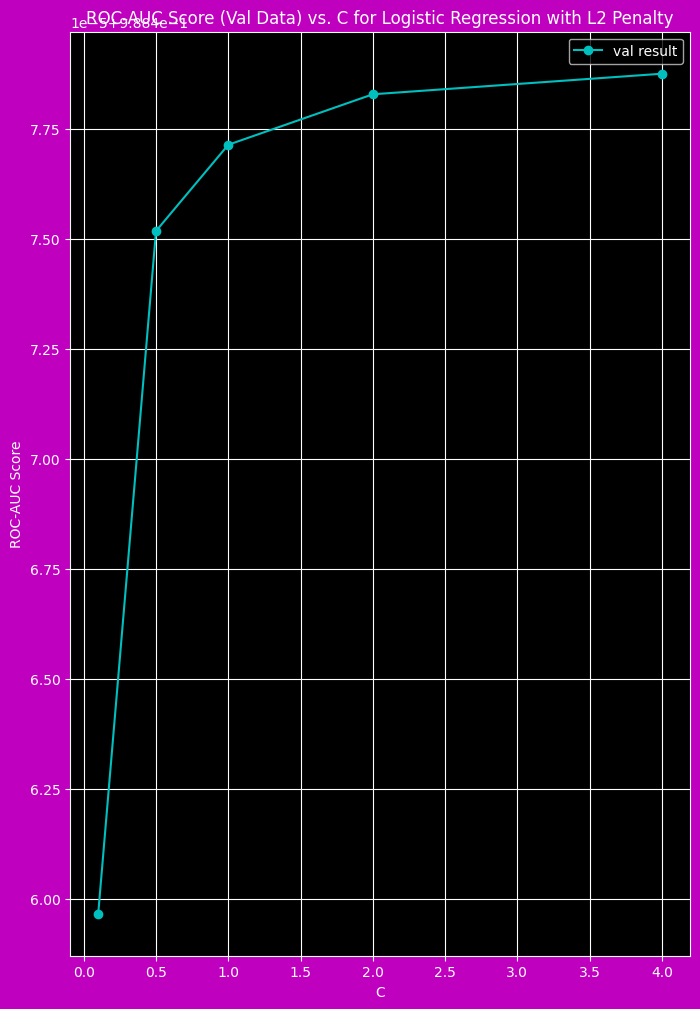





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of C: 
 [0.9884596673443649, 0.9884751736875926, 0.9884771319758253, 0.9884782784761702, 0.9884787455195051]
Best C: 4
Best Mean ROC-AUC score for val data: 0.9884787455195051
Mean precision val score for best C 0.9719371184117677
Mean recall val score for best C 0.9294177647053652
Mean f1 val score for best C 0.950201240931848
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for Logistic Regression classifier for val data
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for  and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Time taken: 298.27 seconds
Best ROC AUC score:  0.9884840531068964
Best hyperparameters:  {'C': 4, 'penalty': 'l2'}


In [92]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.9883179474109144
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.9884639663582266
{'C': 0.5, 'penalty': 'l1'} nan
{'C': 0.5, 'penalty': 'l2'} 0.988480560951858
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.9884825141950481
{'C': 2, 'penalty': 'l1'} nan
{'C': 2, 'penalty': 'l2'} 0.9884836085053008
{'C': 4, 'penalty': 'l1'} nan
{'C': 4, 'penalty': 'l2'} 0.9884840531068964

Rank of each hyperparameter combination:
1 {'C': 0.01, 'penalty': 'l1'}
2 {'C': 0.01, 'penalty': 'l2'}
3 {'C': 0.1, 'penalty': 'l1'}
4 {'C': 0.1, 'penalty': 'l2'}
5 {'C': 0.5, 'penalty': 'l1'}
6 {'C': 0.5, 'penalty': 'l2'}
7 {'C': 1, 'penalty': 'l1'}
8 {'C': 1, 'penalty': 'l2'}
9 {'C': 2, 'penalty': 'l1'}
10 {'C': 2, 'penalty': 'l2'}
11 {'C': 4, 'penalty': 'l1'}
12 {'C': 4, 'penalty': 'l2'}

Standard deviation of test scores:
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 8.902337312211763e-05
{'C'

#### 2. KNN Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

============================================KNN Classifier:===============================================
K = 3
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 136.97294783592224 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 129.96694803237915 seconds
Train: [     0      1      2 ... 379082 379083 379084] val: [151894 151895 151896 ... 454899 454900 454901]
Time elapsed: 130.89683890342712 seconds
Mean ROC-AUC for val data: 0.9998373276002304
------------------------------------------------------------------------------------------------------------
K = 5
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]
Time elapsed: 132.6131191253662 seconds
Train: [     0      1      2 ... 454899 454900 454901] val: [ 75936  75937  75938 ... 379082 379083 379084]
Time elapsed: 130.66538

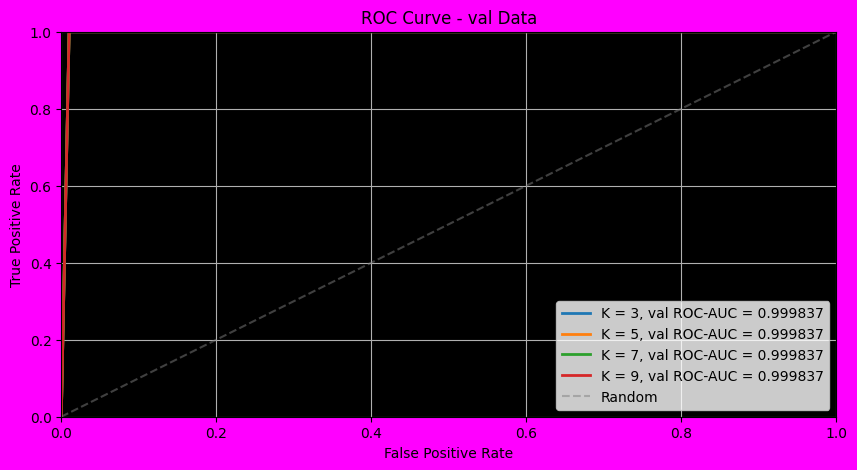

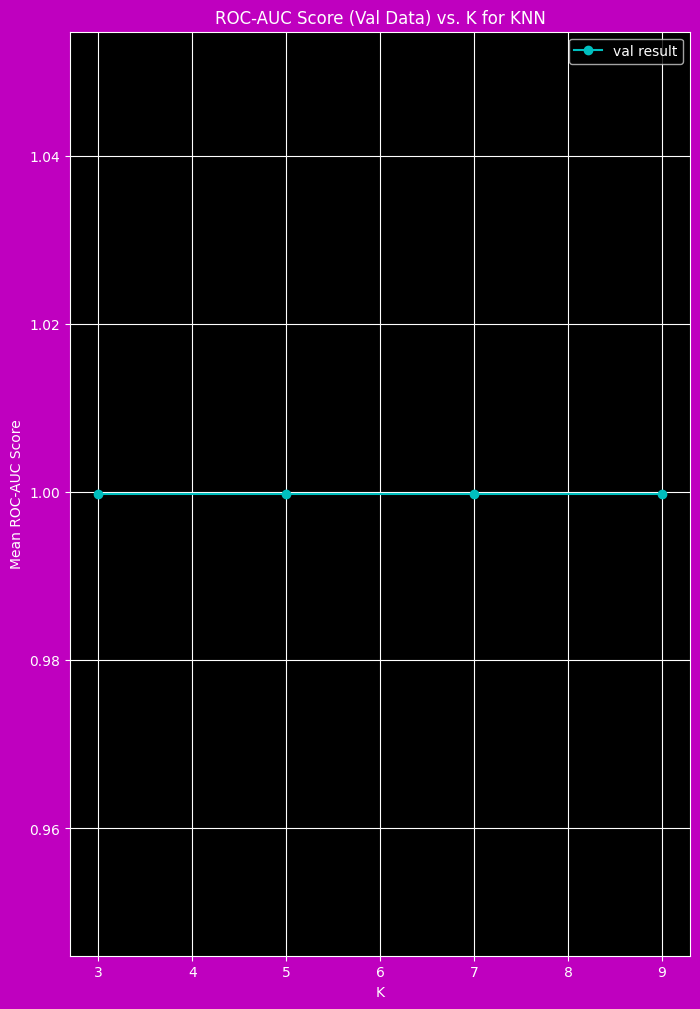





===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================
Mean ROC-AUC scores for val data for all values of K: 
 [0.9998373276002304, 0.9998373276002304, 0.9998373276002304, 0.9998373276002304]
Best K: 9
Best Mean ROC-AUC score for val data: 0.9884787455195051
------------------------------------------------------------------------------------------------------------
=======================================Hyperparameter Tuning over:==========================================
------------------------------------------------------------------------------------------------------------




In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Define your values of K (number of neighbors)
K_values = [3, 5, 7, 9]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of K
for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
    
    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        # y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt[train_index], y_ros_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)
        
        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores and mean false positive rates for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of k
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plot ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of K
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k) 
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

In [94]:
if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
print(best_k)

9


B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

Manhattan distance, also known as L1 distance, computes the distance between two points by summing the absolute differences of their coordinates. It's suitable for high-dimensional data where the features are of varying importance and the data is sparse. In other words, it's useful when the data has a lot of zeros or null values.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN parameters for Stratified K-fold cross-validation
params = {'n_neighbors': [9]}

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Time taken: 1406.85 seconds
Best ROC AUC score:  0.9998373276002304
Best hyperparameters:  {'n_neighbors': 9}


In [96]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Mean test scores:
{'n_neighbors': 9} 0.9998373276002304

Rank of each hyperparameter combination:
1 {'n_neighbors': 9}

Standard deviation of test scores:
{'n_neighbors': 9} 3.155119145309202e-05


#### 3. SVM Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        # y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt[train_index], y_ros_train_pt[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for the current value of C for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=======================================SVM Has Run Successfully:============================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)




print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

=============================================SVM Classifier:================================================
C = 0.1 Kernel = rbf
Train: [ 75936  75937  75938 ... 454899 454900 454901] val: [     0      1      2 ... 303265 303266 303267]


B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}


# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

Not computed due to very large training time

#### 4. Decision Tree

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_ros_train_pt, y_ros_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_ros_train_pt[train_index], X_ros_train_pt[val_index]
        y_train_cv, y_val_cv = y_ros_train_pt.iloc[train_index], y_ros_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.5, 0.6, 0.7],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_ros_train_pt, y_ros_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

### Observation

A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data

*LogisticRegression {'C': 4, 'penalty': 'l2'} =

Best Mean ROC-AUC score for val data: 0.9884840531068964 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.9812052138770543]

Mean precision val score for best C: 0.9719371184117677 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.885478588591554]

Mean recall val score for best C: 0.9294177647053652 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.6295975017349064]

Mean f1 val score for best C: 0.950201240931848 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.7341406860856002]

*KNeighborsClassifier {'n_neighbors': 9} =

0.9998373276002304 [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = 0.9274613536399045]

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

Not computed due to very large training time [Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =

Best Mean ROC-AUC score for val data: 0.9981460788751075 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9337472016466822]

Mean precision val score for best Max Depth: 0.9736125554386047 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8480952241800844]

Mean recall val score for best Max Depth: 0.9558410382895657 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.71578379211967]

Mean f1 val score for best Max Depth: 0.964631942249586 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.7752315571186218]

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

1.0 [Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = 0.9646808744238831]

*XGBClassifier {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} =

Best Mean ROC-AUC score for val data: 0.9999960678244962 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9848866713890976]

Mean precision val score for best Learning Rate: 0.9995517600748944 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9233400094242072]

Mean recall val score for best Learning Rate: 1.0 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.779204256303493]

Mean f1 val score for best Learning Rate: 0.9997758279719619 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8448234879500908]

Proceed with the model which shows the best result

Apply the best hyperparameter on the model
Predict on the test dataset

In [ ]:
X_test_saved.head()
y_test_saved.head()

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_test_saved_ros, y_test_saved_ros = ros.fit_resample(X_test_saved,y_test_saved)

In [ ]:
"""
The code appears to be initializing and training several classification models with best hyperparameters and 
then evaluating their performance using ROC-AUC score.

Each model is trained on the same training data (X_ros_train_pt and y_ros_train_pt) and 
then used to predict the probability of the target class (y) for the test data (X_test_pt). 
The predicted probabilities are then used to calculate the ROC-AUC score, which is a measure of the 
model's ability to distinguish between positive and negative samples.

The ROC-AUC score for each model is printed to the console.
"""

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf.fit(X_ros_train_pt, y_ros_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_ros_train_pt, y_ros_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time 
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time 
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved)
y_pred = clf.predict(X_test_saved)
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("F1 Score on Test Set =", f1)
print("Precision on Test Set =", preci_sion)
print("Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_ros_train_pt, y_ros_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_ros)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_ros, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_ros)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_ros, y_pred)
preci_sion = precision_score(y_test_saved_ros, y_pred)
re_call = recall_score(y_test_saved_ros, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set

*LogisticRegression {'C': 4, 'penalty': 'l2'} =

LogisticRegression ROC-AUC Score on Test Set = 0.9714047244524862 [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.9752271441778737]

LogisticRegression F1-Score on Test Set = 0.932017141909525 [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.5977011494252873]

LogisticRegression Precision on Test Set = 0.925193643972344 [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.4785276073619632]

LogisticRegression Recall on Test Set = 0.9389420371412492 [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.7959183673469388 ]

*KNeighborsClassifier {'n_neighbors': 9} =

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9398546705943079 [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9385655570613163]

KNeighbors Classifier F1-Score on Test Set = 0.9241250283468138 [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.824858757062147]

KNeighbors Classifier Precision on Test Set = 0.9986317595164189 [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9240506329113924]

KNeighbors Classifier Recall on Test Set = 0.8599641249296567 [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.7448979591836735]

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9701114653796241]

Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8121827411167513]

Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8080808080808081]

Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8163265306122449 ]

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9356105342166989 [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9314465304973987]

Decision Tree Classifier F1-Score on Test Set = 0.9189785371841284 [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8200000000000001]

Decision Tree Classifier Precision on Test Set = 0.929737415186365 [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.803921568627451]

Decision Tree Classifier Recall on Test Set = 0.9084658131682611 [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8367346938775511]

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

Random Forest Classifier ROC-AUC Score on Test Set = 0.9634288542372493 [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.9623530686894904]

Random Forest Classifier F1-Score on Test Set = 0.8258706467661691 [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8282828282828283]

Random Forest Classifier Precision on Test Set = 0.8058252427184466 [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.82]

Random Forest Classifier Recall on Test Set = 0.8469387755102041 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8367346938775511]

*XGBClassifier {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} =

XGBOOST Classifier ROC-AUC Score on Test Set = 0.977483446853241 [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9713649035866456]

XGBOOST Classifier F1-Score on Test Set = 0.9368538930690137 [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7962085308056872]

XGBOOST Classifier Precision on Test Set = 0.9888057514603317 [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7433628318584071]

XGBOOST Classifier Recall on Test Set = 0.8900886325267304 [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8571428571428571 ]

Based on ROC-AUC Scores-

KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.

LogisticRegression score decreased. But, the best model is XGBClassifier

Based on F1 Scores-

LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.

RandomForestClassifier score decreased. But, the best model is XGBClassifier

### Table of Scores

| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- |
| LogisticRegression | {'C': 4, 'penalty': 'l2'}	| 0.9714047245 | 0.9320171419 | 0.925193644 | 0.9389420371 |
| KNeighborsClassifier	| {'n_neighbors': 9}	| 0.9398546706 | 0.9241250283 | 0.9986317595 | 0.8599641249 |
| svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| NA | NA | NA | NA |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}	| 0.9356105342	| 0.9189785372 | 0.9297374152 | 0.9084658132 |
| RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.9634288542 | 0.8258706468 | 0.8058252427 | 0.8469387755 |
| XGBClassifier | {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7} | 0.9774834469 | 0.9368538931 | 0.9888057515 | 0.8900886325 |

####Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### II. SMOTE

Synthetic Minority Over-sampling Technique

Build different models on the balanced dataset and see the result

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# # perfom cross validation on the X_train & y_train 
# ALREADY DONE ABOVE
# from sklearn.model_selection import StratifiedKFold

# #perform cross validation
# skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

By setting a fixed random_state value, the SMOTE algorithm will use the same randomly generated numbers each time the code is run, which will produce the same synthetic samples for each minority class observation. This ensures that the training and validation process is consistent and can be repeated, which is important when developing and testing machine learning models.

Therefore, using random_state=0 in the SMOTE constructor helps ensure that the model performance will be consistent and reproducible when the code is re-run. However, it is important to note that changing the random seed will produce a different set of synthetic samples and may result in different performance metrics.

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using SMOTE
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

Print the class distribution after applying SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_smote_train_pt_1 = X_smote_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1.0)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_smote_train_pt_1[:X_train_pt_1.shape[0], 0], X_smote_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

SOME MORE VISUALIZATION

Check the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.

y_ros_train_pt is your target variable, we can use the following code to check the distribution of its values:

In [ ]:
print(y_smote_train_pt.value_counts())

In [ ]:
import seaborn as sns

sns.countplot(x=y_smote_train_pt)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_smote_train_pt[:,0])

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

Build models on other algorithms to see the better performing on SMOTE

#### 1. Logistic Regression

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for Logistic Regression classifier for val data
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for  and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 2. KNN Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Define your values of K (number of neighbors)
K_values = [3, 5, 7, 9]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of K
for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
    
    # Perform cro ss-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        # y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt[train_index], y_smote_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)
        
        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores and mean false positive rates for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of k
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plot ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of K
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k) 
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

Manhattan distance, also known as L1 distance, computes the distance between two points by summing the absolute differences of their coordinates. It's suitable for high-dimensional data where the features are of varying importance and the data is sparse. In other words, it's useful when the data has a lot of zeros or null values.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN parameters for Stratified K-fold cross-validation
params = {'n_neighbors': [9]}

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 3. SVM Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        # y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt[train_index], y_smote_train_pt[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for the current value of C for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=======================================SVM Has Run Successfully:============================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)




print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 4. Decision Tree

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [10, 50, 100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_smote_train_pt, y_smote_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_smote_train_pt[train_index], X_smote_train_pt[val_index]
        y_train_cv, y_val_cv = y_smote_train_pt.iloc[train_index], y_smote_train_pt.iloc[val_index]


        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_smote_train_pt, y_smote_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

### Observation

A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data

*LogisticRegression {'C': 4, 'penalty': 'l2'} =

Best Mean ROC-AUC score for val data: 0.99074791351665 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.9812052138770543]

Mean precision val score for best C: 0.9700892879660502 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.885478588591554]

Mean recall val score for best C: 0.9292199198948344 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.6295975017349064]

Mean f1 val score for best C: 0.9492131800549414 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.7341406860856002]

*KNeighborsClassifier {'n_neighbors': 9} =

0.9998373276002304 [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = 0.9274613536399045]

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

Not computed due to very large training time [Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =

Best Mean ROC-AUC score for val data: 0.9947661967283646 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9337472016466822]

Mean precision val score for best Max Depth: 0.9559803470320745 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8480952241800844]

Mean recall val score for best Max Depth: 0.956135607229689 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.71578379211967]

Mean f1 val score for best Max Depth: 0.9560475733357633 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.7752315571186218]

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

1.0 [Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = 0.9646808744238831]

*XGBClassifier {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =

Best Mean ROC-AUC score for val data: 0.9999932782930695 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9848866713890976]

Mean precision val score for best Learning Rate: 0.9985994214344757 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9233400094242072]

Mean recall val score for best Learning Rate: 0.9999648275892389 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.779204256303493]

Mean f1 val score for best Learning Rate: 0.9992816564080629 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8448234879500908]

Proceed with the model which shows the best result

Apply the best hyperparameter on the model
Predict on the test dataset

In [ ]:
X_test_saved.head()
y_test_saved.head()

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
# Define the RandomOverSampler
smote = over_sampling.SMOTE(random_state=0)

# Resample the training data using RandomOverSampler
X_test_saved_smote, y_test_saved_smote = smote.fit_resample(X_test_saved,y_test_saved)

In [ ]:
"""
The code appears to be initializing and training several classification models with best hyperparameters and 
then evaluating their performance using ROC-AUC score.

Each model is trained on the same training data (X_ros_train_pt and y_ros_train_pt) and 
then used to predict the probability of the target class (y) for the test data (X_test_pt). 
The predicted probabilities are then used to calculate the ROC-AUC score, which is a measure of the 
model's ability to distinguish between positive and negative samples.

The ROC-AUC score for each model is printed to the console.
"""

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)  
clf.fit(X_smote_train_pt, y_smote_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_smote_train_pt, y_smote_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time 
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time 
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved_smote)
y_pred = clf.predict(X_test_saved_smote)
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved_smote, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved_smote, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved_smote, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("F1 Score on Test Set =", f1)
print("Precision on Test Set =", preci_sion)
print("Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set

*LogisticRegression {'C': 4, 'penalty': 'l2'} =

LogisticRegression ROC-AUC Score on Test Set = 0.969831420233101 [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.9752271441778737]

LogisticRegression F1-Score on Test Set = 0.9210604136587401 [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.5977011494252873]

LogisticRegression Precision on Test Set = 0.9111856823266219 [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.4785276073619632]

LogisticRegression Recall on Test Set = 0.9311515194147439 [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.7959183673469388 ]

*KNeighborsClassifier {'n_neighbors': 9} =

KNeighbors Classifier ROC-AUC Score on Test Set = 0.9520626163291522 [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9385655570613163]

KNeighbors Classifier F1-Score on Test Set = 0.9379643836890316 [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.824858757062147]

KNeighbors Classifier Precision on Test Set = 0.995283298138975 [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9240506329113924]

KNeighbors Classifier Recall on Test Set = 0.8868880135059088 [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.7448979591836735]

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9701114653796241]

Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8121827411167513]

Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8080808080808081]

Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8163265306122449 ]

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} =

Decision Tree Classifier ROC-AUC Score on Test Set = 0.9484931498819542 [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9314465304973987]

Decision Tree Classifier F1-Score on Test Set = 0.9285663540778629 [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8200000000000001]

Decision Tree Classifier Precision on Test Set = 0.9378946613088404 [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.803921568627451]

Decision Tree Classifier Recall on Test Set = 0.9194217782779966 [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8367346938775511]

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

Random Forest Classifier ROC-AUC Score on Test Set = 0.9788061953689164 [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.9623530686894904]

Random Forest Classifier F1-Score on Test Set = 0.8770312160641301 [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8282828282828283]

Random Forest Classifier Precision on Test Set = 0.9997524195363493 [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.82]

Random Forest Classifier Recall on Test Set = 0.7811444850872257 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8367346938775511]

*XGBClassifier {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9921570289753232 [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9713649035866456]

XGBOOST Classifier F1-Score on Test Set = 0.9248408605806464 [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7962085308056872]

XGBOOST Classifier Precision on Test Set = 0.9988575625280509 [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7433628318584071]

XGBOOST Classifier Recall on Test Set = 0.8610368598761958 [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8571428571428571 ]

Based on ROC-AUC Scores-

KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.

LogisticRegression score decreased. But, the best model is XGBClassifier

Based on F1 Scores-

LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.

RandomForestClassifier score decreased. But, the best model is XGBClassifier

### Table of Scores

| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- |
| LogisticRegression | {'C': 4, 'penalty': 'l2'}	| 0.9698314202 | 0.9210604137 | 0.9111856823 | 0.9311515194 |
| KNeighborsClassifier	| {'metric': 'manhattan', 'n_neighbors': 9}	| 0.9520626163 | 0.9379643837 | 0.9952832981 | 0.8868880135 |
| svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| NA | NA | NA | NA |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	| 0.9484931499	| 0.9285663541 | 0.9378946613 | 0.9194217783 |
| RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.9788061954 | 0.8770312161 | 0.9997524195 | 0.7811444851 |
| XGBClassifier | {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} | 0.992157029 | 0.9248408606 | 0.9988575625 | 0.8610368599 |

####Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### III. ADASYN

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

In [ ]:
# # perfom cross validation on the X_train & y_train 
# ALREADY DONE ABOVE
# from sklearn.model_selection import StratifiedKFold

# #perform cross validation
# skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
# Define the ADASYN
ada = over_sampling.ADASYN(random_state=0)

# Resample the training data using ADASYN
X_adasyn_train_pt, y_adasyn_train_pt = ada.fit_resample(X_train_pt, y_train_pt)

Print the class distribution after applying ADASYN

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# from imblearn import over_sampling

# ada = over_sampling.ADASYN(random_state=0)
# X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# # Artificial minority samples and corresponding minority labels from ADASYN are appended
# # below X_train and y_train respectively
# # So to exclusively get the artificial minority samples from ADASYN, we do
# X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 20]
# fig = plt.figure()

# plt.subplot(3, 1, 1)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
#             label='Artificial ADASYN Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
# plt.legend()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Artificial minority samples and corresponding minority labels from adasyn are appended
# below X_train_pt and y_train_pt respectively
# So to exclusively get the artificial minority samples from adasyn, we do
X_adasyn_train_pt_1 = X_adasyn_train_pt[X_train_pt.shape[0]:]

X_train_pt_1 = np.array(X_train_pt)[np.where(y_train_pt==1)]
X_train_pt_0 = np.array(X_train_pt)[np.where(y_train_pt==0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 0], X_adasyn_train_pt_1[:X_train_pt_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_pt_1[:, 0], X_train_pt_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], 0], X_train_pt_0[:X_train_pt_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

SOME MORE VISUALIZATION

Check the distribution of your target variable: We use value_counts() method to check the distribution of your target variable.

y_ros_train_pt is your target variable, we can use the following code to check the distribution of its values:

In [ ]:
print(y_adasyn_train_pt.value_counts())

In [ ]:
import seaborn as sns

sns.countplot(x=y_adasyn_train_pt)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_adasyn_train_pt[:,0])

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

Build models on other algorithms to see the better performing on ADASYN

#### 1. Logistic Regression

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import time

print("============================================================================================================")

print("======================================Logistic Regression Classifier:=======================================")

# Define your values of C
C_values = [0.1, 0.5, 1, 2, 4]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Penalty = L2")
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2', C=c)
        logreg_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = logreg_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)

    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='C = ' + str(c) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)))


print("================================Logistic Regression Has Run Successfully:===================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for Logistic Regression classifier for val data
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. C for Logistic Regression with L2 Penalty')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for  and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best C", mean_precision_scores_val[best_index])
print("Mean recall val score for best C", mean_recall_scores_val[best_index])
print("Mean f1 val score for best C", mean_f1_scores_val[best_index])


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")


print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import time

# Define the logistic regression parameters for Stratified K-fold cross-validation
# params = {"C": [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']}
params = {"C": [0.01, 0.1, 0.5, 1, 2, 4], 'penalty': ['l1', 'l2']}

# Define the logistic regression classifier
logreg_classifier = linear_model.LogisticRegression()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(logreg_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 2. KNN Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from scipy import interp
import time

print("==========================================================================================================")

print("============================================KNN Classifier:===============================================")

# Define your values of K (number of neighbors)
K_values = [3, 5, 7, 9]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of K
for k in K_values:
    print("K =", k)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
    
    # Perform cro ss-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        # y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_cv, y_train_cv)
        
        y_val_pred = knn_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores and mean false positive rates for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_fpr_val = mean_fpr

    print("Mean ROC-AUC for val data:", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of k
    ax2.plot(mean_fpr_val, mean_tpr_val, linestyle='-', lw=2, label='K = ' + str(k) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 6)).format(k))


print("=================================KNN Classifier Has Run Successfully:=======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")

# Plot ROC curves of KNN Classifier for val data

ax2.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random', alpha=0.5)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc='lower right')
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(K_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('K')
    plt.ylabel('Mean ROC-AUC Score')
    plt.title('ROC-AUC Score (Val Data) vs. K for KNN')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of K
print("Mean ROC-AUC scores for val data for all values of K: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if np.unique(mean_roc_auc_scores_val).size:
    best_k = K_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_k = K_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best K:", best_k) 
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the KNN parameters for Stratified K-fold cross-validation
params = {'n_neighbors': [9]}

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(knn_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 3. SVM Classifier

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("=============================================SVM Classifier:================================================")

# Define your values of C
C_values = [0.1, 1, 2]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for train and val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of C
for c in C_values:
    print("C =", c, "Kernel = rbf")
    cv_scores_val = []
    fprs_val = []
    tprs_val = []

    # Perform cro ss-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        # y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        svm_classifier = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = svm_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curves for the current value of C for val data
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='C = {}, val ROC-AUC = {:.4f}'.format(c, mean_roc_auc_val))

print("=======================================SVM Has Run Successfully:============================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Set plot properties for val data
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve - val Data', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(C_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('C')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. C for SVM')
    plt.legend(['train result', 'val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for train and val data for all values of C
print("Mean ROC-AUC scores for val data for all values of C: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_c = C_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best C:", best_c)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)




print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn import svm

params = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Define the SVM classifier
svm_classifier = svm.SVC()

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(svm_classifier,
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose=1,
                        # pre_dispatch=6, # prevents explosion of consumption of memory
                        return_train_score=True) 

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 4. Decision Tree

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp

print("============================================================================================================")

print("==============================================Decision Tree:================================================")


# Define your values of max_depth
max_depth_values = [1, 2, 3, 4, 5]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2= plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of max_depth
for max_depth in max_depth_values:
    print("Max Depth =", max_depth)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []


    # Perform cro ss-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        # y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt[train_index], y_adasyn_train_pt[val_index]

        # Create a decision tree classifier with the specified max_depth value
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
        dt_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = dt_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)
        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='Max Depth = ' + str(max_depth) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("==================================Decision Tree Has Run Successfully:======================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(max_depth_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('Max Depth')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. Max Depth')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of Max Depth
print("Mean ROC-AUC scores for val data for all values of Max Depth: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_max_depth = max_depth_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Max Depth:", best_max_depth)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Max Depth:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Max Depth:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Max Depth:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {'max_depth': [6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(dt_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 5. Random Forest

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

print("============================================================================================================")

print("================================================Random Forest:==============================================")

# Define your values of n_estimators
n_values = [100, 200, 400]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia')  # Set facecolor to black for dark background
ax2.set_facecolor('black')

# Loop through each value of n_estimators
for n in n_values:
    print("n_estimators =", n)
    cv_scores_val = []
    fprs_val = []
    tprs_val = []
        
    # Perform cross-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        rf_classifier = RandomForestClassifier(n_estimators=n)
        rf_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = rf_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)

        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")

    # Calculate mean ROC-AUC scores for val data
    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of n_estimators
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), linestyle='-', lw=2, label='n_estimators = ' + str(n) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 10)))


print("=================================Random Forest Has Run Successfully:========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs n_estimators
    plt.plot(n_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('n Estimators')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. n_estimators for Random Forest')
    # plt.xscale('log')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of n Estimators
print("Mean ROC-AUC scores for val data for all values of n Estimators: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
if 1 in np.unique(mean_roc_auc_scores_val):
    best_n_estimators = n_values[-1]
else:
    best_index = np.argmax(mean_roc_auc_scores_val)
    best_n_estimators = n_values[best_index]
    best_mean_roc_auc = mean_roc_auc_scores_val[best_index]


print("Best n Estimators:", best_n_estimators)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)


print("------------------------------------------------------------------------------------------------------------")
print("=======================================Hyperparameter Tuning over:==========================================")
print("------------------------------------------------------------------------------------------------------------")

print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameters to be tuned
params = {
    "n_estimators": [500],
    "min_samples_split": [5, 7]
    }
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

start_time = time.time()

# Create a GridSearchCV object with stratified cross-validation
start_time = time.time()
model_GridSearch = GridSearchCV(rf_classifier,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = skf, 
                        n_jobs=-1, # using 100% of CPU
                        verbose = 1,
                        return_train_score=True) 
 
# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_) 

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

#### 6. XGBoost

A. Finidng a suitable range for a Single Hyperparameters for narrowing the range of parameters using visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
import xgboost as xgb

print("============================================================================================================")

print("============================================XGBoost Classifier:=============================================")


# Define your values of C
learning_rate_values = [0.001, 0.01, 0.1, 0.5, 1]

# Initialize lists to store mean ROC-AUC scores and mean false positive rates for val data
mean_roc_auc_scores_val = []
mean_precision_scores_val = []
mean_recall_scores_val = []
mean_f1_scores_val = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax2 = plt.subplots(figsize=(14, 7), facecolor='fuchsia')  # Set facecolor to black for dark background
# Set background color for subplots
ax2.set_facecolor('black')

# Loop through each value of C
for learning_rate in learning_rate_values:
    print("Learning Rate =", learning_rate)
    cv_scores_val = []
    precision_val = []
    recall_val = []
    f1_val = []
    fprs_val = []
    tprs_val = []

    # Perform cross-validation
    for train_index, val_index in skf.split(X_adasyn_train_pt, y_adasyn_train_pt):
        start_time = time.time()
        print("Train:", train_index, "val:", val_index)
        X_train_cv, X_val_cv = X_adasyn_train_pt[train_index], X_adasyn_train_pt[val_index]
        y_train_cv, y_val_cv = y_adasyn_train_pt.iloc[train_index], y_adasyn_train_pt.iloc[val_index]

        xgb_classifier = xgb.XGBClassifier(learning_rate = learning_rate, n_estimators=100, max_depth=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', reg_alpha=0.005, reg_lambda=1, random_state=42)
        xgb_classifier.fit(X_train_cv, y_train_cv)

        y_val_pred = xgb_classifier.predict_proba(X_val_cv)
        val_score = roc_auc_score(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        cv_scores_val.append(val_score)

        y_val_pred_binary = (y_val_pred[:, 1] >= 0.5).astype(int)

        precision_val.append(precision_score(y_val_cv, y_val_pred_binary))
        recall_val.append(recall_score(y_val_cv, y_val_pred_binary))
        f1_val.append(f1_score(y_val_cv, y_val_pred_binary))

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_cv, y_score=y_val_pred[:, 1])
        tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0
        fprs_val.append(fpr_val)
        elapsed_time = time.time() - start_time
        print("Time elapsed:", elapsed_time, "seconds")
        
    # Calculate mean ROC-AUC scores for val data

    mean_roc_auc_val = np.mean(cv_scores_val)
    mean_roc_auc_scores_val.append(mean_roc_auc_val)

    mean_precision_val = np.mean(precision_val)
    mean_precision_scores_val.append(mean_precision_val)

    mean_recall_val = np.mean(recall_val)
    mean_recall_scores_val .append(mean_recall_val)

    mean_f1_val = np.mean(f1_val)
    mean_f1_scores_val.append(mean_f1_val)

    print("ROC-AUC Score for val data =", mean_roc_auc_val)
    print("Mean precision val score:", mean_precision_val)
    print("Mean recall val score:", mean_recall_val)
    print("Mean f1 val score:", mean_f1_val)
    print("------------------------------------------------------------------------------------------------------------")

    # Plot ROC curve for the current value of C
    ax2.plot(mean_fpr, np.mean(tprs_val, axis=0), label='Learning Rate = ' + str(learning_rate) + ', val ROC-AUC = ' + str(round(mean_roc_auc_val, 4)))


print("=====================================XGBoost Has Run Successfully:==========================================")

print("------------------------------------------------------------------------------------------------------------")
print("\n")
print("======================================Plotting the ROC AUC Curve:===========================================")
print("\n")

# Plot ROC curve for random classifier
ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random', alpha=0.5)

# Set labels and title for ROC curves
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - val Data')
ax2.legend(loc="lower right")
ax2.grid(True)  # Add grid to the plot

# Show the plot
plt.show()

print("============================================================================================================")

# Set plot style and figure size
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')

    # Plot ROC-AUC scores vs C
    plt.plot(learning_rate_values, mean_roc_auc_scores_val, 'co-')
    plt.xlabel('learning_rate')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC Score vs. learning_rate_values for XGBoost')
    plt.legend(['val result'], loc='upper right')
    plt.grid()

    plt.show()

print("\n")
print("============================================================================================================")
print("\n")

print("===========================Best Mean ROC-AUC scores and Best hyperparameters:===============================")

# Print mean ROC-AUC scores for val data for all values of learning_rate_values
print("Mean ROC-AUC scores for val data for all values of Learning Rate: \n", mean_roc_auc_scores_val)

# Find the index of maximum mean ROC-AUC score for val data
best_index = np.argmax(mean_roc_auc_scores_val)
best_learning_rate = learning_rate_values[best_index]
best_mean_roc_auc = mean_roc_auc_scores_val[best_index]

print("Best Learning Rate :", best_learning_rate)
print("Best Mean ROC-AUC score for val data:", best_mean_roc_auc)
print("Mean precision val score for best Learning Rate:", mean_precision_scores_val[best_index])
print("Mean recall val score for best Learning Rate:", mean_recall_scores_val[best_index])
print("Mean f1 val score for best Learning Rate:", mean_f1_scores_val[best_index])


print("============================================================================================================")
print("\n")
print("============================================================================================================")

B. Multiple Hyperparameter tuning (GridSearchCV) + Best Model ROC_AUC Score

In [ ]:
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {
    'learning_rate': [0.8, 1, 1.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9],
}

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc') # As the number of classes are 2

start_time = time.time()

# Create a GridSearchCV object with stratified Cross validation
model_GridSearch = GridSearchCV(xgb_classifier, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1, 
                        verbose=1, 
                        return_train_score=True)

# Fit the GridSearchCV object and perform hyperparameter tuning on the resampled data
model_GridSearch.fit(X_adasyn_train_pt, y_adasyn_train_pt)

end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

# print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_GridSearch.best_score_)

# print the optimum value of hyperparameters
print('Best hyperparameters: ', model_GridSearch.best_params_)

In [ ]:
cv_results = model_GridSearch.cv_results_

# Print the mean test scores for each hyperparameter combination
print("Mean test scores:")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

# Print the rank of each hyperparameter combination based on mean test score
print("\nRank of each hyperparameter combination:")
for rank, params in enumerate(cv_results["params"]):
    print(rank+1, params)

# Print the standard deviation of test scores for each hyperparameter combination
print("\nStandard deviation of test scores:")
for std_score, params in zip(cv_results["std_test_score"], cv_results["params"]):
    print(params, std_score)

### Observation

A. CROSS VALIDATION -  ROC-AUC Score of the models and best hyperparameters on Imbalanced data

*LogisticRegression {'C': 4, 'penalty': 'l2'} =

Best Mean ROC-AUC score for val data: 0.9600512812300878 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.9812052138770543]

Mean precision val score for best C: 0.9103281184583857 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.885478588591554]

Mean recall val score for best C: 0.8684424127160906 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.6295975017349064]

Mean f1 val score for best C: 0.8884981922559546 [Before Oversampling {'C': 0.01, 'penalty': 'l2'} = 0.7341406860856002]

*KNeighborsClassifier {'n_neighbors': 9} =

0.9860334294397143 [Before Oversampling {'metric': 'manhattan', 'n_neighbors': 9} = 0.9274613536399045]

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

Not computed due to very large training time [Before Oversampling {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9565173998635063]

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =

Best Mean ROC-AUC score for val data: 0.9387163825214735 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9337472016466822]

Mean precision val score for best Max Depth: 0.908528931388625 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8480952241800844]

Mean recall val score for best Max Depth: 0.8673782646963896 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.71578379211967]

Mean f1 val score for best Max Depth: 0.8871749175083493 [Before Oversampling {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.7752315571186218]

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

0.9961281862850145 [Before Oversampling {'min_samples_split': 5, 'n_estimators': 500} = 0.9646808744238831]

*XGBClassifier {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =

Best Mean ROC-AUC score for val data: 0.9979584458494518 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9848866713890976]

Mean precision val score for best Learning Rate: 0.9984003044486842 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9233400094242072]

Mean recall val score for best Learning Rate: 0.8774460593069945 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.779204256303493]

Mean f1 val score for best Learning Rate: 0.933889867542906 [Before Oversampling {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8448234879500908]

Select the oversampling method which shows the best result on a model

Apply the best hyperparameter on the model
Predict on the test dataset

In [ ]:
# # perform the best oversampling method on X_train & y_train

# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit( ) # fit on the balanced dataset
# print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

In [ ]:
X_test_saved.head()
y_test_saved.head()

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Transforming the test data
X_test_saved[["Amount"]] = scaler.fit_transform(X_test_saved[["Amount"]])

In [ ]:
X_test_saved.head()

In [ ]:
# Define the ADASYN
ada = over_sampling.ADASYN(random_state=0)

# Resample the training data using ADASYN
X_test_saved_adasyn, y_test_saved_adasyn = ada.fit_resample(X_test_saved,y_test_saved)

In [ ]:
"""
The code appears to be initializing and training several classification models with best hyperparameters and 
then evaluating their performance using ROC-AUC score.

Each model is trained on the same training data (X_ros_train_pt and y_ros_train_pt) and 
then used to predict the probability of the target class (y) for the test data (X_test_pt). 
The predicted probabilities are then used to calculate the ROC-AUC score, which is a measure of the 
model's ability to distinguish between positive and negative samples.

The ROC-AUC score for each model is printed to the console.
"""

from sklearn.metrics import f1_score, precision_score, recall_score

print("============================================================================================================")
print("\n")

# initialise the model with optimum hyperparameters
start_time = time.time()
clf = linear_model.LogisticRegression(penalty='l2', C=4)  
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)

# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=9)  
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 4, min_samples_split = 2)   
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
import time
clf = svm.SVC(probability=True, C=0.01, gamma='auto', kernel='rbf')

start_time = time.time()
try:
    clf.fit(X_smote_train_pt, y_smote_train_pt)
except TimeoutError:
    print("============================================================================================================")

    print(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time 
    ============================================================================================================
    """)
end_time = time.time()

elapsed_time = end_time - start_time
if elapsed_time > 50000:
    raise TimeoutError(f"""
    SVM Classifier ROC-AUC Score on Test Set = Not computed due to very large training time 
    ============================================================================================================
    """)

y_pred_proba = clf.predict_proba(X_test_saved_smote)
y_pred = clf.predict(X_test_saved_smote)
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:,1])
f1 = f1_score(y_true=y_test_saved_smote, y_pred=y_pred)
preci_sion = precision_score(y_true=y_test_saved_smote, y_pred=y_pred)
re_call = recall_score(y_true=y_test_saved_smote, y_pred=y_pred)
print("SVM Classifier ROC-AUC Score on Test Set =", roc_auc)
print("F1 Score on Test Set =", f1)
print("Precision on Test Set =", preci_sion)
print("Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

In [ ]:
# initialise the model with optimum hyperparameters
start_time = time.time()
clf = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf.fit(X_adasyn_train_pt, y_adasyn_train_pt)
# predict on test set to give probability
y_pred_proba = clf.predict_proba(X_test_saved_adasyn)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_adasyn, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf.predict(X_test_saved_adasyn)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_adasyn, y_pred)
preci_sion = precision_score(y_test_saved_adasyn, y_pred)
re_call = recall_score(y_test_saved_adasyn, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

B. TEST SET - Metrics & Scores using best model and hyperparameters on Test Set

*LogisticRegression {'C': 4, 'penalty': 'l2'} =

LogisticRegression ROC-AUC Score on Test Set = 0.9173743861170938 [LogisticRegression ROC-AUC Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.9752271441778737]

LogisticRegression F1-Score on Test Set = 0.8375936925470231 [LogisticRegression F1-Score on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.5977011494252873]

LogisticRegression Precision on Test Set = 0.8420444649807176 [LogisticRegression Precision on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.4785276073619632]

LogisticRegression Recall on Test Set = 0.8331897233896636 [LogisticRegression Recall on Test Set {'C': 0.01, 'penalty': 'l2'} = 0.7959183673469388 ]

*KNeighborsClassifier {'n_neighbors': 9} =

KNeighbors Classifier ROC-AUC Score on Test Set = 0.8685620474989183 [KNeighbors Classifier ROC-AUC Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9385655570613163]

KNeighbors Classifier F1-Score on Test Set = 0.823434809950413 [KNeighbors Classifier F1-Score on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.824858757062147]

KNeighbors Classifier Precision on Test Set = 0.9950914436637265 [KNeighbors Classifier Precision on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.9240506329113924]

KNeighbors Classifier Recall on Test Set = 0.7022877943271142 [KNeighbors Classifier Recall on Test Set {'metric': 'manhattan', 'n_neighbors': 9} = 0.7448979591836735]

*svm.SVC {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} =

Not computed due to very large training time [SVM Classifier ROC-AUC Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.9701114653796241]

Not computed due to very large training time [SVM Classifier F1 Score on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8121827411167513]

Not computed due to very large training time [SVM Classifier Precision on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8080808080808081]

Not computed due to very large training time [SVM Classifier Recall on Test Set {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True} = 0.8163265306122449 ]

*DecisionTreeClassifier {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} =

Decision Tree Classifier ROC-AUC Score on Test Set = 0.8812439127343993 [Decision Tree Classifier ROC-AUC Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.9314465304973987]

Decision Tree Classifier F1-Score on Test Set = 0.8003628524887584 [Decision Tree Classifier F1-Score on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8200000000000001]

Decision Tree Classifier Precision on Test Set = 0.8986507206378411 [Decision Tree Classifier Precision on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.803921568627451]

Decision Tree Classifier Recall on Test Set = 0.721455325584258 [Decision Tree Classifier Recall on Test Set {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} = 0.8367346938775511]

*RandomForestClassifier {'min_samples_split': 5, 'n_estimators': 500} =

Random Forest Classifier ROC-AUC Score on Test Set = 0.9634288542372493 [Random Forest Classifier ROC-AUC Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.9623530686894904]

Random Forest Classifier F1-Score on Test Set = 0.8258706467661691 [Random Forest Classifier F1-Score on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8282828282828283]

Random Forest Classifier Precision on Test Set = 0.8058252427184466 [Random Forest Classifier Precision on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.82]

Random Forest Classifier Recall on Test Set = 0.8469387755102041 [Random Forest Classifier Recall on Test Set {'min_samples_split': 5, 'n_estimators': 500} = 0.8367346938775511]

*XGBClassifier {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} =

XGBOOST Classifier ROC-AUC Score on Test Set = 0.9679589101349129 [XGBOOST Classifier ROC-AUC Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.9713649035866456]

XGBOOST Classifier F1-Score on Test Set = 0.7803322202243343 [XGBOOST Classifier F1-Score on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7962085308056872]

XGBOOST Classifier Precision on Test Set = 0.9969643101326405 [XGBOOST Classifier Precision on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.7433628318584071]

XGBOOST Classifier Recall on Test Set = 0.6410396187595618 [XGBOOST Classifier Recall on Test Set {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5} = 0.8571428571428571 ]

Based on ROC-AUC Scores-

KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier & XGBClassifier models scores increase after Oversampling.

LogisticRegression score decreased. But, the best model is XGBClassifier

Based on F1 Scores-

LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier & XGBClassifier models scores increase after Oversampling.

RandomForestClassifier score decreased. But, the best model is XGBClassifier

### Table of Scores

| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- |
| LogisticRegression | {'C': 4, 'penalty': 'l2'}	| 0.9173743861 | 0.8375936925 | 0.842044465 | 0.8331897234 |
| KNeighborsClassifier	| {'n_neighbors': 9}	| 0.8685620475 | 0.82343481 | 0.9950914437 | 0.7022877943 |
| svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| NA | NA | NA | NA |
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}	| 0.8812439127	| 0.8003628525 | 0.8986507206 | 0.7214553256 |
| RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.9634288542 | 0.8258706468 | 0.8058252427 | 0.8469387755 |
| XGBClassifier | {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} | 0.9679589101 | 0.7803322202 | 0.9969643101 | 0.6410396188 |

1. Model sensitivity: Some models may be more sensitive to the effects of oversampling than others. 
For example, decision trees may be less affected by oversampling than linear models.

2. Overfitting: The oversampled data may introduce too much noise and overfit the model to the training data. 
This can result in poor generalization performance on new, unseen data.

Print the important features of the best model to understand the dataset

This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
clf.feature_importances_

In [ ]:
np.sort(clf.feature_importances_)

In [ ]:
"""
This code is related to machine learning, specifically to a classification problem.

Firstly, it seems that the code calculates the feature importances for a classifier, stored in the variable clf. The feature importances are a way to assess the relevance of each feature in the prediction made by the classifier. The code appends the values of the feature importances to a list named var_imp.

Then, the code identifies the indices of the top three features based on their importances. This is done by sorting the feature importances and using the index() function to find the position of each of the top three importances in the var_imp list. The indices are printed to the console with a message indicating their ranking.
After that, the code selects the top two features based on their indices, stored in top_var_index and second_top_var_index. It then creates two NumPy arrays, X_train_pt_1 and X_train_pt_0, containing the input features for the training examples with target values of 1 and 0, respectively.
Next, it shuffles the array X_train_pt_0 randomly to make the training set more diverse.
Finally, the code creates a scatter plot using the plt.scatter() function from the matplotlib library. The plot displays the examples from the training set with target values of 1 and 0, using the two selected features for the x and y axes. The examples from class 1 are plotted in a different color than those from class 0, and a legend is added to the plot. The size of the plot is adjusted using the plt.rcParams function.
"""

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# X_train_pt_1 = X_train_pt.to_numpy()[np.where(y_train_pt==1.0)]
# X_train_pt_0 = X_train_pt.to_numpy()[np.where(y_train_pt==0.0)]
X_train_pt_1 = X_train_pt[y_train_pt == 1.0]
X_train_pt_0 = X_train_pt[y_train_pt == 0.0]

np.random.shuffle(X_train_pt_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_pt_1[:, top_var_index], X_train_pt_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_pt_0[:X_train_pt_1.shape[0], top_var_index], X_train_pt_0[:X_train_pt_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Model For each Type of OverSampling

## 1. LogisticRegression

| Type of OverSampling	| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- | :- |
| None	| LogisticRegression | {'C': 0.01, 'penalty': 'l2'}	| 0.9752271442 | 0.5977011494 | 0.4785276074 | 0.7959183673 |
| ROS	| LogisticRegression	| {'C': 4, 'penalty': 'l2'}	| 0.9714047245 | 0.9320171419 | 0.925193644 | 0.9389420371 |
| SMOTE | LogisticRegression | {'C': 4, 'penalty': 'l2'}	| 0.9698314202 | 0.9210604137 | 0.9111856823 | 0.9311515194 |
| ADASYN | LogisticRegression | {'C': 4, 'penalty': 'l2'}	| 0.9173743861 | 0.8375936925 | 0.842044465 | 0.8331897234 |

## 2. KNeighborsClassifier

| Type of OverSampling	| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- | :- |
| None	| KNeighborsClassifier | {'metric': 'manhattan', 'n_neighbors': 9}	| 0.9385655571 | 0.8248587571 | 0.9240506329 | 0.7448979592 |
| ROS	| KNeighborsClassifier	| {'n_neighbors': 9}	| 0.9398546706 | 0.9241250283 | 0.9986317595 | 0.8599641249 |
| SMOTE | KNeighborsClassifier | {'metric': 'manhattan', 'n_neighbors': 9}	| 0.9520626163 | 0.9379643837 | 0.9952832981 | 0.8868880135 |
| ADASYN | KNeighborsClassifier | {'n_neighbors': 9}	| 0.8685620475 | 0.82343481 | 0.9950914437 | 0.7022877943 |

## 3. svm.SVC

| Type of OverSampling	| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- | :- |
| None	| svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| 0.9701114654 | 0.8121827411 | 0.8080808081 | 0.8163265306 |
| ROS	| svm.SVC	| {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| NA | NA | NA | NA |
| SMOTE | svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| NA | NA | NA | NA |
| ADASYN | svm.SVC | {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}	| NA | NA | NA | NA |

## 4. DecisionTreeClassifier

| Type of OverSampling	| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- | :- |
| None	| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	| 0.9484931499 | 0.9285663541 | 0.9378946613 | 0.9194217783 |
| ROS	| DecisionTreeClassifier	| {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}	| 0.9356105342 | 0.9189785372 | 0.9297374152 | 0.9084658132 |
| SMOTE | DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}	| 0.9484931499 | 0.9285663541 | 0.9378946613 | 0.9194217783 |
| ADASYN | DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}	| 0.8812439127 | 0.8003628525 | 0.8986507206 | 0.7214553256 |

## 5. RandomForestClassifier

| Type of OverSampling	| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- | :- |
| None	| 	RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.9623530686894904 | 0.8282828283 | 0.82 | 0.8367346939 |
| ROS	| 	RandomForestClassifier	| {'min_samples_split': 5, 'n_estimators': 500}	| 0.9634288542372493 | 0.8258706468 | 0.8058252427 | 0.8469387755 |
| SMOTE | 	RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.9788061953689164 | 0.8258706468 | 0.8058252427 | 0.8469387755 |
| ADASYN | 	RandomForestClassifier | {'min_samples_split': 5, 'n_estimators': 500}	| 0.9634288542372493 | 0.8258706468 | 0.8058252427 | 0.8469387755 |

## 6. XGBClassifier

| Type of OverSampling	| Model | Parameter	| ROC-AUC Score	| F1-Score	| Precision | Recall |
| :- | :- | :- | :- | :- | :- | :- |
| None	| 	XGBClassifier | {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}	| 0.9713649036 | 0.7962085308 | 0.7433628319 | 0.8571428571 |
| ROS	| 	XGBClassifier	| {'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.7}	| 0.9774834469 | 0.9368538931 | 0.9888057515 | 0.8900886325 |
| SMOTE | 	XGBClassifier | {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}	| 0.992157029 | 0.9248408606 | 0.9988575625 | 0.8610368599 |
| ADASYN | 	XGBClassifier | {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9}	| 0.9679589101 | 0.7803322202 | 0.9969643101 | 0.6410396188 |

Select the oversampling method which shows the best result on a model

Use the best models to Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

from sklearn.metrics import f1_score, precision_score, recall_score


print("============================================================================================================")
print("\n")

# LogisticRegression 

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_LogisticRegression = linear_model.LogisticRegression(penalty='l2', C=0.01)  
clf_LogisticRegression.fit(X_train_pt, y_train_pt)

# predict on test set to give probability
y_pred_proba = clf_LogisticRegression.predict_proba(X_test_saved)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved, y_score=y_pred_proba[:, 1])
print("LogisticRegression ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_LogisticRegression.predict(X_test_saved)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved, y_pred)
preci_sion = precision_score(y_test_saved, y_pred)
re_call = recall_score(y_test_saved, y_pred)
# print the results
print("LogisticRegression F1-Score on Test Set =", f1)
print("LogisticRegression Precision on Test Set =", preci_sion)
print("LogisticRegression Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))


print("============================================================================================================")

In [ ]:
# KNeighborsClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_KNeighborsClassifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  
clf_KNeighborsClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_KNeighborsClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("KNeighbors Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_KNeighborsClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("KNeighbors Classifier F1-Score on Test Set =", f1)
print("KNeighbors Classifier Precision on Test Set =", preci_sion)
print("KNeighbors Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# DecisionTreeClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_DecisionTreeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)   
clf_DecisionTreeClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_DecisionTreeClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Decision Tree Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_DecisionTreeClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Decision Tree Classifier F1-Score on Test Set =", f1)
print("Decision Tree Classifier Precision on Test Set =", preci_sion)
print("Decision Tree Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

In [ ]:
# XGBClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_XGBClassifier = XGBClassifier(learning_rate=0.8, max_depth=5, subsample=0.9, objective='binary:logistic', eval_metric='auc') 
clf_XGBClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_XGBClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("XGBOOST Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_XGBClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("XGBOOST Classifier F1-Score on Test Set =", f1)
print("XGBOOST Classifier Precision on Test Set =", preci_sion)
print("XGBOOST Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))
print("============================================================================================================")

In [ ]:
# RandomForestClassifier

# initialise the model with optimum hyperparameters
start_time = time.time()
clf_RandomForestClassifier = RandomForestClassifier(min_samples_split=5, n_estimators=500)  
clf_RandomForestClassifier.fit(X_smote_train_pt, y_smote_train_pt)
# predict on test set to give probability
y_pred_proba = clf_RandomForestClassifier.predict_proba(X_test_saved_smote)
# calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true=y_test_saved_smote, y_score=y_pred_proba[:, 1])
print("Random Forest Classifier ROC-AUC Score on Test Set =", roc_auc)
# predict on test set to get the class labels
y_pred = clf_RandomForestClassifier.predict(X_test_saved_smote)
# calculate the F1-score, precision, and recall
f1 = f1_score(y_test_saved_smote, y_pred)
preci_sion = precision_score(y_test_saved_smote, y_pred)
re_call = recall_score(y_test_saved_smote, y_pred)
# print the results
print("Random Forest Classifier F1-Score on Test Set =", f1)
print("Random Forest Classifier Precision on Test Set =", preci_sion)
print("Random Forest Classifier Recall on Test Set =", re_call)
end_time = time.time()
print("Time taken: {:.2f} seconds".format(end_time - start_time))

print("============================================================================================================")

# Best Oversampling Technique and Hyper Parameter for Each model

Best LogisticRegression Model Performance: 0.9752271442 {'C': 0.01, 'penalty': 'l2'} [None]

Best KNeighborsClassifier Model Performance: 0.9520626163 {'metric': 'manhattan', 'n_neighbors': 9} [SMOTE]

Best svm.SVC Model Performance: NA [Due to High Training Time]

Best DecisionTreeClassifier Model Performance: 0.9484931499 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} [SMOTE]

Best RandomForestClassifier Model Performance: 0.9788061953689164 {'min_samples_split': 5, 'n_estimators': 500} [SMOTE]

Best XGBClassifier Model Performance: 0.9921570289753232 {'learning_rate': 0.8, 'max_depth': 5, 'subsample': 0.9} [SMOTE]

# Best Model is XGBOOST CLassifier with SMOTE: 0.992157029

# Print the FPR,TPR & select the best threshold from the roc curve

## To choose the best threshold

Create a data frame with columns "actual_label" and "predicted_prob" on training data

In [ ]:
y_train_pred = clf_XGBClassifier.predict_proba(X_train_pt)
y_df = pd.DataFrame({'actual_label': y_train_pt, 'predicted_prob': y_train_pred[:,1]})
y_df.head()

In [ ]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train_pt, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

In [ ]:
# Let's create columns with different probability cutoffs 
thresholds = [0.99,0.988,0.9875,0.987,0.986,0.98,0.97,0.9,0.8]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

In [ ]:
# calculate Precision and Recall  for various probability cutoffs.

cutoff_df = pd.DataFrame({'prob': thresholds, 'precision': np.nan, 'recall': np.nan})

for i in thresholds:
    y_pred = (y_df['predicted_prob'] >= i).astype(int)
    cm = confusion_matrix(y_df['actual_label'], y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    cutoff_df.loc[cutoff_df['prob'] == i, ['precision', 'recall']] = [precision, recall]

print(cutoff_df)

In [ ]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.994203*0.997093)/(0.994203+0.997093)
print(f1)

The Threshold of "0.9880" gives a Precision of 99.42% and F1 Score of 99.56% on Training data. Let see these scores on test

In [ ]:
y_test_pred= clf_XGBClassifier.predict_proba(X_test_saved.values)
y_df = pd.DataFrame({'actual_label':y_test_saved, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.9880 else 0)
y_df.head()

In [ ]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

We will use this threshold as High Precision is good in predicting "Actual possitives as True Possitives". Thus helping the bank in not wasting resources identifying a fraud.